In [2]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import arabic_reshaper
from bidi.algorithm import get_display
#import dtale
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [3]:
#import arabic_reshaper
#from bidi.algorithm import get_display

#!pip install python-bidi

In [4]:
#!pip install arabic-reshaper python-bidi

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [5]:
#Read in the csv file and convert to a Pandas dataframe

df_real=pd.read_csv('Data/realEstate.csv')

df_RiyadhVillas = pd.read_csv("Data/RiyadhVillasAqar.csv", dtype={16: str})

df_Aqqar_villa= pd.read_excel("Data/Riyadh_Aqqar.xlsx",sheet_name="Villas")

df_Aqqar_Land= pd.read_excel("Data/Riyadh_Aqqar.xlsx",sheet_name="Land")

df_Aqqar_Apartments= pd.read_excel("Data/Riyadh_Aqqar.xlsx",sheet_name="Apartments")



### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [6]:
df_real.head()

,user_id,id,title,price,content,imgs,refresh,beds,livings,wc,...,width,length,advertiser_type,create_time,review,profileImg,UserName,iam_verified,onMarket,IsRent
0,1495817,4596035,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,1666 كل شهر,"['014958174_1659666836308.jpg', '014958178_165...","['2022-08-06', '12:22:15']",3,0.0,2,...,15.0,15.0,owner,"['2022-08-05', '02:44:23']",5.00,NaN,Thamer,True,17,False
1,496663,4599813,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,شقة ارضية للإيجار بحي الفيحاء شارع الاقتصاد \r...,"['004966630_1659781493595.jpg', '004966636_165...","['2022-08-06', '10:27:57']",3,1.0,2,...,NaN,NaN,exclusive_marketer,"['2022-08-06', '10:27:56']",4.33,yes,الاركان الثابته للعقارات,True,5,True
2,2412431,4554519,شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...,22000,شقه للايجار حي الرمال \r\nمكون\r\nالدور ثالث\r...,"['023243548_1658701693777.jpg', '023243549_165...","['2022-08-06', '06:59:03']",3,1.0,2,...,10.0,20.0,normal_marketer,"['2022-07-24', '22:27:27']",4.67,NaN,مكتب منزلك الفاخر,True,15,True
3,1906500,4120004,شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...,38000,شقه عوائل نظيفه جدا \r\nغرفه كبيره وصاله كبيره...,"['019065004_1659758037501.jpg', '019065000_165...","['2022-08-06', '03:52:58']",1,1.0,1,...,NaN,NaN,owner,"['2022-03-10', '09:17:01']",4.17,NaN,ابو مصطفى,True,165,False
4,1741562,4498954,شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...,25000,غرفه وصاله وحمام راكب مطبخ\r\nراكب مكيفات مؤثث...,"['017415629_1657025837185.jpg', '017415620_165...","['2022-08-03', '10:53:47']",1,1.0,1,...,7.0,9.0,normal_marketer,"['2022-07-05', '13:03:54']",4.42,NaN,عقار المستقبل,True,48,False


In [7]:
df_real["title"]

0       شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...
1       شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...
2       شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...
3       شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...
4       شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...
                              ...                        
6757    شقة للإيجار في شارع مطلق بن عجيبان ، حي النرجس...
6758    شقة للإيجار في شارع الحويرة ، حي غبيرة ، الريا...
6759    شقة للإيجار في شارع جليل ، حي اليرموك ، الرياض...
6760    شقة للإيجار في شارع محمد بن رزين ، حي النرجس ،...
6761    شقة للإيجار في شارع السلامه ، حي النرجس ، الري...
Name: title, Length: 6762, dtype: object

In [8]:
df_real["district"]

0        حي النظيم
1       حي الفيحاء
2        حي الرمال
3        حي العقيق
4       حي التعاون
           ...    
6757     حي النرجس
6758      حي غبيرة
6759    حي اليرموك
6760     حي النرجس
6761     حي النرجس
Name: district, Length: 6762, dtype: object

In [9]:
df_real["onMarket"]

0        17
1         5
2        15
3       165
4        48
       ... 
6757     33
6758    493
6759     62
6760     20
6761    192
Name: onMarket, Length: 6762, dtype: int64

In [10]:
df_RiyadhVillas.head()

,Unnamed: 0,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,0,شرقية,5,4,5+,20.0,1,0,1,1,...,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,1,غربية,4,3,5+,20.0,1,0,1,1,...,2,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556
2,2,جنوبية شرقية,7,2,5+,15.0,1,31,1,0,...,0,1,0,0,0,0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,3,غربية,7,3,5+,15.0,1,3,0,1,...,0,1,0,1,0,0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,4,شمالية,4,2,4,25.0,1,0,1,1,...,3,1,1,1,0,0,قرطبة,شرق الرياض,3500000.0,8750.000000


In [11]:
df_Aqqar_villa.head()

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,NaN,244.0,1,1,1,1,0,1,0,0,1,1,2300000
1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,NaN,322.0,1,1,1,1,1,1,0,0,1,1,3000000
2,فيلا,الرياض,حي العارض,جنوبية,3,2,5+,NaN,350.0,1,0,1,0,1,0,0,1,1,1,2600000
3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,NaN,350.0,1,1,1,0,0,1,0,1,1,1,2600000
4,فيلا,الرياض,حي العارض,غربية,4,1,5+,NaN,270.0,1,1,1,1,0,0,0,0,1,0,2800000


In [12]:
df_Aqqar_Land.head()

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
0,أرض,NaN,امارة منطقة الرياض,الرياض,غربية,375,2900.0,1087500
1,أرض,NaN,الرياض,حي غرناطة,شمالية,800,4800.0,3840000
2,أرض,سكني,الرياض,حي غرناطة,ثلاث شوارع,1650,4800.0,7920000
3,أرض,سكني,الرياض,حي اليرموك,ثلاث شوارع,1650,4800.0,7920000
4,أرض,سكني,الرياض,حي النسيم الغربي,غربية,750,3200.0,2400000


In [13]:
df_Aqqar_Apartments.head()

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
0,شقة,الرياض,حي المروج,جنوبية,4,1.0,3,249,1,0,1,3,0.0,0,1434000
1,شقة,الرياض,حي العارض,شمالية غربية,3,1.0,3,199,0,0,1,علوي,0.0,0,980000
2,شقة,الرياض,حي النرجس,NaN,3,1.0,3,145,1,0,1,أرضي,2.0,0,1050000
3,شقة,الرياض,حي النرجس,شمالية,3,1.0,3,101,1,0,0,أرضي,0.0,1,1200000
4,شقة,الرياض,حي الياسمين,شرقية,4,1.0,3,147,1,0,1,علوي,2.0,1,1200000


In [14]:
df_real.shape,df_RiyadhVillas.shape,df_Aqqar_villa.shape,df_Aqqar_Land.shape,df_Aqqar_Apartments.shape

((6762, 30), (46826, 26), (1090, 20), (2155, 8), (551, 15))

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [15]:
#profile_real = ProfileReport(df_real, title="Real Estate Report")

#profile_real


In [16]:
#profile_RiyadhVillas = ProfileReport(df_RiyadhVillas, title="Riyadh villas Report")

#profile_RiyadhVillas


In [17]:
#profile_Riyadh_Aqqar_villa = ProfileReport(df_Aqqar_villa, title="Aqqar villa Report")

#profile_Riyadh_Aqqar_villa

In [18]:
#profile_Riyadh_Aqqar_Apartment = ProfileReport(df_Aqqar_Apartments, title="Aqqar Apartments Report")

#profile_Riyadh_Aqqar_Apartment


In [19]:
#profile_Riyadh_Aqqar_Land = ProfileReport(df_Aqqar_Land, title="Aqqar Land Report")

#profile_Riyadh_Aqqar_Land


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [20]:
# The datasets are reliable and it was sourced from Kaggle (https://www.kaggle.com/datasets/abdulmalikm/apartments-in-riyadh/data)
#(https://www.kaggle.com/datasets/myfaisal/riyadh-aqaar-dataset/data) (https://www.kaggle.com/datasets/salmanshir/riyadhhousingdata)

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [21]:
# The data was published in 2023-2024, but it's best to use what the business provided since the timeframe isn't considered.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [22]:
# There are no columns with logical meaning requiring them to be the exact same value across the datasets

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [23]:
# The Sample is related to the tasks asked
#  In df_real thes columns : 'UserName', "iam_verified", 'create_time','content','imgs','refresh',
#                            "user_id",'last_update','path','profileImg','location','id',"width","length" are not relavant so it may be dropped in data cleaning

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [24]:
df_real.duplicated().sum()

0

In [25]:
df_RiyadhVillas.duplicated().sum()

0

In [26]:
df_Aqqar_villa.duplicated().sum()

136

In [27]:
df_Aqqar_villa[df_Aqqar_villa.duplicated()]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
709,فيلا,الرياض,حي المونسية,جنوبية,6,4,5+,NaN,262.0,1,1,1,1,0,1,0,0,1,0,2000000
711,فيلا,الرياض,حي الرمال,غربية,7+,3,5+,18.0,300.0,1,1,1,0,0,1,0,0,1,0,1500000
716,فيلا,الرياض,حي المونسية,شرقية,5,3,4,NaN,308.0,1,0,1,0,1,1,0,0,1,1,2650000
717,فيلا,الرياض,حي الحمراء,شرقية,7+,2,5+,NaN,618.0,1,1,1,1,1,1,1,0,1,1,4500000
718,فيلا,حي قرطبة,شارع جبل مره,جنوبية,7+,3,5+,NaN,450.0,0,1,1,1,0,1,0,0,1,0,2600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,فيلا,الرياض,حي المونسية,شمالية غربية,5,2,5+,15.0,440.0,1,1,1,0,0,0,0,0,0,0,3250000
1061,فيلا,الرياض,حي المونسية,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,2300000
1062,فيلا,امارة منطقة الرياض,الرياض,شرقية,5,3,5+,NaN,375.0,1,1,1,0,1,1,0,0,1,1,3650000
1078,فيلا,امارة منطقة الرياض,الرياض,غربية,5,1,5+,18.0,250.0,1,1,1,0,0,0,0,0,0,0,1450000


In [28]:
df_Aqqar_Apartments.duplicated().sum()

139

In [29]:
df_Aqqar_Apartments[df_Aqqar_Apartments.duplicated()]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
34,شقة,الرياض,حي النرجس,NaN,2,2.0,3,157,1,0,0,أرضي,0.0,0,950000
61,شقة,الرياض,حي النرجس,جنوبية,4,1.0,3,120,1,0,0,أرضي,0.0,0,850000
82,شقة,منطقة الرياض,الرياض,شرقية,3,1.0,2,104,1,1,1,3,7.0,0,715000
91,شقة,الرياض,حي النرجس,جنوبية,2,2.0,3,117,0,0,1,3,0.0,0,899000
92,شقة,الرياض,حي العقيق,شمالية,4,1.0,3,220,1,1,1,3,0.0,0,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,شقة,الرياض,حي العارض,جنوبية,3,2.0,3,147,1,1,1,NaN,0.0,0,959000
525,شقة,الرياض,حي النرجس,شرقية,3,1.0,4,178,1,0,1,أرضي,0.0,0,900000
527,شقة,منطقة الرياض,الرياض,شمالية,3,1.0,2,104,0,1,1,3,1.0,0,715000
528,شقة,الرياض,حي الربيع,جنوبية,3,1.0,3,114,1,0,1,أرضي,0.0,0,1000000


In [30]:
df_Aqqar_Land.duplicated().sum()

259

In [31]:
df_Aqqar_Land[df_Aqqar_Land.duplicated()]

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
13,أرض,تجاري وسكني,الرياض,حي اليرموك,جنوبية,1089,3300.0,3593700
19,أرض,تجاري وسكني,الرياض,حي اليرموك,جنوبية,1089,3200.0,3484800
34,أرض,سكني,امارة منطقة الرياض,الرياض,جنوبية,300,1950.0,585000
44,أرض,سكني,الرياض,حي الخليج,شمالية,300,2600.0,780000
50,أرض,سكني,الرياض,حي الحمراء,جنوبية,1000,6000.0,6000000
...,...,...,...,...,...,...,...,...
2063,أرض,سكني,الرياض,الرياض,شرقية,2450,2400.0,5880000
2096,أرض,سكني,الرياض,حي الروضة,جنوبية,627,4200.0,2633400
2116,أرض,سكني,الرياض,حي العارض,ثلاث شوارع,5450,4600.0,25070000
2125,أرض,تجاري,الرياض,حي المهدية,جنوبية,900,7600.0,6840000


In [32]:
# Cleaning will be done before deciding to drop them

In [33]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [34]:

#profile_real


In [35]:
df_real.isnull().sum()

user_id               0
id                    0
title                 0
price                 0
content              94
imgs                643
refresh               0
beds                  0
livings               2
wc                    0
area                175
street_width        210
age                 705
last_update           0
ketchen              17
ac                   19
furnished            45
location              0
path                  0
district              0
width              2100
length             2100
advertiser_type     240
create_time           0
review              399
profileImg         2746
UserName             93
iam_verified        146
onMarket              0
IsRent                0
dtype: int64

In [36]:

#profile_RiyadhVillas


In [37]:
df_RiyadhVillas.isnull().sum()

Unnamed: 0          0
front               0
rooms               0
lounges          1118
bathrooms           0
streetWidth       190
stairs              0
propertyAge         0
driverRoom          0
tent                0
patio               0
kitchen             0
outdoorRoom         0
garage              0
duplex              0
space               0
apartments          0
maidRoom            0
elevator            0
furnihsed           0
pool                0
basement            0
neighbourhood       0
location            0
price               2
square price        2
dtype: int64

In [38]:

#profile_Riyadh_Aqqar_villa


In [39]:
df_Aqqar_villa.isnull().sum()

نوع العقار          0
المدينة             0
الحي                0
الواجهة            31
عدد الغرف          97
عدد الصالات       123
عدد الحمامات       97
عرض الشارع        625
المساحة            31
درج صالة            0
مطبخ                0
غرفة خادمة          0
غرفة سائق           0
ملحق                0
حوش                 0
مسبح                0
قبو                 0
مدخل سيارة          0
مصعد                0
السعر الاجمالي      0
dtype: int64

In [40]:

#profile_Riyadh_Aqqar_Apartment


In [41]:
df_Aqqar_Apartments.isnull().sum()

نوع العقار          0
المدينة             0
الحي                0
الواجهة           162
عدد الغرف           0
عدد الصالات        10
عدد الحمامات        0
المساحة             0
مطبخ                0
مدخل سيارة          0
مصعد                0
الدور              74
عمر العقار          1
مؤثثة               0
السعر الاجمالي      0
dtype: int64

In [42]:

#profile_Riyadh_Aqqar_Land


In [43]:
df_Aqqar_Land.isnull().sum()

نوع العقار         0
الغرض             49
المدينة            0
الحي               0
الواجهة            0
المساحة            0
سعر المتر          0
السعر الإجمالي     0
dtype: int64

In [44]:
# Details were checked using ydata profiles 

In [45]:
#Display number missing values per column

In [46]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [47]:
df_real.dtypes

user_id              int64
id                   int64
title               object
price                int64
content             object
imgs                object
refresh             object
beds                 int64
livings            float64
wc                   int64
area               float64
street_width       float64
age                float64
last_update         object
ketchen            float64
ac                 float64
furnished          float64
location            object
path                object
district            object
width              float64
length             float64
advertiser_type     object
create_time         object
review             float64
profileImg          object
UserName            object
iam_verified        object
onMarket             int64
IsRent                bool
dtype: object

In [48]:
df_RiyadhVillas.dtypes

Unnamed: 0         int64
front             object
rooms              int64
lounges           object
bathrooms         object
streetWidth      float64
stairs             int64
propertyAge        int64
driverRoom         int64
tent               int64
patio              int64
kitchen            int64
outdoorRoom        int64
garage             int64
duplex             int64
space              int64
apartments        object
maidRoom           int64
elevator           int64
furnihsed          int64
pool               int64
basement           int64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

In [49]:
df_Aqqar_villa.dtypes

نوع العقار         object
المدينة            object
الحي               object
الواجهة            object
عدد الغرف          object
عدد الصالات        object
عدد الحمامات       object
عرض الشارع        float64
المساحة           float64
درج صالة            int64
مطبخ                int64
غرفة خادمة          int64
غرفة سائق           int64
ملحق                int64
حوش                 int64
مسبح                int64
قبو                 int64
مدخل سيارة          int64
مصعد                int64
السعر الاجمالي      int64
dtype: object

In [50]:
df_Aqqar_Apartments.dtypes

نوع العقار         object
المدينة            object
الحي               object
الواجهة            object
عدد الغرف           int64
عدد الصالات       float64
عدد الحمامات       object
المساحة             int64
مطبخ                int64
مدخل سيارة          int64
مصعد                int64
الدور              object
عمر العقار        float64
مؤثثة               int64
السعر الاجمالي      int64
dtype: object

In [51]:
df_Aqqar_Land.dtypes

نوع العقار         object
الغرض              object
المدينة            object
الحي               object
الواجهة            object
المساحة             int64
سعر المتر         float64
السعر الإجمالي      int64
dtype: object

In [52]:
# check columns types 

In [53]:
# go to clean them 

In [54]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [55]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [56]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [57]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


## Real Estate Dataframe - Cleaning

In [58]:
df_real.drop(columns=['UserName', "iam_verified", 'create_time','content','imgs','refresh',
                         "user_id",'last_update','path','profileImg','location','id',"width","length"], inplace=True)

In [59]:
df_real.columns

Index(['title', 'price', 'beds', 'livings', 'wc', 'area', 'street_width',
       'age', 'ketchen', 'ac', 'furnished', 'district', 'advertiser_type',
       'review', 'onMarket', 'IsRent'],
      dtype='object')

In [60]:
#profile_real

In [61]:
df_real.shape

(6762, 16)

In [62]:
df_real

,title,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,district,advertiser_type,review,onMarket,IsRent
0,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,3,0.0,2,225.0,15.0,9.0,1.0,0.0,0.0,حي النظيم,owner,5.00,17,False
1,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,3,1.0,2,130.0,30.0,12.0,1.0,0.0,0.0,حي الفيحاء,exclusive_marketer,4.33,5,True
2,شقة للإيجار في شارع أبي الحسن الأسفرائيني ، حي...,22000,3,1.0,2,200.0,25.0,NaN,0.0,0.0,0.0,حي الرمال,normal_marketer,4.67,15,True
3,شقة للإيجار في شارع أسيد بن ثعلبة ، حي العقيق ...,38000,1,1.0,1,120.0,34.0,0.0,1.0,1.0,0.0,حي العقيق,owner,4.17,165,False
4,شقة للإيجار في شارع العباس بن عبدالمطلب ، حي ا...,25000,1,1.0,1,60.0,39.0,9.0,1.0,1.0,0.0,حي التعاون,normal_marketer,4.42,48,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,شقة للإيجار في شارع مطلق بن عجيبان ، حي النرجس...,60000,3,1.0,2,180.0,18.0,0.0,1.0,1.0,0.0,حي النرجس,exclusive_marketer,4.31,33,False
6758,شقة للإيجار في شارع الحويرة ، حي غبيرة ، الريا...,9800,2,1.0,1,90.0,5.0,25.0,0.0,0.0,0.0,حي غبيرة,exclusive_marketer,4.82,493,False
6759,شقة للإيجار في شارع جليل ، حي اليرموك ، الرياض...,50000,3,1.0,2,120.0,20.0,5.0,1.0,1.0,1.0,حي اليرموك,owner,5.00,62,False
6760,شقة للإيجار في شارع محمد بن رزين ، حي النرجس ،...,40000,2,2.0,2,200.0,15.0,1.0,1.0,1.0,0.0,حي النرجس,exclusive_marketer,4.54,20,False


In [63]:
df_real[df_real.duplicated(keep=False)]

,title,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,district,advertiser_type,review,onMarket,IsRent
109,شقة للإيجار في شارع محمد بن طولون ، حي العارض ...,40000,3,1.0,2,20.0,NaN,1.0,NaN,NaN,NaN,حي العارض,owner,5.00,23,False
309,شقة للإيجار في حي ، طريق ابي بكر الصديق ، حي ا...,95000,4,1.0,3,250.0,30.0,0.0,1.0,1.0,0.0,حي العارض,owner,4.20,85,False
336,شقة للإيجار في شارع وادي هجر ، حي الملقا ، الر...,32000,1,0.0,1,70.0,35.0,0.0,1.0,1.0,0.0,حي الملقا,normal_marketer,3.98,3,True
408,شقة للإيجار في الرياض ، حي الازدهار ، الرياض,46000,3,1.0,2,150.0,76.0,0.0,1.0,1.0,0.0,حي الازدهار,exclusive_marketer,NaN,24,False
598,شقة للإيجار في حي ، شارع الشيخ عبدالرحمن بن حس...,15000,3,0.0,2,98.0,15.0,30.0,1.0,0.0,0.0,حي الوزارات,exclusive_marketer,4.90,93,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6448,شقة للإيجار في شارع وادي نوار ، حي الملقا ، ال...,28000,1,0.0,1,50.0,5.0,0.0,1.0,1.0,0.0,حي الملقا,owner,4.11,23,False
6454,شقة للإيجار في شارع عبدالرحمن الحلواني ، حي ال...,55000,3,1.0,2,170.0,15.0,0.0,1.0,1.0,0.0,حي النرجس,owner,NaN,37,False
6551,شقة للإيجار في شارع عبدالرحمن الحلواني ، حي ال...,55000,3,1.0,2,170.0,15.0,0.0,1.0,1.0,0.0,حي النرجس,owner,NaN,37,False
6552,شقة للإيجار في شارع وادي نوار ، حي الملقا ، ال...,28000,1,0.0,1,50.0,5.0,0.0,1.0,1.0,0.0,حي الملقا,owner,4.11,23,False


In [64]:
df_real.drop_duplicates(inplace=True)

In [65]:
df_real.shape

(6708, 16)

In [66]:
#Display number missing values per column
df_real.isnull().sum().sort_values(ascending=False)

age                700
review             395
advertiser_type    240
street_width       208
area               174
furnished           43
ac                  17
ketchen             16
livings              2
title                0
price                0
beds                 0
wc                   0
district             0
onMarket             0
IsRent               0
dtype: int64

In [67]:
# This data frame had a huge number of missing values, even in columns depending on each other so we filled them using different methods

In [68]:
# Filling the 'age' column using the median of the age values
df_real['age'].fillna(df_real['age'].median(),inplace=True)


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/586127106.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_real['age'].fillna(df_real['age'].median(),inplace=True)


In [69]:
# Filling the 'review' column with the median of the review values
df_real['review'].fillna(df_real['review'].median(),inplace=True)

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/2783954556.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_real['review'].fillna(df_real['review'].median(),inplace=True)


In [70]:
# Almost 90% of the data had the same value for the furnished column so we decided to fill it with mode method 
df_real['furnished'].fillna(df_real['furnished'].mode()[0],inplace=True)

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/3135558462.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_real['furnished'].fillna(df_real['furnished'].mode()[0],inplace=True)


In [71]:
# Same for the ac column
df_real['ac'].fillna(df_real['ac'].mode()[0],inplace=True)

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/4208396589.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_real['ac'].fillna(df_real['ac'].mode()[0],inplace=True)


In [72]:
# We can't predict nor fill the area column by measuring the other values this will destroy its logical meaning, so we decided to set it to 0
df_real['area'].fillna(0,inplace=True)

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/749136089.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_real['area'].fillna(0,inplace=True)


In [73]:
df_real[df_real['ketchen'].isnull()]

,title,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,district,advertiser_type,review,onMarket,IsRent
109,شقة للإيجار في شارع محمد بن طولون ، حي العارض ...,40000,3,1.0,2,20.0,NaN,1.0,NaN,1.0,0.0,حي العارض,owner,5.00,23,False
917,شقة للإيجار في شارع محمد السمدي ، حي العارض ، ...,33000,3,1.0,2,130.0,NaN,0.0,NaN,1.0,0.0,حي العارض,exclusive_marketer,5.00,59,True
1237,شقة للإيجار في شارع عبدالله بن شايق ، حي قرطبة...,45000,3,1.0,2,300.0,15.0,0.0,NaN,1.0,0.0,حي قرطبة,agent,5.00,28,False
1737,شقة للإيجار في شارع البطحاء ، حي العود ، الريا...,13000,3,1.0,1,100.0,NaN,34.0,NaN,1.0,0.0,حي العود,exclusive_marketer,4.38,33,False
2514,شقة للإيجار في شارع الريان ، حي النفل ، الرياض...,90000,3,1.0,3,140.0,36.0,0.0,NaN,1.0,0.0,حي النفل,exclusive_marketer,3.89,123,True
2769,شقة للإيجار في شارع عبدالله بن شايق ، حي قرطبة...,40000,3,1.0,2,300.0,NaN,0.0,NaN,1.0,0.0,حي قرطبة,agent,5.00,28,False
2781,شقة للإيجار في شارع مجزاة بن ثور السدوسي ، حي ...,35000,5,3.0,4,200.0,NaN,3.0,NaN,1.0,0.0,حي الشرق,exclusive_marketer,4.15,31,True
3184,شقة للإيجار في شارع ابن معتوق ، حي أم الحمام ا...,65000,3,2.0,3,170.0,15.0,0.0,NaN,1.0,0.0,حي ام الحمام الغربي,exclusive_marketer,5.00,21,False
3268,شقة للإيجار في شارع البتراء ، حي العود ، الريا...,15000,3,1.0,1,120.0,NaN,34.0,NaN,1.0,0.0,حي جبرة,exclusive_marketer,4.38,33,False
3811,شقة للإيجار في شارع حسن منصوري ، حي الرمال ، ا...,23000,3,1.0,2,100.0,NaN,0.0,NaN,1.0,0.0,حي الرمال,owner,4.38,22,False


In [74]:
# For the kitchen column, we wrote a function that gives it a value with backward filling depending on the area
df_sorted = df_real.sort_values("area")
df_sorted['ketchen'] = df_sorted['ketchen'].fillna(method='bfill')

df_sorted['ketchen'].isnull().sum()


df_real=df_sorted.sort_index()

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/639568377.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sorted['ketchen'] = df_sorted['ketchen'].fillna(method='bfill')


In [75]:
# The null values in lounge column are handled using forward filling
df_sorted = df_real.sort_values("area")

df_sorted['livings'] = df_sorted['livings'].fillna(method='bfill')

df_sorted['livings'].isnull().sum()


df_real=df_sorted.sort_index()

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/3667934393.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sorted['livings'] = df_sorted['livings'].fillna(method='bfill')


In [76]:
# Street widht was filled using the median 
df_real["street_width"].fillna(df_real["street_width"].median(),inplace=True)

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/739709225.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_real["street_width"].fillna(df_real["street_width"].median(),inplace=True)


In [77]:
# Advertiser type was set to unkown
df_real["advertiser_type"].fillna("Unknown",inplace=True)

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/3696886471.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_real["advertiser_type"].fillna("Unknown",inplace=True)


In [78]:
df_real.isnull().sum().sort_values(ascending=False)

title              0
price              0
beds               0
livings            0
wc                 0
area               0
street_width       0
age                0
ketchen            0
ac                 0
furnished          0
district           0
advertiser_type    0
review             0
onMarket           0
IsRent             0
dtype: int64

## Riyadh Villas Dataframe - Cleaning


In [79]:
#profile_RiyadhVillas

In [80]:
# Unnamed column was a counter and it was interrupting finding the duplicated values so it was dropped to show them
df_RiyadhVillas.drop(columns=["Unnamed: 0"], inplace=True)

In [81]:
df_RiyadhVillas.duplicated().sum()

15625

In [82]:
df_RiyadhVillas.shape

(46826, 25)

In [83]:
# There are duplicate rows, but we believe this is expected because some real estate offices may use the same plan for multiple 
# houses within the same neighborhoods and with identical specifications. 
# Therefore, we consider the presence of duplicates reasonable.

In [84]:
df_RiyadhVillas.columns

Index(['front', 'rooms', 'lounges', 'bathrooms', 'streetWidth', 'stairs',
       'propertyAge', 'driverRoom', 'tent', 'patio', 'kitchen', 'outdoorRoom',
       'garage', 'duplex', 'space', 'apartments', 'maidRoom', 'elevator',
       'furnihsed', 'pool', 'basement', 'neighbourhood', 'location', 'price',
       'square price'],
      dtype='object')

In [85]:
df_RiyadhVillas[df_RiyadhVillas.duplicated(keep=False)]

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
2,جنوبية شرقية,7,2,5+,15.0,1,31,1,0,1,...,0,1,0,0,0,0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,غربية,7,3,5+,15.0,1,3,0,1,1,...,0,1,0,1,0,0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,شمالية,4,2,4,25.0,1,0,1,1,1,...,3,1,1,1,0,0,قرطبة,شرق الرياض,3500000.0,8750.000000
5,شمالية شرقية,7,2,5+,10.0,1,0,0,1,1,...,0,0,0,0,0,0,السويدي,غرب الرياض,800000.0,1600.000000
6,شمالية,6,2,5+,20.0,1,0,0,1,1,...,0,0,1,0,0,0,المهدية,غرب الرياض,2100000.0,7636.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46818,شمالية,5,3,5+,15.0,0,3,1,1,0,...,3,1,0,0,0,0,الرمال,شرق الرياض,1420000.0,3817.204301
46821,جنوبية,5,2,5+,20.0,1,0,0,1,1,...,1,1,1,0,0,0,المونسية,شرق الرياض,2250000.0,5844.155844
46822,غربية,7,2,5+,12.0,1,0,0,1,1,...,0,1,0,0,0,0,ظهرة البديعة,غرب الرياض,1050000.0,2100.000000
46823,غربية,5,3,5+,20.0,0,0,0,1,1,...,0,1,0,0,0,0,طويق,غرب الرياض,1000000.0,5000.000000


In [86]:
# Cleaning the Apartment column values 

In [87]:
def process_apartments(apart):
    apart = str(apart)  # Ensure it's a string
    if apart.isdigit():  # Check if it's a numeric string
        return int(apart)
    elif '+' in apart:  # Handle cases like "3+"
        return int(apart.replace('+', '').strip())
    return None  # Return None for invalid values


In [88]:
df_RiyadhVillas["apartments"].isnull().sum()

0

In [89]:
df_RiyadhVillas["apartments"].unique()

array(['0', '2', '3', '1', '4', '7', '6', '30+', '5', '8', '12', '11',
       '9', '15', '16', '13', '23', '10', '14', '20'], dtype=object)

In [90]:
df_RiyadhVillas["apartments"]=df_RiyadhVillas['apartments'].apply(process_apartments)

In [91]:
df_RiyadhVillas["apartments"].unique()

array([ 0,  2,  3,  1,  4,  7,  6, 30,  5,  8, 12, 11,  9, 15, 16, 13, 23,
       10, 14, 20])

In [92]:
df_RiyadhVillas[df_RiyadhVillas["apartments"]== 30]

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
2206,شرقية,5,2,5+,1.0,0,0,1,0,0,...,30,1,1,0,1,1,العارض,شمال الرياض,3800000.0,7600.00000
6851,شرقية,4,NaN,3,10.0,0,0,0,1,0,...,30,1,0,1,0,0,الريان,شرق الرياض,1400000.0,4878.04878
10420,جنوبية غربية,5,5,5+,36.0,1,0,0,0,0,...,30,0,1,0,0,0,المصيف,شمال الرياض,35000000.0,13333.33333
19310,جنوبية غربية,5,5,5+,36.0,1,0,0,0,0,...,30,0,1,0,0,0,المصيف,شمال الرياض,35000000.0,13333.33333


In [93]:
df_RiyadhVillas.isnull().sum()

front               0
rooms               0
lounges          1118
bathrooms           0
streetWidth       190
stairs              0
propertyAge         0
driverRoom          0
tent                0
patio               0
kitchen             0
outdoorRoom         0
garage              0
duplex              0
space               0
apartments          0
maidRoom            0
elevator            0
furnihsed           0
pool                0
basement            0
neighbourhood       0
location            0
price               2
square price        2
dtype: int64

In [94]:
df_RiyadhVillas["lounges"]

0          4
1          3
2          2
3          3
4          2
        ... 
46821      2
46822      2
46823      3
46824    NaN
46825      2
Name: lounges, Length: 46826, dtype: object

In [95]:
df_RiyadhVillas["lounges"].unique()

array(['4', '3', '2', '5', '1', nan, '7+'], dtype=object)

In [96]:
df_RiyadhVillas[df_RiyadhVillas["lounges"].isnull()]

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
79,غربية,5,NaN,4,20.0,0,2,0,0,0,...,0,0,0,0,0,0,طويق,غرب الرياض,1000000.0,3968.253968
97,جنوبية شرقية,4,NaN,4,35.0,0,35,0,0,0,...,4,0,0,0,0,0,النسيم الغربي,شرق الرياض,1150000.0,1840.000000
119,شرقية,4,NaN,3,20.0,1,0,0,0,0,...,0,0,0,0,0,0,طيبة,جنوب الرياض,850000.0,3571.428571
125,شمالية,4,NaN,2,15.0,0,0,0,0,0,...,0,0,0,0,0,0,بدر,جنوب الرياض,850000.0,3400.000000
128,شرقية,4,NaN,3,20.0,1,0,0,0,0,...,0,0,0,0,0,0,طيبة,جنوب الرياض,850000.0,3571.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46590,جنوبية,5,NaN,5+,15.0,0,0,0,1,1,...,0,0,0,0,0,0,العزيزية,جنوب الرياض,850000.0,3400.000000
46669,شمالية شرقية,7,NaN,5+,20.0,0,0,0,0,0,...,0,0,0,0,0,0,طيبة,جنوب الرياض,910000.0,3250.000000
46749,شرقية,4,NaN,5+,40.0,0,0,0,0,0,...,0,0,0,0,0,0,النهضة,شرق الرياض,2574000.0,3300.000000
46814,جنوبية,4,NaN,3,15.0,0,6,1,0,0,...,1,1,0,0,0,0,الياسمين,شمال الرياض,3000000.0,7692.307692


In [97]:
# The null values in 'lounge' column are handled using backward filling
df_sorted = df_RiyadhVillas.sort_values("space")

df_sorted['lounges'] = df_sorted['lounges'].fillna(method='bfill')

df_sorted['lounges'].isnull().sum()



df_RiyadhVillas=df_sorted.sort_index()

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/2534138394.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sorted['lounges'] = df_sorted['lounges'].fillna(method='bfill')


In [98]:
df_RiyadhVillas.isnull().sum()

front              0
rooms              0
lounges            0
bathrooms          0
streetWidth      190
stairs             0
propertyAge        0
driverRoom         0
tent               0
patio              0
kitchen            0
outdoorRoom        0
garage             0
duplex             0
space              0
apartments         0
maidRoom           0
elevator           0
furnihsed          0
pool               0
basement           0
neighbourhood      0
location           0
price              2
square price       2
dtype: int64

In [99]:
df_RiyadhVillas["streetWidth"].fillna(df_RiyadhVillas["streetWidth"].median(), inplace=True)

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/1108043963.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_RiyadhVillas["streetWidth"].fillna(df_RiyadhVillas["streetWidth"].median(), inplace=True)


In [100]:
df_RiyadhVillas.isnull().sum()

front            0
rooms            0
lounges          0
bathrooms        0
streetWidth      0
stairs           0
propertyAge      0
driverRoom       0
tent             0
patio            0
kitchen          0
outdoorRoom      0
garage           0
duplex           0
space            0
apartments       0
maidRoom         0
elevator         0
furnihsed        0
pool             0
basement         0
neighbourhood    0
location         0
price            2
square price     2
dtype: int64

In [101]:
df_RiyadhVillas[df_RiyadhVillas["price"].isnull()]

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
253,شرقية,4,1,4,30.0,0,0,0,0,1,...,0,0,0,0,0,0,الشفا,جنوب الرياض,NaN,NaN
9457,شرقية,1,1,3,5.0,0,0,0,1,0,...,0,0,0,0,0,0,طويق,غرب الرياض,NaN,NaN


In [102]:
df_RiyadhVillas.dropna(inplace=True)

In [103]:
df_RiyadhVillas.shape

(46824, 25)

In [104]:
df_RiyadhVillas.isnull().sum()

front            0
rooms            0
lounges          0
bathrooms        0
streetWidth      0
stairs           0
propertyAge      0
driverRoom       0
tent             0
patio            0
kitchen          0
outdoorRoom      0
garage           0
duplex           0
space            0
apartments       0
maidRoom         0
elevator         0
furnihsed        0
pool             0
basement         0
neighbourhood    0
location         0
price            0
square price     0
dtype: int64

## Riyadh Aqqar Dataframe - Cleaning

### Aqqar_villa sheet

In [105]:
#profile_Riyadh_Aqqar_villa

In [106]:
df_Aqqar_villa

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,NaN,244.0,1,1,1,1,0,1,0,0,1,1,2300000
1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,NaN,322.0,1,1,1,1,1,1,0,0,1,1,3000000
2,فيلا,الرياض,حي العارض,جنوبية,3,2,5+,NaN,350.0,1,0,1,0,1,0,0,1,1,1,2600000
3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,NaN,350.0,1,1,1,0,0,1,0,1,1,1,2600000
4,فيلا,الرياض,حي العارض,غربية,4,1,5+,NaN,270.0,1,1,1,1,0,0,0,0,1,0,2800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,فيلا,الرياض,حي الازدهار,جنوبية شرقية,7+,5,5+,NaN,720.0,1,1,1,1,1,1,0,1,1,0,3900000
1086,فيلا,امارة منطقة الرياض,الرياض,جنوبية,NaN,NaN,NaN,NaN,320.0,0,0,0,0,0,0,0,0,0,0,1550000
1087,فيلا,الرياض,حي النسيم الغربي,شرقية,4,1,3,NaN,450.0,0,0,0,0,0,1,0,0,1,0,1500000
1088,فيلا,الرياض,حي الاندلس,شرقية,5,1,5+,NaN,632.0,0,1,1,0,1,1,0,0,1,0,2400000


In [107]:
df_Aqqar_villa["المدينة"].unique()

array([' الرياض ', ' امارة منطقة الرياض', ' الدرعية', ' حريملاء',
       ' الرياض', ' حي النخيل ', ' حي قرطبة ', ' حي العريجاء الغربية ',
       ' حي الازدهار '], dtype=object)

In [108]:
# Multiple values give the same meaning so its better to set them to a one unique one which is الرياض
df_Aqqar_villa["المدينة"].replace({" الرياض": "الرياض", " امارة منطقة الرياض": "الرياض","الرياض ": "الرياض"},inplace=True)

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/4048245292.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Aqqar_villa["المدينة"].replace({" الرياض": "الرياض", " امارة منطقة الرياض": "الرياض","الرياض ": "الرياض"},inplace=True)


In [109]:
df_Aqqar_villa["المدينة"]=df_Aqqar_villa["المدينة"].map(lambda x: x.strip())

In [110]:
df_Aqqar_villa["المدينة"].unique()

array(['الرياض', 'الدرعية', 'حريملاء', 'حي النخيل', 'حي قرطبة',
       'حي العريجاء الغربية', 'حي الازدهار'], dtype=object)

In [111]:
df_Aqqar_villa["الحي"].unique()

array([' حي العارض ', ' حي النرجس ', ' حي الملقا ', ' حي النخيل ',
       ' حي التعاون ', ' حي الوادي ', ' الرياض ', ' حي جامعة الملك سعود ',
       ' حي الربيع ', ' العيينة ', ' حي العقيق ', ' حي الياسمين ',
       ' حي العليا ', ' حي النزهة ', ' حي القيروان ', ' حي النفل ',
       ' حي الفلاح ', ' القرينه ', ' حي الرحمانية ', ' حي المصيف ',
       ' حي الندى ', ' حي الصحافة ', ' حي المحمدية ', ' حي المروج ',
       ' حي حطين ', ' حي الملك فهد ', ' حي الملقا7541 ',
       ' حي صلاح الدين ', ' شارع سعيد السلمي ', ' حي المونسية ',
       ' حي القدس ', ' حي الخليج ', ' حي الرمال ', ' حي النسيم الغربي ',
       ' حي الريان ', ' حي الروضة ', ' حي الحمراء ', ' حي النسيم الشرقي ',
       ' حي اشبيلية ', ' حي النهضة ', ' حي القادسية ', ' حي قرطبة ',
       ' حي اليرموك ', ' حي الملك فيصل ', ' حي الصفا ', ' حي النظيم ',
       ' شارع جبل مره ', ' حي البيان ', ' حي السعادة ', ' حي الاندلس ',
       ' ', ' حي الجنادرية ', ' حي الازدهار ', ' حي غرناطة ',
       ' حي المعيزلة ', ' حي الفيحاء ', ' 

In [112]:
df_Aqqar_villa["الحي"]=df_Aqqar_villa["الحي"].map(lambda x: x.strip())

In [113]:
df_Aqqar_villa["الحي"].unique()

array(['حي العارض', 'حي النرجس', 'حي الملقا', 'حي النخيل', 'حي التعاون',
       'حي الوادي', 'الرياض', 'حي جامعة الملك سعود', 'حي الربيع',
       'العيينة', 'حي العقيق', 'حي الياسمين', 'حي العليا', 'حي النزهة',
       'حي القيروان', 'حي النفل', 'حي الفلاح', 'القرينه', 'حي الرحمانية',
       'حي المصيف', 'حي الندى', 'حي الصحافة', 'حي المحمدية', 'حي المروج',
       'حي حطين', 'حي الملك فهد', 'حي الملقا7541', 'حي صلاح الدين',
       'شارع سعيد السلمي', 'حي المونسية', 'حي القدس', 'حي الخليج',
       'حي الرمال', 'حي النسيم الغربي', 'حي الريان', 'حي الروضة',
       'حي الحمراء', 'حي النسيم الشرقي', 'حي اشبيلية', 'حي النهضة',
       'حي القادسية', 'حي قرطبة', 'حي اليرموك', 'حي الملك فيصل',
       'حي الصفا', 'حي النظيم', 'شارع جبل مره', 'حي البيان', 'حي السعادة',
       'حي الاندلس', '', 'حي الجنادرية', 'حي الازدهار', 'حي غرناطة',
       'حي المعيزلة', 'حي الفيحاء', 'حي مطار الملك خالد الدولي',
       'حي الملز', 'حي السلام', 'حي الشهداء', 'حي الروابي', 'حي المنار',
       'حي ظهرة لبن', 'حي

In [114]:
df_Aqqar_villa.isnull().sum()

نوع العقار          0
المدينة             0
الحي                0
الواجهة            31
عدد الغرف          97
عدد الصالات       123
عدد الحمامات       97
عرض الشارع        625
المساحة            31
درج صالة            0
مطبخ                0
غرفة خادمة          0
غرفة سائق           0
ملحق                0
حوش                 0
مسبح                0
قبو                 0
مدخل سيارة          0
مصعد                0
السعر الاجمالي      0
dtype: int64

In [115]:
df_Aqqar_villa[df_Aqqar_villa["المساحة"].isnull()]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
724,فيلا,الرياض,حي المنار,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1800000
730,فيلا,الرياض,حي الفيحاء,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,3000000
737,فيلا,الرياض,حي الندوة,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1050000
741,فيلا,الرياض,حي الفيحاء,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,2100000
743,فيلا,الرياض,حي الروضة,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,5200000
745,فيلا,الرياض,حي الرمال,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1850000
749,فيلا,الرياض,حي المونسية,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,2450000
750,فيلا,الرياض,حي الفيحاء,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,2000000
756,فيلا,الرياض,حي اشبيلية,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,2200000
765,فيلا,الرياض,الرياض,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1700000


In [116]:
# Rows with no المساحة value have ZERO information so we can't fill none of there values depending on any
df_Aqqar_villa.dropna(subset=["المساحة"], inplace=True)


In [117]:
df_Aqqar_villa.isnull().sum()

نوع العقار          0
المدينة             0
الحي                0
الواجهة             0
عدد الغرف          66
عدد الصالات        92
عدد الحمامات       66
عرض الشارع        594
المساحة             0
درج صالة            0
مطبخ                0
غرفة خادمة          0
غرفة سائق           0
ملحق                0
حوش                 0
مسبح                0
قبو                 0
مدخل سيارة          0
مصعد                0
السعر الاجمالي      0
dtype: int64

In [118]:
df_Aqqar_villa[df_Aqqar_villa["عدد الغرف"].isnull()]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
713,فيلا,الرياض,الرياض,جنوبية,NaN,NaN,NaN,NaN,321.0,0,0,0,0,0,0,0,0,0,0,3150000
714,فيلا,الرياض,حي الرمال,شمالية,NaN,NaN,NaN,NaN,281.0,0,0,0,0,0,0,0,0,0,0,1400000
720,فيلا,الرياض,حي الرمال,جنوبية,NaN,NaN,NaN,NaN,355.0,0,0,0,0,0,0,0,0,0,0,2400000
721,فيلا,الرياض,الرياض,غربية,NaN,NaN,NaN,NaN,363.0,0,0,0,0,0,0,0,0,0,0,1700000
723,فيلا,الرياض,الرياض,شرقية,NaN,NaN,NaN,NaN,495.0,0,0,0,0,0,0,0,0,0,0,3500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,فيلا,الرياض,حي الشرق,غربية,NaN,NaN,NaN,NaN,420.0,0,0,0,0,0,0,0,0,0,0,2200000
1074,فيلا,الرياض,حي الشرق,شمالية,NaN,NaN,NaN,NaN,281.0,0,0,0,0,0,0,0,0,0,0,1400000
1075,فيلا,الرياض,حي الملك عبد العزيز,شرقية,NaN,NaN,NaN,NaN,350.0,0,0,0,0,0,0,0,0,0,0,3000000
1081,فيلا,الرياض,حي اليرموك,شرقية,NaN,NaN,NaN,NaN,300.0,0,0,0,0,0,0,0,0,0,0,2250000


In [119]:
# The null values in عدد الغرف column are handled using backforward filling
df_sorted = df_Aqqar_villa.sort_values("المساحة")

df_sorted["عدد الغرف"] = df_sorted["عدد الغرف"].fillna(method='bfill')

df_sorted["عدد الغرف"].isnull().sum()


df_Aqqar_villa=df_sorted.sort_index()

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/2184470203.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sorted["عدد الغرف"] = df_sorted["عدد الغرف"].fillna(method='bfill')


In [120]:
df_Aqqar_villa.isnull().sum()

نوع العقار          0
المدينة             0
الحي                0
الواجهة             0
عدد الغرف           0
عدد الصالات        92
عدد الحمامات       66
عرض الشارع        594
المساحة             0
درج صالة            0
مطبخ                0
غرفة خادمة          0
غرفة سائق           0
ملحق                0
حوش                 0
مسبح                0
قبو                 0
مدخل سيارة          0
مصعد                0
السعر الاجمالي      0
dtype: int64

In [121]:
# The null values in عدد الصالات column are handled using backforward filling
df_sorted = df_Aqqar_villa.sort_values("المساحة")

df_sorted["عدد الصالات"] = df_sorted["عدد الصالات"].fillna(method='bfill')

df_sorted["عدد الصالات"].isnull().sum()


df_Aqqar_villa=df_sorted.sort_index()

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/1822618784.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sorted["عدد الصالات"] = df_sorted["عدد الصالات"].fillna(method='bfill')


In [122]:
df_Aqqar_villa.isnull().sum()

نوع العقار          0
المدينة             0
الحي                0
الواجهة             0
عدد الغرف           0
عدد الصالات         0
عدد الحمامات       66
عرض الشارع        594
المساحة             0
درج صالة            0
مطبخ                0
غرفة خادمة          0
غرفة سائق           0
ملحق                0
حوش                 0
مسبح                0
قبو                 0
مدخل سيارة          0
مصعد                0
السعر الاجمالي      0
dtype: int64

In [123]:
# The null values in عدد الحمامات column are handled using backforward filling
df_sorted = df_Aqqar_villa.sort_values("المساحة")

df_sorted["عدد الحمامات"] = df_sorted["عدد الحمامات"].fillna(method='bfill')

df_sorted["عدد الحمامات"].isnull().sum()


df_Aqqar_villa=df_sorted.sort_index()

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/1986166625.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sorted["عدد الحمامات"] = df_sorted["عدد الحمامات"].fillna(method='bfill')


In [124]:
df_Aqqar_villa.isnull().sum()

نوع العقار          0
المدينة             0
الحي                0
الواجهة             0
عدد الغرف           0
عدد الصالات         0
عدد الحمامات        0
عرض الشارع        594
المساحة             0
درج صالة            0
مطبخ                0
غرفة خادمة          0
غرفة سائق           0
ملحق                0
حوش                 0
مسبح                0
قبو                 0
مدخل سيارة          0
مصعد                0
السعر الاجمالي      0
dtype: int64

In [125]:
df_Aqqar_villa['عرض الشارع'].fillna(df_Aqqar_villa['عرض الشارع'].median(), inplace=True)

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/1231776557.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Aqqar_villa['عرض الشارع'].fillna(df_Aqqar_villa['عرض الشارع'].median(), inplace=True)


In [126]:
df_Aqqar_villa.isnull().sum()

نوع العقار        0
المدينة           0
الحي              0
الواجهة           0
عدد الغرف         0
عدد الصالات       0
عدد الحمامات      0
عرض الشارع        0
المساحة           0
درج صالة          0
مطبخ              0
غرفة خادمة        0
غرفة سائق         0
ملحق              0
حوش               0
مسبح              0
قبو               0
مدخل سيارة        0
مصعد              0
السعر الاجمالي    0
dtype: int64

### Aqqar_Apartment Sheet

In [127]:
#profile_Riyadh_Aqqar_Apartment

In [128]:
df_Aqqar_Apartments

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
0,شقة,الرياض,حي المروج,جنوبية,4,1.0,3,249,1,0,1,3,0.0,0,1434000
1,شقة,الرياض,حي العارض,شمالية غربية,3,1.0,3,199,0,0,1,علوي,0.0,0,980000
2,شقة,الرياض,حي النرجس,NaN,3,1.0,3,145,1,0,1,أرضي,2.0,0,1050000
3,شقة,الرياض,حي النرجس,شمالية,3,1.0,3,101,1,0,0,أرضي,0.0,1,1200000
4,شقة,الرياض,حي الياسمين,شرقية,4,1.0,3,147,1,0,1,علوي,2.0,1,1200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,شقة,الرياض,حي الصحافة,NaN,3,1.0,3,201,1,0,1,علوي,9.0,0,1100000
547,شقة,الرياض,حي المروج,NaN,3,1.0,3,127,1,0,1,3,0.0,1,1600000
548,شقة,الرياض,حي الملقا,غربية,3,1.0,3,158,1,0,1,علوي,0.0,0,1398000
549,شقة,الرياض,حي القيروان,NaN,2,1.0,3,120,1,0,1,علوي,0.0,0,925000


In [129]:
df_Aqqar_Apartments["الحي"]=df_Aqqar_Apartments["الحي"].map(lambda x: x.strip())

In [130]:
df_Aqqar_Apartments["المدينة"]=df_Aqqar_Apartments["المدينة"].map(lambda x: x.strip())

In [131]:
df_Aqqar_Apartments.isnull().sum()

نوع العقار          0
المدينة             0
الحي                0
الواجهة           162
عدد الغرف           0
عدد الصالات        10
عدد الحمامات        0
المساحة             0
مطبخ                0
مدخل سيارة          0
مصعد                0
الدور              74
عمر العقار          1
مؤثثة               0
السعر الاجمالي      0
dtype: int64

In [132]:
# The front of the house can't be filled depending on any value so we decided the best is to set a known value which is غير محدد
df_Aqqar_Apartments["الواجهة"].fillna("غير محدد", inplace=True)

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/1300095897.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Aqqar_Apartments["الواجهة"].fillna("غير محدد", inplace=True)


In [133]:
df_Aqqar_Apartments.isnull().sum()

نوع العقار         0
المدينة            0
الحي               0
الواجهة            0
عدد الغرف          0
عدد الصالات       10
عدد الحمامات       0
المساحة            0
مطبخ               0
مدخل سيارة         0
مصعد               0
الدور             74
عمر العقار         1
مؤثثة              0
السعر الاجمالي     0
dtype: int64

In [134]:
# The null values in lounge column are handled using forward filling
df_sorted = df_Aqqar_Apartments.sort_values("المساحة")

df_sorted["عدد الصالات"] = df_sorted["عدد الصالات"].fillna(method='bfill')

df_sorted["عدد الصالات"].isnull().sum()


df_Aqqar_Apartments=df_sorted.sort_index()

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/578900562.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sorted["عدد الصالات"] = df_sorted["عدد الصالات"].fillna(method='bfill')


In [135]:
df_Aqqar_Apartments.isnull().sum()

نوع العقار         0
المدينة            0
الحي               0
الواجهة            0
عدد الغرف          0
عدد الصالات        0
عدد الحمامات       0
المساحة            0
مطبخ               0
مدخل سيارة         0
مصعد               0
الدور             74
عمر العقار         1
مؤثثة              0
السعر الاجمالي     0
dtype: int64

In [136]:
# There are nulls in the "الدور" column so we are assuming that the rows with value zero in "مصعد" column should take the value "أرضي" in "الدور" 
# column because it does make sense that there apartments in the ground floor that don’t need an elevator
df_Aqqar_Apartments[(df_Aqqar_Apartments["الدور"].isnull()) & (df_Aqqar_Apartments["مصعد"]==0)]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
20,شقة,امارة منطقة الرياض,الرياض,غير محدد,2,1.0,3,135,0,0,0,NaN,0.0,0,1375000
23,شقة,الرياض,حي العارض,جنوبية شرقية,3,2.0,3,167,1,1,0,NaN,0.0,1,990000
53,شقة,الرياض,حي العارض,جنوبية,3,1.0,3,188,1,1,0,NaN,0.0,0,1190000
74,شقة,الرياض,حي الملقا,غير محدد,3,1.0,3,114,0,0,0,NaN,0.0,0,850000
111,شقة,الرياض,حي النفل,شمالية,3,1.0,3,126,0,0,0,NaN,2.0,0,970000
140,شقة,منطقة الرياض,الرياض,غير محدد,1,1.0,3,151,0,0,0,NaN,0.0,0,896000
148,شقة,الرياض,حي العارض,جنوبية شرقية,3,2.0,3,167,1,1,0,NaN,0.0,1,990000
164,شقة,الرياض,حي الياسمين,جنوبية,3,1.0,3,172,1,1,0,NaN,3.0,0,1250000
168,شقة,الرياض,حي القيروان,غير محدد,3,1.0,2,126,0,0,0,NaN,2.0,0,950000
202,شقة,الرياض,حي الملقا,غير محدد,3,1.0,3,114,0,0,0,NaN,0.0,0,850000


In [137]:
df_Aqqar_Apartments.loc[
    (df_Aqqar_Apartments["الدور"].isnull()) & (df_Aqqar_Apartments["مصعد"] == 0),
    "الدور"
] = "أرضي"


In [138]:
df_Aqqar_Apartments.isnull().sum()

نوع العقار         0
المدينة            0
الحي               0
الواجهة            0
عدد الغرف          0
عدد الصالات        0
عدد الحمامات       0
المساحة            0
مطبخ               0
مدخل سيارة         0
مصعد               0
الدور             43
عمر العقار         1
مؤثثة              0
السعر الاجمالي     0
dtype: int64

In [139]:
df_Aqqar_Apartments["الدور"].fillna("غير محدد", inplace=True)

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/1830268136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Aqqar_Apartments["الدور"].fillna("غير محدد", inplace=True)


In [140]:
df_Aqqar_Apartments.isnull().sum()

نوع العقار        0
المدينة           0
الحي              0
الواجهة           0
عدد الغرف         0
عدد الصالات       0
عدد الحمامات      0
المساحة           0
مطبخ              0
مدخل سيارة        0
مصعد              0
الدور             0
عمر العقار        1
مؤثثة             0
السعر الاجمالي    0
dtype: int64

In [141]:
#The column "عمر العقار" had only one null value so we took the median of the other data in the same neighborhood

df_Aqqar_Apartments[df_Aqqar_Apartments["عمر العقار"].isnull()]

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي
8,شقة,الرياض,حي النرجس,جنوبية شرقية,3,1.0,3,170,1,0,1,ثالث,NaN,1,930000


In [142]:
# Filling the only null value in عمر العقار with the median of the values of the same neighborhood
x=df_Aqqar_Apartments[(df_Aqqar_Apartments["الحي"]== "حي النرجس")]["عمر العقار"].median()
x

0.0

In [143]:
df_Aqqar_Apartments["عمر العقار"].fillna(x, inplace=True)

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/3586237604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Aqqar_Apartments["عمر العقار"].fillna(x, inplace=True)


In [144]:
df_Aqqar_Apartments.isnull().sum()

نوع العقار        0
المدينة           0
الحي              0
الواجهة           0
عدد الغرف         0
عدد الصالات       0
عدد الحمامات      0
المساحة           0
مطبخ              0
مدخل سيارة        0
مصعد              0
الدور             0
عمر العقار        0
مؤثثة             0
السعر الاجمالي    0
dtype: int64

### Aqqar_Land

In [145]:
#profile_Riyadh_Aqqar_Land

In [146]:
df_Aqqar_Land

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
0,أرض,NaN,امارة منطقة الرياض,الرياض,غربية,375,2900.0,1087500
1,أرض,NaN,الرياض,حي غرناطة,شمالية,800,4800.0,3840000
2,أرض,سكني,الرياض,حي غرناطة,ثلاث شوارع,1650,4800.0,7920000
3,أرض,سكني,الرياض,حي اليرموك,ثلاث شوارع,1650,4800.0,7920000
4,أرض,سكني,الرياض,حي النسيم الغربي,غربية,750,3200.0,2400000
...,...,...,...,...,...,...,...,...
2150,أرض,تجاري,امارة منطقة الرياض,الرياض,جنوبية,2000,3500.0,7000000
2151,أرض,سكني,الرياض,حي العريجاء الغربية,جنوبية,400,1500.0,600000
2152,أرض,تجاري وسكني,الرياض,حي ظهرة لبن,جنوبية غربية,1050,2380.0,2499000
2153,أرض,تجاري وسكني,الرياض,حي العريجاء الغربي,غربية,313,2000.0,626000


In [147]:
df_Aqqar_Land.isnull().sum()

نوع العقار         0
الغرض             49
المدينة            0
الحي               0
الواجهة            0
المساحة            0
سعر المتر          0
السعر الإجمالي     0
dtype: int64

In [148]:
df_Aqqar_Land["المدينة"].unique()

array([' امارة منطقة الرياض', ' الرياض ', ' حي قرطبة ', ' حي الرمال ',
       13843, ' الدرعية', ' حريملاء', ' العيينة ', ' حي عريض ', ' الرياض',
       ' حي السلي ', ' الجبيلة ', ' حي القيروان ', ' ', ' ضرما',
       ' حي المهدية ', ' رماح', ' حي ظهرة لبن ', ' حي العارض ', ' الخرج'],
      dtype=object)

In [149]:
df_Aqqar_Land["المدينة"].replace({" امارة منطقة الرياض": "الرياض"},inplace=True)

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/1114268204.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Aqqar_Land["المدينة"].replace({" امارة منطقة الرياض": "الرياض"},inplace=True)


In [150]:
df_Aqqar_Land["المدينة"].unique()

array(['الرياض', ' الرياض ', ' حي قرطبة ', ' حي الرمال ', 13843,
       ' الدرعية', ' حريملاء', ' العيينة ', ' حي عريض ', ' الرياض',
       ' حي السلي ', ' الجبيلة ', ' حي القيروان ', ' ', ' ضرما',
       ' حي المهدية ', ' رماح', ' حي ظهرة لبن ', ' حي العارض ', ' الخرج'],
      dtype=object)

In [151]:
df_Aqqar_Land["المدينة"]=df_Aqqar_Land["المدينة"].map(lambda x: str(x))

In [152]:
df_Aqqar_Land["المدينة"]=df_Aqqar_Land["المدينة"].map(lambda x: x.strip())

In [153]:
df_Aqqar_Land["المدينة"].unique()

array(['الرياض', 'حي قرطبة', 'حي الرمال', '13843', 'الدرعية', 'حريملاء',
       'العيينة', 'حي عريض', 'حي السلي', 'الجبيلة', 'حي القيروان', '',
       'ضرما', 'حي المهدية', 'رماح', 'حي ظهرة لبن', 'حي العارض', 'الخرج'],
      dtype=object)

In [154]:
df_Aqqar_Land["الحي"]=df_Aqqar_Land["الحي"].map(lambda x: x.strip())

In [155]:
df_Aqqar_Land[df_Aqqar_Land["الغرض"].isnull()]

,نوع العقار,الغرض,المدينة,الحي,الواجهة,المساحة,سعر المتر,السعر الإجمالي
0,أرض,NaN,الرياض,الرياض,غربية,375,2900.0,1087500
1,أرض,NaN,الرياض,حي غرناطة,شمالية,800,4800.0,3840000
319,أرض,NaN,الرياض,حي القادسية,شرقية,543,2650.0,1438950
320,أرض,NaN,الرياض,حي العارض,جنوبية,432,2650.0,1144800
321,أرض,NaN,الرياض,حي العارض,جنوبية,747,2650.0,1979550
322,أرض,NaN,الرياض,الرياض,جنوبية,255,1500.0,382500
323,أرض,NaN,الرياض,الرياض,شمالية,864,1500.0,1296000
324,أرض,NaN,الرياض,حي النرجس,جنوبية,432,4900.0,2116800
325,أرض,NaN,الرياض,الرياض,غربية,824,4900.0,4037600
326,أرض,NaN,الدرعية,العيينة,جنوبية,937,4900.0,4591300


In [156]:
df_Aqqar_Land.fillna("غير محدد", inplace=True)

In [157]:
df_Aqqar_Land.isnull().sum()

نوع العقار        0
الغرض             0
المدينة           0
الحي              0
الواجهة           0
المساحة           0
سعر المتر         0
السعر الإجمالي    0
dtype: int64

In [158]:
df_Aqqar_Land.duplicated().sum()

259

In [159]:
df_Aqqar_Land.drop_duplicates(inplace=True)

In [160]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

## Real Estate Dataframe

In [161]:
df_real.dtypes

title               object
price                int64
beds                 int64
livings            float64
wc                   int64
area               float64
street_width       float64
age                float64
ketchen            float64
ac                 float64
furnished          float64
district            object
advertiser_type     object
review             float64
onMarket             int64
IsRent                bool
dtype: object

In [162]:
df_real["livings"]=df_real["livings"].map(lambda x: int(x))

In [163]:
df_real["age"]=df_real["age"].map(lambda x: int(x))

In [164]:
df_real["ketchen"]=df_real["ketchen"].map(lambda x: int(x))

In [165]:
df_real["ac"]=df_real["ac"].map(lambda x: int(x))

In [166]:
df_real["furnished"]=df_real["furnished"].map(lambda x: int(x))

In [167]:
df_real["street_width"]=df_real["street_width"].map(lambda x: int(x))

In [168]:
df_real.dtypes

title               object
price                int64
beds                 int64
livings              int64
wc                   int64
area               float64
street_width         int64
age                  int64
ketchen              int64
ac                   int64
furnished            int64
district            object
advertiser_type     object
review             float64
onMarket             int64
IsRent                bool
dtype: object

## Riyadh Villas

In [169]:
df_RiyadhVillas.dtypes

front             object
rooms              int64
lounges           object
bathrooms         object
streetWidth      float64
stairs             int64
propertyAge        int64
driverRoom         int64
tent               int64
patio              int64
kitchen            int64
outdoorRoom        int64
garage             int64
duplex             int64
space              int64
apartments         int64
maidRoom           int64
elevator           int64
furnihsed          int64
pool               int64
basement           int64
neighbourhood     object
location          object
price            float64
square price     float64
dtype: object

In [170]:
df_RiyadhVillas['lounges'].value_counts()

lounges
2     20179
3     13307
1      8200
4      2912
5      2212
7+       14
Name: count, dtype: int64

In [171]:
def remove_plus_from_column(df, column_name):
    df[column_name] = df[column_name].astype(str).str.replace('+', '', regex=False)
    return df



remove_plus_from_column(df_RiyadhVillas, 'lounges')

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,apartments,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price
0,شرقية,5,4,5+,20.0,1,0,1,1,1,...,0,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000
1,غربية,4,3,5+,20.0,1,0,1,1,1,...,2,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556
2,جنوبية شرقية,7,2,5+,15.0,1,31,1,0,1,...,0,1,0,0,0,0,الشفا,جنوب الرياض,2000000.0,2285.714286
3,غربية,7,3,5+,15.0,1,3,0,1,1,...,0,1,0,1,0,0,ظهرة لبن,غرب الرياض,894000.0,4470.000000
4,شمالية,4,2,4,25.0,1,0,1,1,1,...,3,1,1,1,0,0,قرطبة,شرق الرياض,3500000.0,8750.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46821,جنوبية,5,2,5+,20.0,1,0,0,1,1,...,1,1,1,0,0,0,المونسية,شرق الرياض,2250000.0,5844.155844
46822,غربية,7,2,5+,12.0,1,0,0,1,1,...,0,1,0,0,0,0,ظهرة البديعة,غرب الرياض,1050000.0,2100.000000
46823,غربية,5,3,5+,20.0,0,0,0,1,1,...,0,1,0,0,0,0,طويق,غرب الرياض,1000000.0,5000.000000
46824,جنوبية غربية,1,1,1,15.0,0,0,0,0,0,...,2,0,0,0,0,0,النهضة,شرق الرياض,2300000.0,5679.012346


In [172]:
# Converting the values to integer
df_RiyadhVillas['lounges'] = df_RiyadhVillas['lounges'] .apply(lambda x: int(x))

In [173]:
def assign_loungriyadh(df, rooms_column):
    df_RiyadhVillas['أكثر من سبعة صالات'] = df[rooms_column].apply(lambda x: 1 if x == 7 else 0)
    return df


assign_loungriyadh(df_RiyadhVillas, 'lounges')

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price,أكثر من سبعة صالات
0,شرقية,5,4,5+,20.0,1,0,1,1,1,...,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000,0
1,غربية,4,3,5+,20.0,1,0,1,1,1,...,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556,0
2,جنوبية شرقية,7,2,5+,15.0,1,31,1,0,1,...,1,0,0,0,0,الشفا,جنوب الرياض,2000000.0,2285.714286,0
3,غربية,7,3,5+,15.0,1,3,0,1,1,...,1,0,1,0,0,ظهرة لبن,غرب الرياض,894000.0,4470.000000,0
4,شمالية,4,2,4,25.0,1,0,1,1,1,...,1,1,1,0,0,قرطبة,شرق الرياض,3500000.0,8750.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46821,جنوبية,5,2,5+,20.0,1,0,0,1,1,...,1,1,0,0,0,المونسية,شرق الرياض,2250000.0,5844.155844,0
46822,غربية,7,2,5+,12.0,1,0,0,1,1,...,1,0,0,0,0,ظهرة البديعة,غرب الرياض,1050000.0,2100.000000,0
46823,غربية,5,3,5+,20.0,0,0,0,1,1,...,1,0,0,0,0,طويق,غرب الرياض,1000000.0,5000.000000,0
46824,جنوبية غربية,1,1,1,15.0,0,0,0,0,0,...,0,0,0,0,0,النهضة,شرق الرياض,2300000.0,5679.012346,0


In [174]:
df_RiyadhVillas['bathrooms'].value_counts()

bathrooms
5+    32371
4      8780
3      4122
2      1227
1       324
Name: count, dtype: int64

In [175]:
remove_plus_from_column(df_RiyadhVillas, 'bathrooms')

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price,أكثر من سبعة صالات
0,شرقية,5,4,5,20.0,1,0,1,1,1,...,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000,0
1,غربية,4,3,5,20.0,1,0,1,1,1,...,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556,0
2,جنوبية شرقية,7,2,5,15.0,1,31,1,0,1,...,1,0,0,0,0,الشفا,جنوب الرياض,2000000.0,2285.714286,0
3,غربية,7,3,5,15.0,1,3,0,1,1,...,1,0,1,0,0,ظهرة لبن,غرب الرياض,894000.0,4470.000000,0
4,شمالية,4,2,4,25.0,1,0,1,1,1,...,1,1,1,0,0,قرطبة,شرق الرياض,3500000.0,8750.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46821,جنوبية,5,2,5,20.0,1,0,0,1,1,...,1,1,0,0,0,المونسية,شرق الرياض,2250000.0,5844.155844,0
46822,غربية,7,2,5,12.0,1,0,0,1,1,...,1,0,0,0,0,ظهرة البديعة,غرب الرياض,1050000.0,2100.000000,0
46823,غربية,5,3,5,20.0,0,0,0,1,1,...,1,0,0,0,0,طويق,غرب الرياض,1000000.0,5000.000000,0
46824,جنوبية غربية,1,1,1,15.0,0,0,0,0,0,...,0,0,0,0,0,النهضة,شرق الرياض,2300000.0,5679.012346,0


In [176]:
def remove_plus_from_column(df, column_name):
    df[column_name] = df[column_name].astype(str).str.replace('+', '', regex=False)
    return df



remove_plus_from_column(df_RiyadhVillas, 'bathrooms')

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,maidRoom,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price,أكثر من سبعة صالات
0,شرقية,5,4,5,20.0,1,0,1,1,1,...,0,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000,0
1,غربية,4,3,5,20.0,1,0,1,1,1,...,1,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556,0
2,جنوبية شرقية,7,2,5,15.0,1,31,1,0,1,...,1,0,0,0,0,الشفا,جنوب الرياض,2000000.0,2285.714286,0
3,غربية,7,3,5,15.0,1,3,0,1,1,...,1,0,1,0,0,ظهرة لبن,غرب الرياض,894000.0,4470.000000,0
4,شمالية,4,2,4,25.0,1,0,1,1,1,...,1,1,1,0,0,قرطبة,شرق الرياض,3500000.0,8750.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46821,جنوبية,5,2,5,20.0,1,0,0,1,1,...,1,1,0,0,0,المونسية,شرق الرياض,2250000.0,5844.155844,0
46822,غربية,7,2,5,12.0,1,0,0,1,1,...,1,0,0,0,0,ظهرة البديعة,غرب الرياض,1050000.0,2100.000000,0
46823,غربية,5,3,5,20.0,0,0,0,1,1,...,1,0,0,0,0,طويق,غرب الرياض,1000000.0,5000.000000,0
46824,جنوبية غربية,1,1,1,15.0,0,0,0,0,0,...,0,0,0,0,0,النهضة,شرق الرياض,2300000.0,5679.012346,0


In [177]:
# Converting the values to integer
df_RiyadhVillas['bathrooms'] = df_RiyadhVillas['bathrooms'].apply(lambda x: int(x))

In [178]:
def assign_bathriyadh(df, rooms_column):
    df_RiyadhVillas['أكثر من خمسة حمامات'] = df[rooms_column].apply(lambda x: 1 if x == 5 else 0)
    return df


assign_bathriyadh(df_RiyadhVillas, 'bathrooms')

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,elevator,furnihsed,pool,basement,neighbourhood,location,price,square price,أكثر من سبعة صالات,أكثر من خمسة حمامات
0,شرقية,5,4,5,20.0,1,0,1,1,1,...,0,0,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000,0,1
1,غربية,4,3,5,20.0,1,0,1,1,1,...,1,0,0,0,المهدية,غرب الرياض,3000000.0,5555.555556,0,1
2,جنوبية شرقية,7,2,5,15.0,1,31,1,0,1,...,0,0,0,0,الشفا,جنوب الرياض,2000000.0,2285.714286,0,1
3,غربية,7,3,5,15.0,1,3,0,1,1,...,0,1,0,0,ظهرة لبن,غرب الرياض,894000.0,4470.000000,0,1
4,شمالية,4,2,4,25.0,1,0,1,1,1,...,1,1,0,0,قرطبة,شرق الرياض,3500000.0,8750.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46821,جنوبية,5,2,5,20.0,1,0,0,1,1,...,1,0,0,0,المونسية,شرق الرياض,2250000.0,5844.155844,0,1
46822,غربية,7,2,5,12.0,1,0,0,1,1,...,0,0,0,0,ظهرة البديعة,غرب الرياض,1050000.0,2100.000000,0,1
46823,غربية,5,3,5,20.0,0,0,0,1,1,...,0,0,0,0,طويق,غرب الرياض,1000000.0,5000.000000,0,1
46824,جنوبية غربية,1,1,1,15.0,0,0,0,0,0,...,0,0,0,0,النهضة,شرق الرياض,2300000.0,5679.012346,0,0


## Aqqar Villa Sheet

In [179]:
df_Aqqar_villa.dtypes

نوع العقار         object
المدينة            object
الحي               object
الواجهة            object
عدد الغرف          object
عدد الصالات        object
عدد الحمامات       object
عرض الشارع        float64
المساحة           float64
درج صالة            int64
مطبخ                int64
غرفة خادمة          int64
غرفة سائق           int64
ملحق                int64
حوش                 int64
مسبح                int64
قبو                 int64
مدخل سيارة          int64
مصعد                int64
السعر الاجمالي      int64
dtype: object

In [180]:
df_Aqqar_villa['عدد الصالات'].value_counts()

عدد الصالات
2     470
3     307
1     141
4      84
5      52
7+      5
Name: count, dtype: int64

In [181]:
def remove_plus_from_column(df, column_name):
    df[column_name] = df[column_name].astype(str).str.replace('+', '', regex=False)
    return df



remove_plus_from_column(df_Aqqar_villa, 'عدد الغرف')

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,مطبخ,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,18.0,244.0,1,1,1,1,0,1,0,0,1,1,2300000
1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,18.0,322.0,1,1,1,1,1,1,0,0,1,1,3000000
2,فيلا,الرياض,حي العارض,جنوبية,3,2,5+,18.0,350.0,1,0,1,0,1,0,0,1,1,1,2600000
3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,18.0,350.0,1,1,1,0,0,1,0,1,1,1,2600000
4,فيلا,الرياض,حي العارض,غربية,4,1,5+,18.0,270.0,1,1,1,1,0,0,0,0,1,0,2800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,فيلا,الرياض,حي الازدهار,جنوبية شرقية,7,5,5+,18.0,720.0,1,1,1,1,1,1,0,1,1,0,3900000
1086,فيلا,الرياض,الرياض,جنوبية,4,2,5+,18.0,320.0,0,0,0,0,0,0,0,0,0,0,1550000
1087,فيلا,الرياض,حي النسيم الغربي,شرقية,4,1,3,18.0,450.0,0,0,0,0,0,1,0,0,1,0,1500000
1088,فيلا,الرياض,حي الاندلس,شرقية,5,1,5+,18.0,632.0,0,1,1,0,1,1,0,0,1,0,2400000


In [182]:
# Converting the values to integer
df_Aqqar_villa['عدد الغرف'] = df_Aqqar_villa['عدد الغرف'].apply(lambda x: int(x))

In [183]:
def assign_roomno(df, rooms_column):
    df_Aqqar_villa['أكثر من سبعة غرف'] = df[rooms_column].apply(lambda x: 1 if x == 7 else 0)
    return df


assign_roomno(df_Aqqar_villa, 'عدد الغرف')

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,...,غرفة خادمة,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي,أكثر من سبعة غرف
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5+,18.0,244.0,1,...,1,1,0,1,0,0,1,1,2300000,0
1,فيلا,الرياض,حي العارض,جنوبية,6,4,5+,18.0,322.0,1,...,1,1,1,1,0,0,1,1,3000000,0
2,فيلا,الرياض,حي العارض,جنوبية,3,2,5+,18.0,350.0,1,...,1,0,1,0,0,1,1,1,2600000,0
3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,18.0,350.0,1,...,1,0,0,1,0,1,1,1,2600000,0
4,فيلا,الرياض,حي العارض,غربية,4,1,5+,18.0,270.0,1,...,1,1,0,0,0,0,1,0,2800000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,فيلا,الرياض,حي الازدهار,جنوبية شرقية,7,5,5+,18.0,720.0,1,...,1,1,1,1,0,1,1,0,3900000,1
1086,فيلا,الرياض,الرياض,جنوبية,4,2,5+,18.0,320.0,0,...,0,0,0,0,0,0,0,0,1550000,0
1087,فيلا,الرياض,حي النسيم الغربي,شرقية,4,1,3,18.0,450.0,0,...,0,0,0,1,0,0,1,0,1500000,0
1088,فيلا,الرياض,حي الاندلس,شرقية,5,1,5+,18.0,632.0,0,...,1,0,1,1,0,0,1,0,2400000,0


In [184]:
df_Aqqar_villa=remove_plus_from_column(df_Aqqar_villa, 'عدد الحمامات')

In [185]:
# Converting the values to integer
df_Aqqar_villa['عدد الحمامات'] = df_Aqqar_villa['عدد الحمامات'] .apply(lambda x: int(x))

In [186]:
def assign_bathroomno(df, rooms_column):
    df_Aqqar_villa['أكثر من خمسة حمامات'] = df[rooms_column].apply(lambda x: 1 if x == 5 else 0)
    return df


assign_bathroomno(df_Aqqar_villa, 'عدد الحمامات')

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,...,غرفة سائق,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي,أكثر من سبعة غرف,أكثر من خمسة حمامات
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5,18.0,244.0,1,...,1,0,1,0,0,1,1,2300000,0,1
1,فيلا,الرياض,حي العارض,جنوبية,6,4,5,18.0,322.0,1,...,1,1,1,0,0,1,1,3000000,0,1
2,فيلا,الرياض,حي العارض,جنوبية,3,2,5,18.0,350.0,1,...,0,1,0,0,1,1,1,2600000,0,1
3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,18.0,350.0,1,...,0,0,1,0,1,1,1,2600000,0,0
4,فيلا,الرياض,حي العارض,غربية,4,1,5,18.0,270.0,1,...,1,0,0,0,0,1,0,2800000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,فيلا,الرياض,حي الازدهار,جنوبية شرقية,7,5,5,18.0,720.0,1,...,1,1,1,0,1,1,0,3900000,1,1
1086,فيلا,الرياض,الرياض,جنوبية,4,2,5,18.0,320.0,0,...,0,0,0,0,0,0,0,1550000,0,1
1087,فيلا,الرياض,حي النسيم الغربي,شرقية,4,1,3,18.0,450.0,0,...,0,0,1,0,0,1,0,1500000,0,0
1088,فيلا,الرياض,حي الاندلس,شرقية,5,1,5,18.0,632.0,0,...,0,1,1,0,0,1,0,2400000,0,1


In [187]:
df_Aqqar_villa=remove_plus_from_column(df_Aqqar_villa, 'عدد الصالات')

In [188]:
# Converting the values to integer
df_Aqqar_villa['عدد الصالات'] = df_Aqqar_villa['عدد الصالات'] .apply(lambda x: int(x))

In [189]:
def assign_livingno(df, rooms_column):
    df_Aqqar_villa['أكثر من سبعة صالات'] = df[rooms_column].apply(lambda x: 1 if x == 7 else 0)
    return df


assign_livingno(df_Aqqar_villa, 'عدد الصالات')

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,...,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي,أكثر من سبعة غرف,أكثر من خمسة حمامات,أكثر من سبعة صالات
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5,18.0,244.0,1,...,0,1,0,0,1,1,2300000,0,1,0
1,فيلا,الرياض,حي العارض,جنوبية,6,4,5,18.0,322.0,1,...,1,1,0,0,1,1,3000000,0,1,0
2,فيلا,الرياض,حي العارض,جنوبية,3,2,5,18.0,350.0,1,...,1,0,0,1,1,1,2600000,0,1,0
3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,18.0,350.0,1,...,0,1,0,1,1,1,2600000,0,0,0
4,فيلا,الرياض,حي العارض,غربية,4,1,5,18.0,270.0,1,...,0,0,0,0,1,0,2800000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,فيلا,الرياض,حي الازدهار,جنوبية شرقية,7,5,5,18.0,720.0,1,...,1,1,0,1,1,0,3900000,1,1,0
1086,فيلا,الرياض,الرياض,جنوبية,4,2,5,18.0,320.0,0,...,0,0,0,0,0,0,1550000,0,1,0
1087,فيلا,الرياض,حي النسيم الغربي,شرقية,4,1,3,18.0,450.0,0,...,0,1,0,0,1,0,1500000,0,0,0
1088,فيلا,الرياض,حي الاندلس,شرقية,5,1,5,18.0,632.0,0,...,1,1,0,0,1,0,2400000,0,1,0


In [190]:
df_Aqqar_villa.head(10)

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,عرض الشارع,المساحة,درج صالة,...,ملحق,حوش,مسبح,قبو,مدخل سيارة,مصعد,السعر الاجمالي,أكثر من سبعة غرف,أكثر من خمسة حمامات,أكثر من سبعة صالات
0,فيلا,الرياض,حي العارض,جنوبية,6,3,5,18.0,244.0,1,...,0,1,0,0,1,1,2300000,0,1,0
1,فيلا,الرياض,حي العارض,جنوبية,6,4,5,18.0,322.0,1,...,1,1,0,0,1,1,3000000,0,1,0
2,فيلا,الرياض,حي العارض,جنوبية,3,2,5,18.0,350.0,1,...,1,0,0,1,1,1,2600000,0,1,0
3,فيلا,الرياض,حي النرجس,جنوبية,4,4,4,18.0,350.0,1,...,0,1,0,1,1,1,2600000,0,0,0
4,فيلا,الرياض,حي العارض,غربية,4,1,5,18.0,270.0,1,...,0,0,0,0,1,0,2800000,0,1,0
5,فيلا,الرياض,حي النرجس,شمالية,7,4,5,18.0,360.0,1,...,1,1,0,0,1,0,3500000,1,1,0
6,فيلا,الرياض,حي الملقا,شرقية,3,3,3,18.0,437.0,0,...,0,0,0,0,1,0,4500000,0,0,0
7,فيلا,الرياض,حي الملقا,شمالية,5,1,5,18.0,252.0,1,...,0,0,0,0,1,1,2800000,0,1,0
8,فيلا,الرياض,حي النخيل,شمالية غربية,6,3,5,18.0,1200.0,1,...,1,1,1,1,1,1,17000000,0,1,0
9,فيلا,الرياض,حي الملقا,شرقية,4,3,5,18.0,270.0,1,...,0,1,0,0,1,1,3600000,0,1,0


In [191]:
df_Aqqar_villa.dtypes

نوع العقار              object
المدينة                 object
الحي                    object
الواجهة                 object
عدد الغرف                int64
عدد الصالات              int64
عدد الحمامات             int64
عرض الشارع             float64
المساحة                float64
درج صالة                 int64
مطبخ                     int64
غرفة خادمة               int64
غرفة سائق                int64
ملحق                     int64
حوش                      int64
مسبح                     int64
قبو                      int64
مدخل سيارة               int64
مصعد                     int64
السعر الاجمالي           int64
أكثر من سبعة غرف         int64
أكثر من خمسة حمامات      int64
أكثر من سبعة صالات       int64
dtype: object

## Aqqar Apartments Sheet

In [192]:
df_Aqqar_Apartments['عدد الحمامات'].value_counts()

عدد الحمامات
3     396
2      75
4      64
5+     15
1       1
Name: count, dtype: int64

In [193]:
df_Aqqar_Apartments=remove_plus_from_column(df_Aqqar_Apartments, 'عدد الحمامات')

In [194]:
# Converting the values to integer
df_Aqqar_Apartments['عدد الصالات'] = df_Aqqar_Apartments['عدد الصالات'] .apply(lambda x: int(x))

In [195]:
# Converting the values to integer
df_Aqqar_Apartments['عدد الحمامات'] = df_Aqqar_Apartments['عدد الحمامات'] .apply(lambda x: int(x))

In [196]:
def assign_apartbathroom(df, rooms_column):
    df_Aqqar_Apartments['أكثر من خمسة حمامات'] = df[rooms_column].apply(lambda x: 1 if x == 5 else 0)
    return df


assign_apartbathroom(df_Aqqar_Apartments, "عدد الحمامات")

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي,أكثر من خمسة حمامات
0,شقة,الرياض,حي المروج,جنوبية,4,1,3,249,1,0,1,3,0.0,0,1434000,0
1,شقة,الرياض,حي العارض,شمالية غربية,3,1,3,199,0,0,1,علوي,0.0,0,980000,0
2,شقة,الرياض,حي النرجس,غير محدد,3,1,3,145,1,0,1,أرضي,2.0,0,1050000,0
3,شقة,الرياض,حي النرجس,شمالية,3,1,3,101,1,0,0,أرضي,0.0,1,1200000,0
4,شقة,الرياض,حي الياسمين,شرقية,4,1,3,147,1,0,1,علوي,2.0,1,1200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,شقة,الرياض,حي الصحافة,غير محدد,3,1,3,201,1,0,1,علوي,9.0,0,1100000,0
547,شقة,الرياض,حي المروج,غير محدد,3,1,3,127,1,0,1,3,0.0,1,1600000,0
548,شقة,الرياض,حي الملقا,غربية,3,1,3,158,1,0,1,علوي,0.0,0,1398000,0
549,شقة,الرياض,حي القيروان,غير محدد,2,1,3,120,1,0,1,علوي,0.0,0,925000,0


In [197]:
df_Aqqar_Apartments.columns

Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'المساحة', 'مطبخ', 'مدخل سيارة', 'مصعد', 'الدور',
       'عمر العقار', 'مؤثثة', 'السعر الاجمالي', 'أكثر من خمسة حمامات'],
      dtype='object')

In [198]:
df_Aqqar_Apartments['عمر العقار'] = df_Aqqar_Apartments['عمر العقار'].apply(lambda x: int(x))

In [199]:
df_Aqqar_Apartments.dtypes

نوع العقار             object
المدينة                object
الحي                   object
الواجهة                object
عدد الغرف               int64
عدد الصالات             int64
عدد الحمامات            int64
المساحة                 int64
مطبخ                    int64
مدخل سيارة              int64
مصعد                    int64
الدور                  object
عمر العقار              int64
مؤثثة                   int64
السعر الاجمالي          int64
أكثر من خمسة حمامات     int64
dtype: object

In [200]:
df_Aqqar_Apartments["الدور"].unique()

array([3, 'علوي', 'أرضي', 'ثالث', 'غير محدد', 4, 'ثاني', 'دور 59', 'ارضي',
       '20+', 'اول'], dtype=object)

In [201]:
df_Aqqar_Apartments["الدور"].replace({"أرضي": "0", "ارضي": "0", 'ثاني' : "2", 'ثالث':"3" , 'دور 59' : '59', 'اول' : '1' , 4 :'4' , 3 : '3' ,'علوي':'1',},inplace=True)

/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/2299513653.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Aqqar_Apartments["الدور"].replace({"أرضي": "0", "ارضي": "0", 'ثاني' : "2", 'ثالث':"3" , 'دور 59' : '59', 'اول' : '1' , 4 :'4' , 3 : '3' ,'علوي':'1',},inplace=True)


In [202]:
df_Aqqar_Apartments['عدد الحمامات'].value_counts()

عدد الحمامات
3    396
2     75
4     64
5     15
1      1
Name: count, dtype: int64

In [203]:
df_Aqqar_Apartments=remove_plus_from_column(df_Aqqar_Apartments, 'عدد الحمامات')

In [204]:
# Converting the values to integer
df_Aqqar_Apartments['عدد الصالات'] = df_Aqqar_Apartments['عدد الصالات'] .apply(lambda x: int(x))

In [205]:
# Converting the values to integer
df_Aqqar_Apartments['عدد الحمامات'] = df_Aqqar_Apartments['عدد الحمامات'] .apply(lambda x: int(x))

In [206]:
def assign_apartbathroom(df, rooms_column):
    df_Aqqar_Apartments['أكثر من خمسة حمامات'] = df[rooms_column].apply(lambda x: 1 if x == 5 else 0)
    return df


assign_apartbathroom(df_Aqqar_Apartments, "عدد الحمامات")

,نوع العقار,المدينة,الحي,الواجهة,عدد الغرف,عدد الصالات,عدد الحمامات,المساحة,مطبخ,مدخل سيارة,مصعد,الدور,عمر العقار,مؤثثة,السعر الاجمالي,أكثر من خمسة حمامات
0,شقة,الرياض,حي المروج,جنوبية,4,1,3,249,1,0,1,3,0,0,1434000,0
1,شقة,الرياض,حي العارض,شمالية غربية,3,1,3,199,0,0,1,1,0,0,980000,0
2,شقة,الرياض,حي النرجس,غير محدد,3,1,3,145,1,0,1,0,2,0,1050000,0
3,شقة,الرياض,حي النرجس,شمالية,3,1,3,101,1,0,0,0,0,1,1200000,0
4,شقة,الرياض,حي الياسمين,شرقية,4,1,3,147,1,0,1,1,2,1,1200000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,شقة,الرياض,حي الصحافة,غير محدد,3,1,3,201,1,0,1,1,9,0,1100000,0
547,شقة,الرياض,حي المروج,غير محدد,3,1,3,127,1,0,1,3,0,1,1600000,0
548,شقة,الرياض,حي الملقا,غربية,3,1,3,158,1,0,1,1,0,0,1398000,0
549,شقة,الرياض,حي القيروان,غير محدد,2,1,3,120,1,0,1,1,0,0,925000,0


In [207]:
df_Aqqar_Apartments.columns

Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'المساحة', 'مطبخ', 'مدخل سيارة', 'مصعد', 'الدور',
       'عمر العقار', 'مؤثثة', 'السعر الاجمالي', 'أكثر من خمسة حمامات'],
      dtype='object')

In [208]:
df_Aqqar_Apartments['عمر العقار'] = df_Aqqar_Apartments['عمر العقار'].apply(lambda x: int(x))

In [209]:
df_Aqqar_Apartments.dtypes

نوع العقار             object
المدينة                object
الحي                   object
الواجهة                object
عدد الغرف               int64
عدد الصالات             int64
عدد الحمامات            int64
المساحة                 int64
مطبخ                    int64
مدخل سيارة              int64
مصعد                    int64
الدور                  object
عمر العقار              int64
مؤثثة                   int64
السعر الاجمالي          int64
أكثر من خمسة حمامات     int64
dtype: object

## Aqqar Land Sheet

In [210]:
# The types don't need to be corrected it all suits there logical meaning
df_Aqqar_Land.dtypes

نوع العقار         object
الغرض              object
المدينة            object
الحي               object
الواجهة            object
المساحة             int64
سعر المتر         float64
السعر الإجمالي      int64
dtype: object

In [211]:
# go back to 7th dimension Accuracy 

## Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


#### Real Estate

In [212]:
zscore(df_real['street_width'])
#Calculate the z-score for each data point in the 'data' column
df_real['street_width_z_score'] = zscore(df_real['street_width'])

#Filter the DataFrame to remove outliers
df_real[(df_real['street_width_z_score'] > 3) | (df_real['street_width_z_score']< -3)].sort_values(by='street_width')

,title,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,district,advertiser_type,review,onMarket,IsRent,street_width_z_score
1576,شقة للإيجار في شارع داود القشيري ، حي الخليج ،...,42000,2,1,1,120.0,64,1,1,1,0,حي الخليج,exclusive_marketer,4.54,18,True,3.020600
3689,شقة للإيجار في حي اشبيلية ، الرياض ، الرياض,22000,1,1,1,80.0,64,5,1,1,1,حي اشبيلية,Unknown,4.54,73,True,3.020600
1852,شقة للإيجار في شارع عبدالله بن قيس ، حي اشبيلي...,28000,2,1,1,120.0,65,5,1,1,0,حي اشبيلية,exclusive_marketer,4.54,41,False,3.094345
5051,شقة للإيجار في شارع طريف ، حي الازدهار ، الريا...,45000,3,1,2,178.0,65,1,1,1,0,حي الازدهار,exclusive_marketer,4.50,51,True,3.094345
24,شقة للإيجار في شارع الشيخ عبدالوهاب بن عبدالله...,15000,1,0,1,85.0,65,1,1,1,1,حي الازدهار,exclusive_marketer,4.47,32,False,3.094345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,شقة للإيجار في شارع ابحر ، حي الملقا ، الرياض ...,40000,2,1,1,100.0,100,1,1,1,0,حي الملقا,owner,4.48,69,True,5.675430
4381,شقة للإيجار في شارع النجاح ، حي اشبيلية ، الري...,38000,3,1,1,300.0,100,0,1,0,0,حي اشبيلية,owner,4.38,23,False,5.675430
3833,شقة للإيجار في طريق الملك فهد الفرعي ، حي العل...,85000,1,0,1,50.0,100,0,1,1,1,حي العليا,owner,4.33,27,False,5.675430
4091,شقة للإيجار في طريق الامام سعود بن فيصل ، حي ا...,115000,3,1,2,200.0,100,0,1,1,0,حي الملقا,exclusive_marketer,4.51,63,False,5.675430


#### Riyadh Villas

In [213]:
# We decided that prices between 10980000 - 100000000 so we will drop it as outlier

zscore(df_RiyadhVillas['price'])
#Calculate the z-score for each data point in the 'data' column
df_RiyadhVillas['price_z_score'] = zscore(df_RiyadhVillas['price'])

#Filter the DataFrame to get outliers index 
indexs = df_RiyadhVillas[(df_RiyadhVillas['price_z_score'] > 3) | (df_RiyadhVillas['price_z_score']< -3)].sort_values(by='price').index

df_RiyadhVillas.drop(indexs,inplace=True)


In [214]:
zscore(df_RiyadhVillas['streetWidth'])
#Calculate the z-score for each data point in the 'data' column
df_RiyadhVillas['streetWidth_z_score'] = zscore(df_RiyadhVillas['streetWidth'])

#Filter the DataFrame to get outliers index 
indexs = df_RiyadhVillas[(df_RiyadhVillas['streetWidth_z_score'] > 5.5) | (df_RiyadhVillas['streetWidth_z_score']< -3)].sort_values(by='streetWidth').index

df_RiyadhVillas.drop(indexs,inplace=True)

#### Aqqar_villa

In [215]:
# We decided that المساحة between 11811 - 32020 so we will drop it as outlier

zscore(df_Aqqar_villa['المساحة'])
#Calculate the z-score for each data point in the 'data' column
df_Aqqar_villa['eray_z_score'] = zscore(df_Aqqar_villa['المساحة'])

#Filter the DataFrame to get outliers index 
indexs = df_Aqqar_villa[(df_Aqqar_villa['eray_z_score'] > 3) | (df_Aqqar_villa['eray_z_score']< -3)].sort_values(by='المساحة').index

df_Aqqar_villa.drop(indexs,inplace=True)

#### Aqqar_Land

In [216]:
# We decided that المساحة between 11811 - 32020 so we will drop it as outlier

zscore(df_Aqqar_Land['السعر الإجمالي'])
#Calculate the z-score for each data point in the 'data' column
df_Aqqar_Land['price_z_score'] = zscore(df_Aqqar_Land['السعر الإجمالي'])

#Filter the DataFrame to get outliers index 
indexs = df_Aqqar_Land[(df_Aqqar_Land['price_z_score'] > 3) | (df_Aqqar_Land['price_z_score']< -3)].sort_values(by='السعر الإجمالي').index

df_Aqqar_Land.drop(indexs,inplace=True)

In [217]:
# We decided that المساحة between 11811 - 32020 so we will drop it as outlier

zscore(df_Aqqar_Land['المساحة'])
#Calculate the z-score for each data point in the 'data' column
df_Aqqar_Land['eray_z_score'] = zscore(df_Aqqar_Land['المساحة'])

#Filter the DataFrame to get outliers index 
indexs = df_Aqqar_Land[(df_Aqqar_Land['eray_z_score'] > 5) | (df_Aqqar_Land['eray_z_score']< -3)].sort_values(by='المساحة').index

df_Aqqar_Land.drop(indexs,inplace=True)

In [218]:
df_Aqqar_Land.shape

(1880, 10)

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

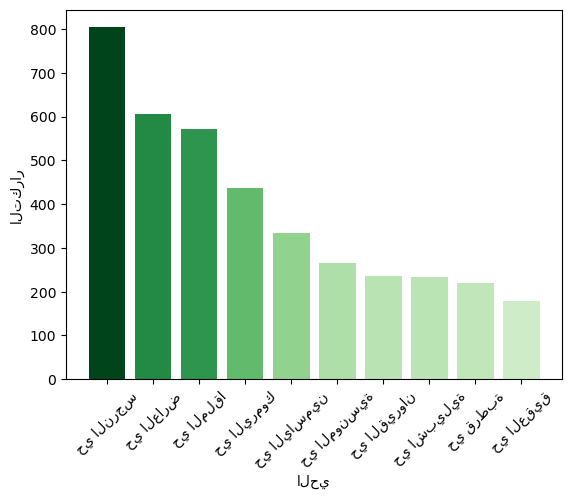

In [219]:
type_counts = df_real["district"].value_counts().head(10)

# استخدام التدرج الأخضر
colors = plt.cm.Greens(type_counts.values / type_counts.values.max())

plt.bar(type_counts.index, type_counts.values, color=colors)

plt.ylabel("التكرار")
plt.xlabel("الحي")
plt.xticks(rotation=45)

plt.show()

In [220]:
type_counts.values

array([804, 605, 571, 437, 334, 266, 236, 233, 219, 179])

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

#### Analyzing Real Estate's Dataframe features 

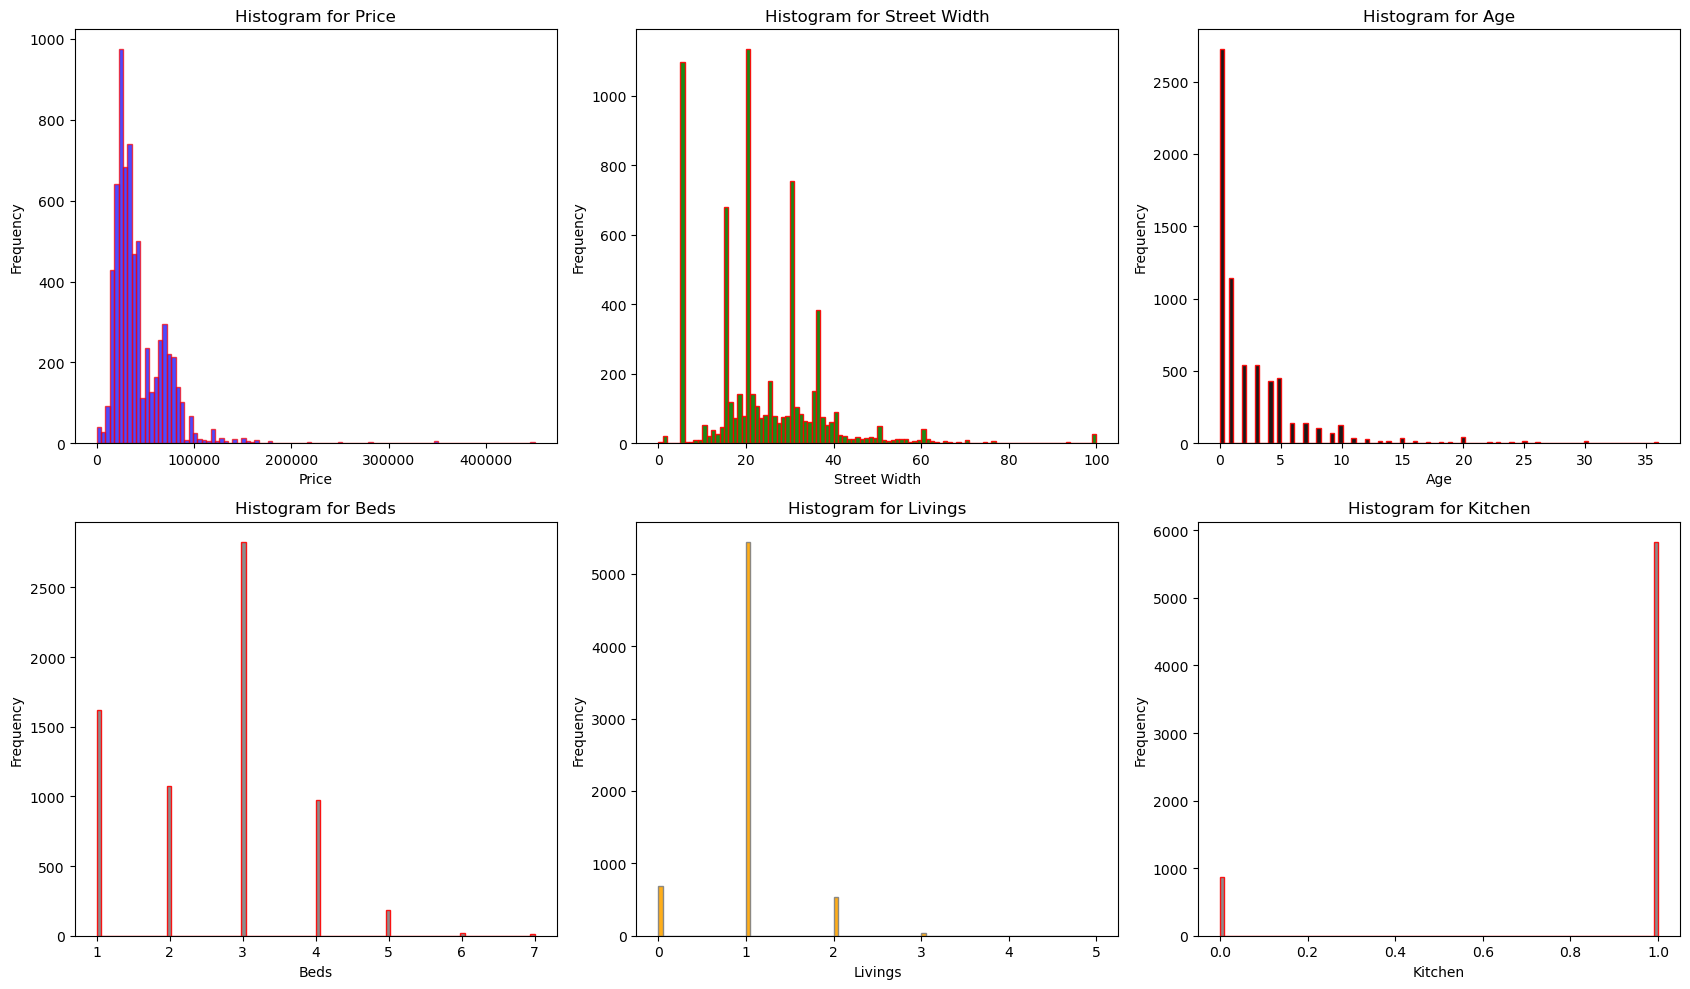

In [221]:


fig, axes = plt.subplots(2, 3, figsize=(17, 10))

axes[0, 0].hist(df_real['price'], edgecolor='red', bins=100, alpha=0.7, color='blue')
axes[0, 0].set_title('Histogram for Price')
axes[0, 0].set_xlabel('Price')  
axes[0, 0].set_ylabel('Frequency')  

axes[0, 1].hist(df_real['street_width'], edgecolor='red', bins=100, alpha=0.9, color='green')
axes[0, 1].set_title('Histogram for Street Width')
axes[0, 1].set_xlabel('Street Width')  
axes[0, 1].set_ylabel('Frequency')  

axes[0, 2].hist(df_real['age'], edgecolor='red', bins=100, alpha=0.9, color='black')
axes[0, 2].set_title('Histogram for Age')
axes[0, 2].set_xlabel('Age')  
axes[0, 2].set_ylabel('Frequency')  

axes[1, 0].hist(df_real['beds'], edgecolor='red', bins=100, alpha=0.9, color='grey')
axes[1, 0].set_title('Histogram for Beds')
axes[1, 0].set_xlabel('Beds')  
axes[1, 0].set_ylabel('Frequency') 

axes[1, 1].hist(df_real['livings'], edgecolor='grey', bins=100, alpha=0.9, color='orange')
axes[1, 1].set_title('Histogram for Livings')
axes[1, 1].set_xlabel('Livings')  
axes[1, 1].set_ylabel('Frequency')  

axes[1, 2].hist(df_real['ketchen'], edgecolor='red', bins=100, alpha=0.9, color='grey')
axes[1, 2].set_title('Histogram for Kitchen')
axes[1, 2].set_xlabel('Kitchen') 
axes[1, 2].set_ylabel('Frequency')  

plt.tight_layout()  
plt.show()


In [222]:
df_real.drop(df_real[df_real['street_width'] > 70].index,inplace=True)
# Droping the outliers

#### Analyzing Riyadh Villas Dataframe features 

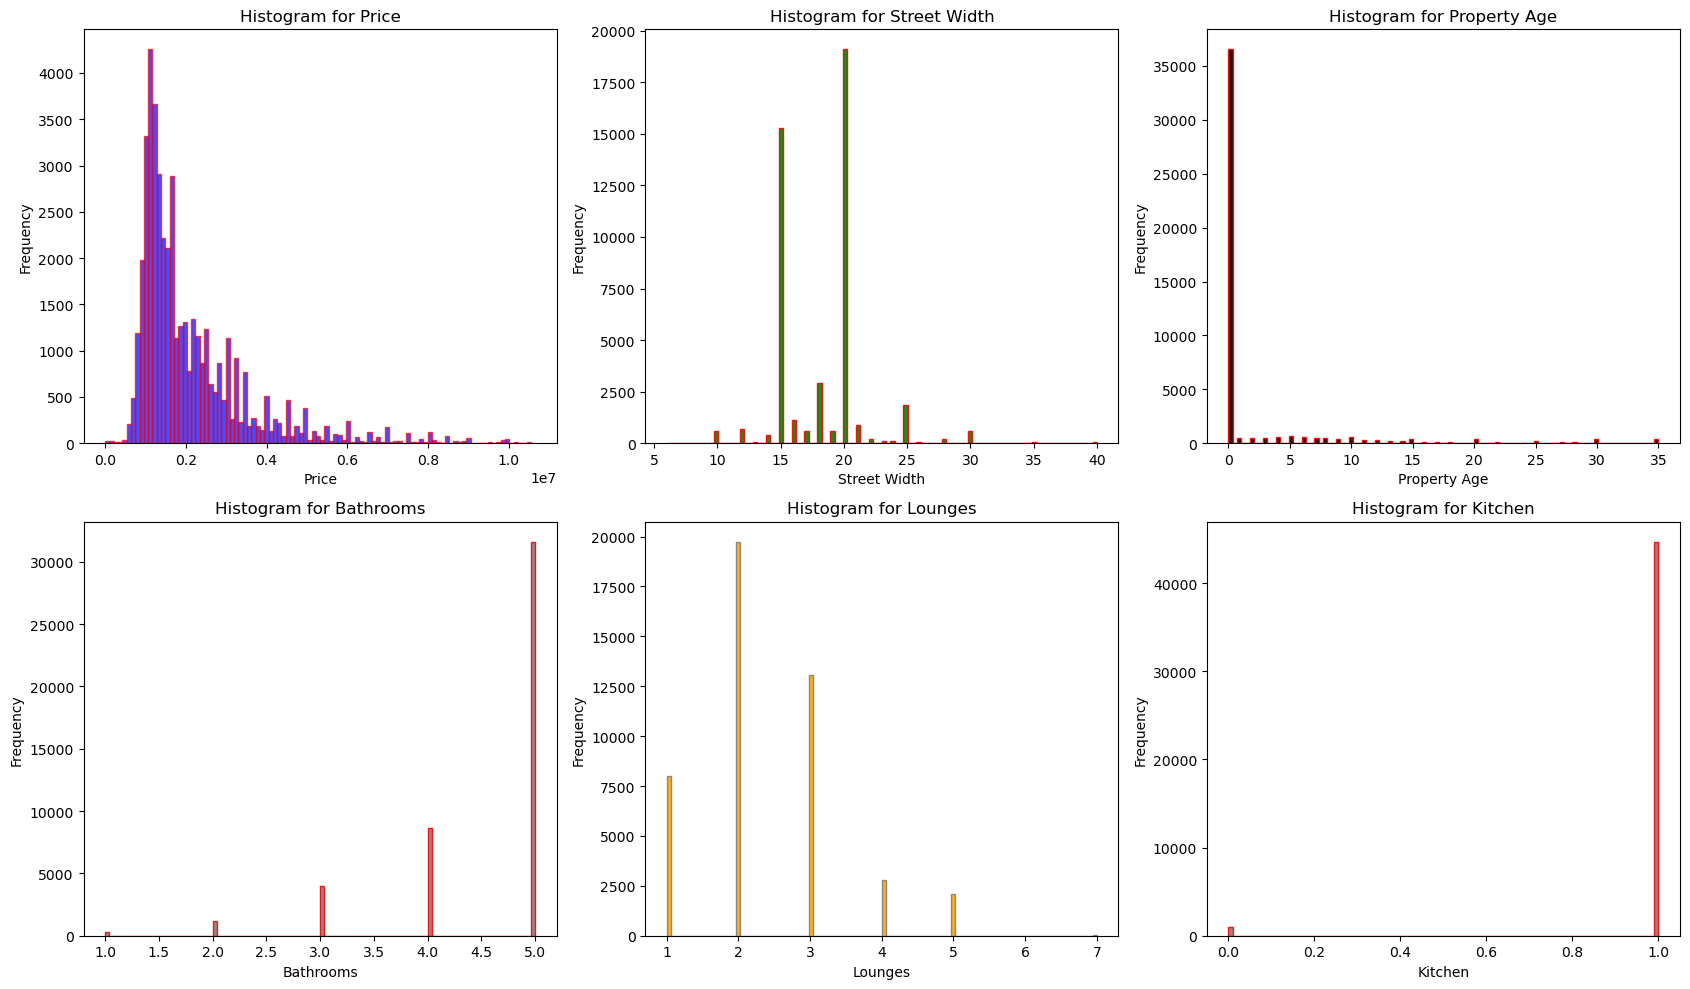

In [223]:

fig, axes = plt.subplots(2, 3, figsize=(17, 10))

axes[0][0].hist(df_RiyadhVillas['price'], edgecolor='red', bins=100, alpha=0.7, color='blue')
axes[0][0].set_title('Histogram for Price')
axes[0][0].set_xlabel('Price')  
axes[0][0].set_ylabel('Frequency')  

axes[0][1].hist(df_RiyadhVillas['streetWidth'], edgecolor='red', bins=100, alpha=0.9, color='green')
axes[0][1].set_title('Histogram for Street Width')
axes[0][1].set_xlabel('Street Width')  
axes[0][1].set_ylabel('Frequency')  

axes[0][2].hist(df_RiyadhVillas['propertyAge'], edgecolor='red', bins=100, alpha=0.9, color='black')
axes[0][2].set_title('Histogram for Property Age')
axes[0][2].set_xlabel('Property Age')  
axes[0][2].set_ylabel('Frequency')  

axes[1][0].hist(df_RiyadhVillas['bathrooms'], edgecolor='red', bins=100, alpha=0.9, color='grey')
axes[1][0].set_title('Histogram for Bathrooms')
axes[1][0].set_xlabel('Bathrooms')  
axes[1][0].set_ylabel('Frequency')  

axes[1][1].hist(df_RiyadhVillas['lounges'], edgecolor='grey', bins=100, alpha=0.9, color='orange')
axes[1][1].set_title('Histogram for Lounges')
axes[1][1].set_xlabel('Lounges')  
axes[1][1].set_ylabel('Frequency')  

axes[1][2].hist(df_RiyadhVillas['kitchen'], edgecolor='red', bins=100, alpha=0.9, color='grey')
axes[1][2].set_title('Histogram for Kitchen')
axes[1][2].set_xlabel('Kitchen')  
axes[1][2].set_ylabel('Frequency')  

plt.tight_layout()
plt.show()


#### Analyzing Aqqar Villa Dataframe Features

In [224]:
fig, axes = plt.subplots(2, 3, figsize=(17, 10))
axes[0][0].hist(
    df_Aqqar_villa['السعر الاجمالي'],edgecolor = 'red',bins=100, alpha=0.7, color='blue');
axes[0][0].set_title('Histogram for Price')
axes[0][0].set_xlabel('Price')  
axes[0][0].set_ylabel('Frequency')  

axes[0][1].hist(
    df_Aqqar_villa['عرض الشارع'],edgecolor = 'red',bins=100, alpha=0.9, color='green');
axes[0][1].set_title('Histogram for Street Width')
axes[0][1].set_xlabel('Street Width')  
axes[0][1].set_ylabel('Frequency')  

axes[0][2].hist(
    df_Aqqar_villa['المساحة'],edgecolor = 'red',bins=100, alpha=0.9, color='black');
axes[0][2].set_title('Histogram for Area')
axes[0][2].set_xlabel('Area')  
axes[0][2].set_ylabel('Frequency')  

axes[1][0].hist(
    df_Aqqar_villa['عدد الحمامات'],edgecolor = 'red',bins=100, alpha=0.9, color='grey');
axes[1][0].set_title('Histogram for Bathroom')
axes[1][0].set_xlabel('Bathroom')  
axes[1][0].set_ylabel('Frequency') 

axes[1][1].hist(
    df_Aqqar_villa['عدد الصالات'],edgecolor = 'grey',bins=100, alpha=0.9, color='orange');
axes[1][1].set_title('Histogram for Livings')
axes[1][1].set_xlabel('Livings')  
axes[1][1].set_ylabel('Frequency')  

axes[1][2].hist(
    df_Aqqar_villa['عدد الغرف'],edgecolor = 'red',bins=100, alpha=0.9, color='grey');
axes[1][2].set_title('Histogram for Rooms')
axes[1][2].set_xlabel('Rooms') 
axes[1][2].set_ylabel('Frequency')  



Text(0, 0.5, 'Frequency')

#### Analyzing Aqqar Apartments Dataframe Features

In [225]:
df_Aqqar_Apartments.columns

Index(['نوع العقار', 'المدينة', 'الحي', 'الواجهة', 'عدد الغرف', 'عدد الصالات',
       'عدد الحمامات', 'المساحة', 'مطبخ', 'مدخل سيارة', 'مصعد', 'الدور',
       'عمر العقار', 'مؤثثة', 'السعر الاجمالي', 'أكثر من خمسة حمامات'],
      dtype='object')

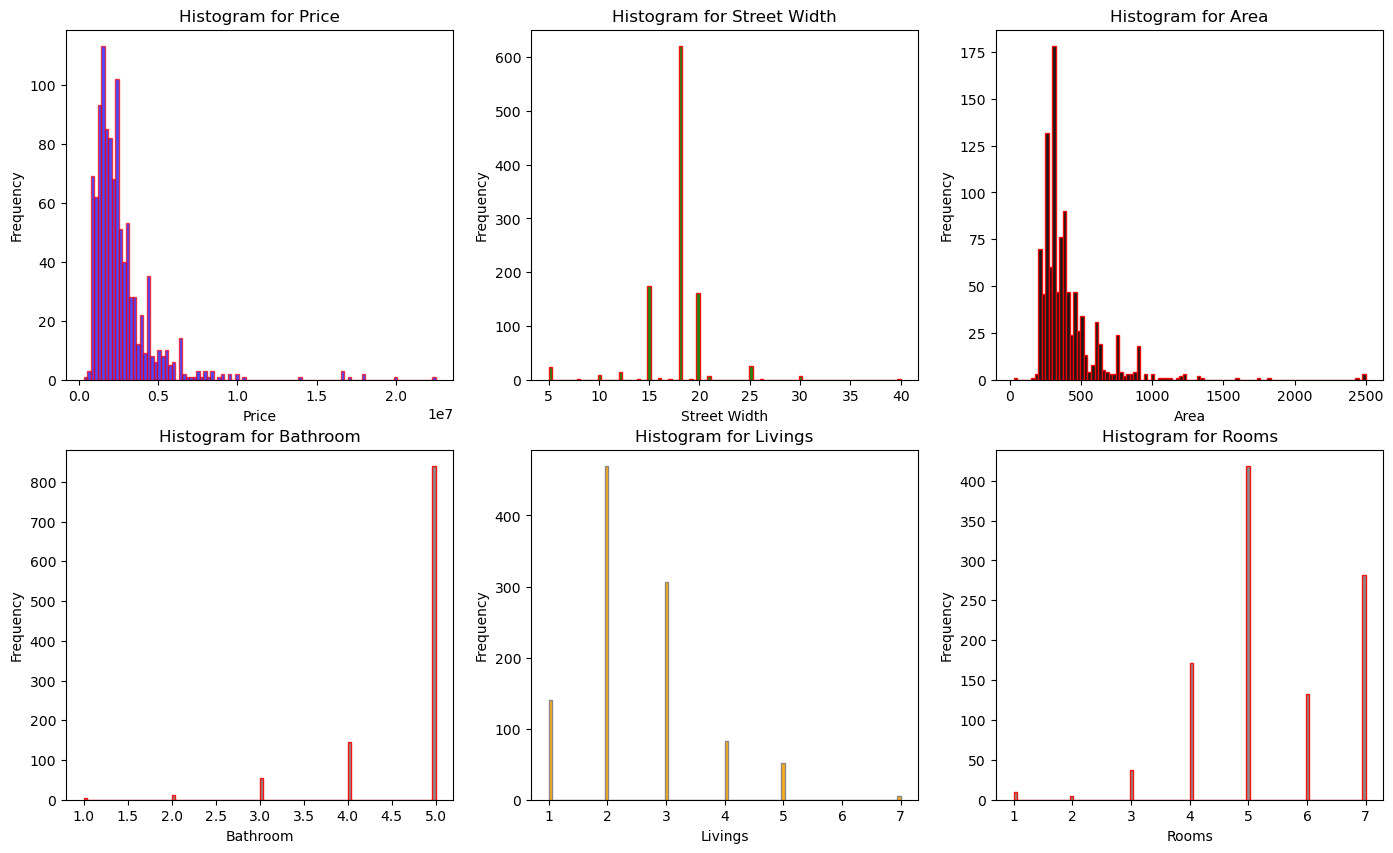

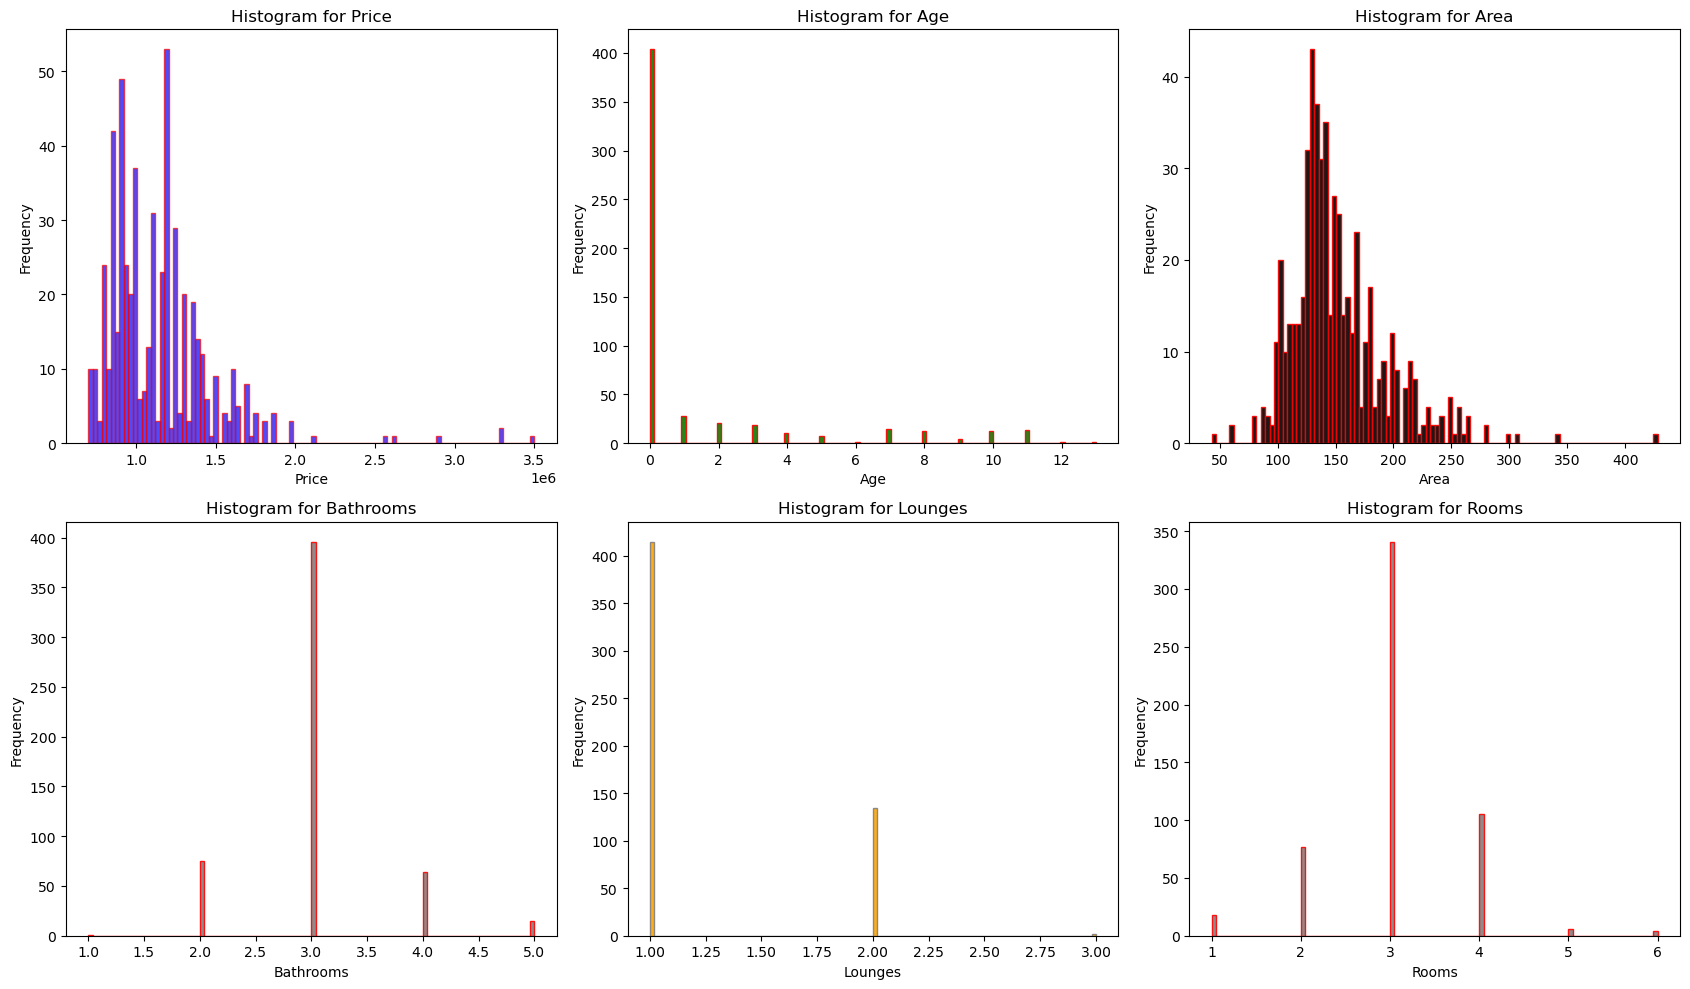

In [226]:

fig, axes = plt.subplots(2, 3, figsize=(17, 10))

axes[0][0].hist(df_Aqqar_Apartments['السعر الاجمالي'], edgecolor='red', bins=100, alpha=0.7, color='blue')
axes[0][0].set_title('Histogram for Price')
axes[0][0].set_xlabel('Price')  
axes[0][0].set_ylabel('Frequency')  

axes[0][1].hist(df_Aqqar_Apartments['عمر العقار'], edgecolor='red', bins=100, alpha=0.9, color='green')
axes[0][1].set_title('Histogram for Age')
axes[0][1].set_xlabel('Age')  
axes[0][1].set_ylabel('Frequency')  

axes[0][2].hist(df_Aqqar_Apartments['المساحة'], edgecolor='red', bins=100, alpha=0.9, color='black')
axes[0][2].set_title('Histogram for Area')
axes[0][2].set_xlabel('Area')  
axes[0][2].set_ylabel('Frequency')  

axes[1][0].hist(df_Aqqar_Apartments['عدد الحمامات'], edgecolor='red', bins=100, alpha=0.9, color='grey')
axes[1][0].set_title('Histogram for Bathrooms')
axes[1][0].set_xlabel('Bathrooms')  
axes[1][0].set_ylabel('Frequency')  

axes[1][1].hist(df_Aqqar_Apartments['عدد الصالات'], edgecolor='grey', bins=100, alpha=0.9, color='orange')
axes[1][1].set_title('Histogram for Lounges')
axes[1][1].set_xlabel('Lounges')  
axes[1][1].set_ylabel('Frequency')  

axes[1][2].hist(df_Aqqar_Apartments['عدد الغرف'], edgecolor='red', bins=100, alpha=0.9, color='grey')
axes[1][2].set_title('Histogram for Rooms')
axes[1][2].set_xlabel('Rooms')  
axes[1][2].set_ylabel('Frequency')  

plt.tight_layout()
plt.show()


#### Analyzing Aqqar Land Dataframe Features

In [227]:
df_Aqqar_Land.columns

Index(['نوع العقار', 'الغرض', 'المدينة', 'الحي', 'الواجهة', 'المساحة',
       'سعر المتر', 'السعر الإجمالي', 'price_z_score', 'eray_z_score'],
      dtype='object')

In [228]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
axes[0].hist(
    df_Aqqar_Land['السعر الإجمالي'],edgecolor = 'red',bins=50, alpha=0.7, color='blue');
axes[0].set_title('Histogram for Price')
axes[0].set_xlabel('Price')  
axes[0].set_ylabel('Frequency')  

axes[1].hist(
    df_Aqqar_Land['المساحة'],edgecolor = 'red',bins=50, alpha=0.9, color='black');
axes[1].set_title('Histogram for Area')
axes[1].set_xlabel('Area')  
axes[1].set_ylabel('Frequency')  

axes[2].hist(
    df_Aqqar_Land['سعر المتر'],edgecolor = 'red',bins=50, alpha=0.9, color='grey');
axes[2].set_title('Histogram for Square Price')
axes[2].set_xlabel('Square Price')  
axes[2].set_ylabel('Frequency') 




Text(0, 0.5, 'Frequency')

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [229]:
df_real.describe().T

,count,mean,std,min,25%,50%,75%,max
price,6658.0,43141.801592,28304.854984,55.000000,25000.00000,35000.000000,55000.00000,4.500000e+05
beds,6658.0,2.575849,1.116619,1.000000,2.00000,3.000000,3.00000,7.000000e+00
livings,6658.0,0.991439,0.462587,0.000000,1.00000,1.000000,1.00000,5.000000e+00
wc,6658.0,2.071793,0.928872,1.000000,1.00000,2.000000,3.00000,5.000000e+00
area,6658.0,1858.297236,136188.224625,0.000000,90.00000,141.000000,180.00000,1.111110e+07
street_width,6658.0,22.536798,12.260856,0.000000,15.00000,20.000000,30.00000,7.000000e+01
age,6658.0,2.663563,4.415623,0.000000,0.00000,1.000000,4.00000,3.600000e+01
ketchen,6658.0,0.868880,0.337557,0.000000,1.00000,1.000000,1.00000,1.000000e+00
ac,6658.0,0.721238,0.448424,0.000000,0.00000,1.000000,1.00000,1.000000e+00
furnished,6658.0,0.075548,0.264294,0.000000,0.00000,0.000000,0.00000,1.000000e+00


In [230]:
df_RiyadhVillas.describe().T

,count,mean,std,min,25%,50%,75%,max
rooms,45671.0,4.687219e+00,1.089542e+00,1.000000,4.000000e+00,5.000000e+00,5.000000e+00,7.000000e+00
lounges,45671.0,2.371067e+00,9.918932e-01,1.000000,2.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
bathrooms,45671.0,4.534168e+00,8.097884e-01,1.000000,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
streetWidth,45671.0,1.822923e+01,3.559065e+00,6.000000,1.500000e+01,2.000000e+01,2.000000e+01,4.000000e+01
stairs,45671.0,6.858400e-01,4.641855e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
propertyAge,45671.0,2.423157e+00,6.473124e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+01
driverRoom,45671.0,3.505069e-01,4.771339e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
tent,45671.0,4.698824e-01,4.990976e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
patio,45671.0,7.714086e-01,4.199301e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
kitchen,45671.0,9.793961e-01,1.420556e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [231]:
df_Aqqar_villa.describe().T

,count,mean,std,min,25%,50%,75%,max
عدد الغرف,1056.0,5.374053e+00,1.245751e+00,1.000000,5.000000e+00,5.000000e+00,7.000000e+00,7.000000e+00
عدد الصالات,1056.0,2.483902e+00,1.031139e+00,1.000000,2.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
عدد الحمامات,1056.0,4.707386e+00,6.564174e-01,1.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
عرض الشارع,1056.0,1.766572e+01,3.173797e+00,5.000000,1.800000e+01,1.800000e+01,1.800000e+01,4.000000e+01
المساحة,1056.0,4.043532e+02,2.351427e+02,25.000000,2.750000e+02,3.375000e+02,4.500000e+02,2.500000e+03
درج صالة,1056.0,7.225379e-01,4.479586e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
مطبخ,1056.0,8.200758e-01,3.843063e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
غرفة خادمة,1056.0,7.168561e-01,4.507392e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
غرفة سائق,1056.0,3.702652e-01,4.831044e-01,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
ملحق,1056.0,5.615530e-01,4.964319e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [232]:
df_Aqqar_Apartments.describe().T

,count,mean,std,min,25%,50%,75%,max
عدد الغرف,551.0,3.029038e+00,0.755026,1.0,3.0,3.0,3.0,6.0
عدد الصالات,551.0,1.250454e+00,0.441974,1.0,1.0,1.0,1.0,3.0
عدد الحمامات,551.0,3.030853e+00,0.606743,1.0,3.0,3.0,3.0,5.0
المساحة,551.0,1.516334e+02,41.423181,43.0,126.0,142.0,169.0,428.0
مطبخ,551.0,7.350272e-01,0.441720,0.0,0.0,1.0,1.0,1.0
مدخل سيارة,551.0,3.466425e-01,0.476333,0.0,0.0,0.0,1.0,1.0
مصعد,551.0,6.896552e-01,0.463055,0.0,0.0,1.0,1.0,1.0
عمر العقار,551.0,1.382940e+00,2.953642,0.0,0.0,0.0,1.0,13.0
مؤثثة,551.0,1.651543e-01,0.371657,0.0,0.0,0.0,0.0,1.0
السعر الاجمالي,551.0,1.137539e+06,331582.515731,700000.0,900000.0,1100000.0,1270000.0,3500000.0


In [233]:
df_Aqqar_Land.describe().T

,count,mean,std,min,25%,50%,75%,max
المساحة,1880.0,1.087798e+03,1.702195e+03,1.000000,417.500000,6.600000e+02,9.000000e+02,1.792700e+04
سعر المتر,1880.0,3.038065e+03,2.525610e+03,235.000000,1306.000000,2.500000e+03,4.000000e+03,2.250000e+04
السعر الإجمالي,1880.0,3.403897e+06,6.558099e+06,1400.000000,750246.750000,1.415658e+06,3.000000e+06,8.000000e+07
price_z_score,1880.0,-5.346192e-02,1.968967e-01,-0.155617,-0.133134,-1.131557e-01,-6.558829e-02,2.246217e+00
eray_z_score,1880.0,-5.890964e-02,4.638507e-01,-0.355064,-0.241567,-1.754852e-01,-1.100848e-01,4.529798e+00


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

#### Real Estate Heatmap

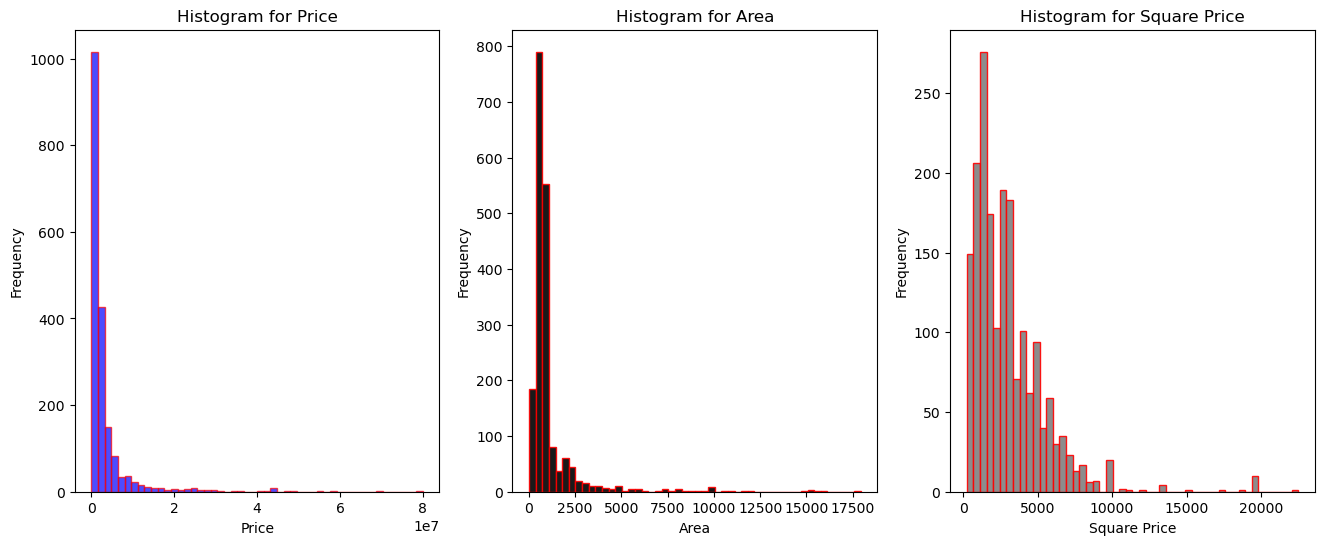

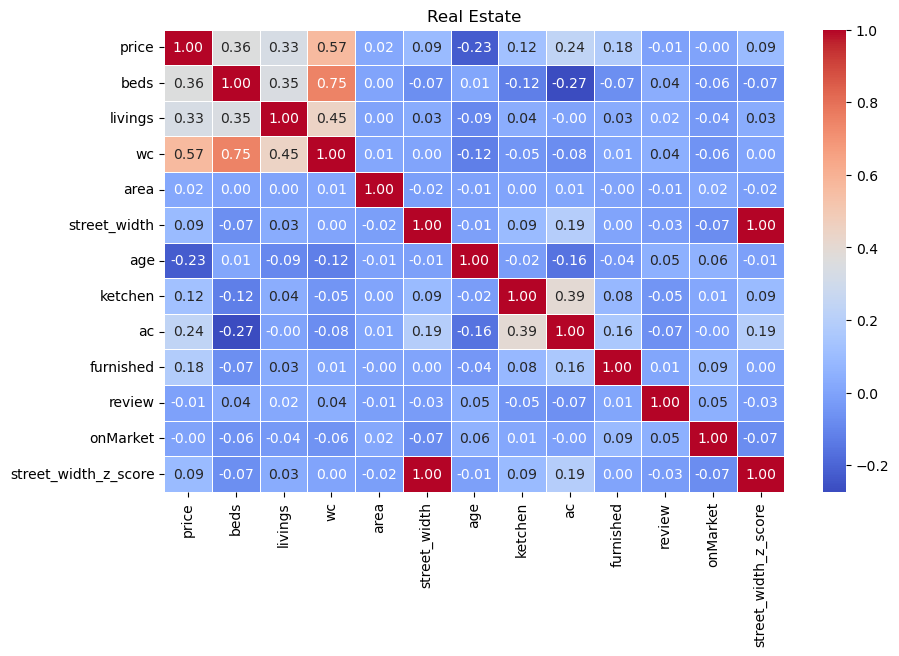

In [234]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_real.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Real Estate")
plt.show()

#### Riyadh Villas Heatmap

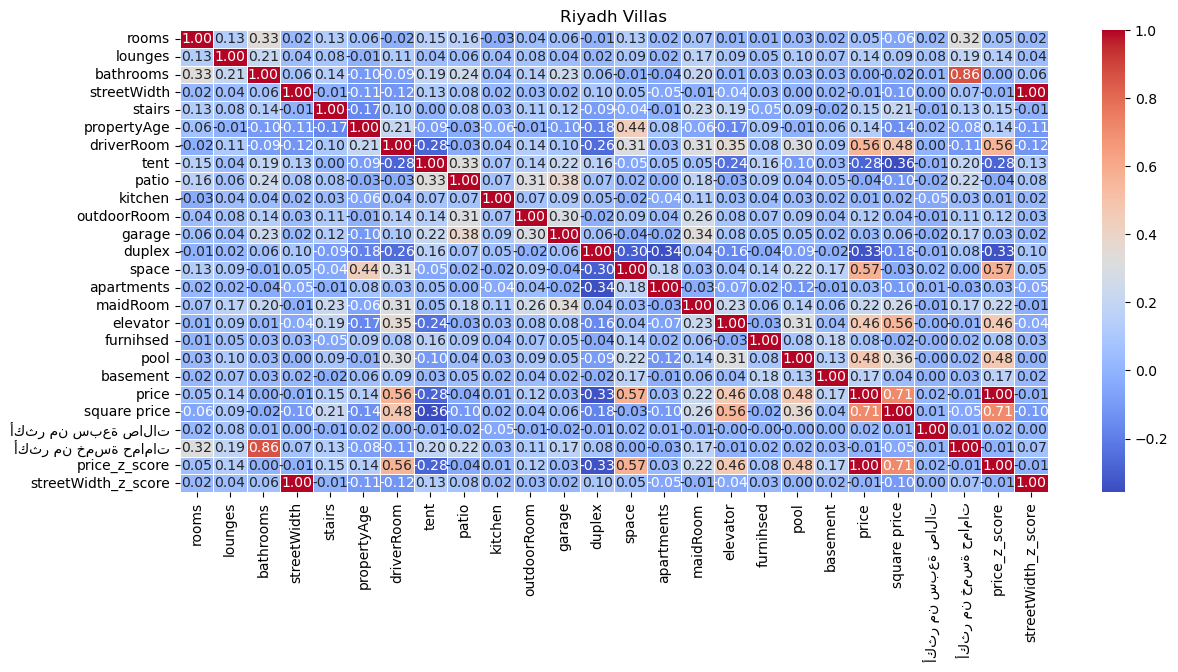

In [235]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_RiyadhVillas.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Riyadh Villas")
plt.show()

#### Aqqar Villas Heatmap

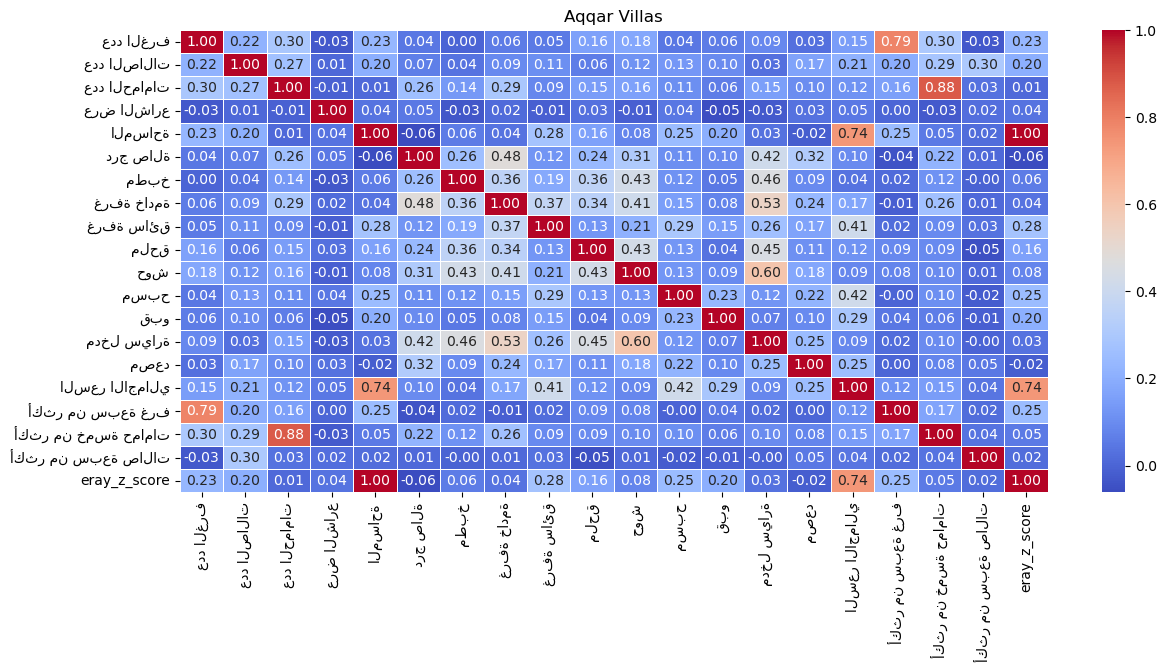

In [236]:
plt.figure(figsize=(14, 6))
sns.heatmap(df_Aqqar_villa.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Aqqar Villas")
plt.show()

#### Aqqar Apartments Heatmap

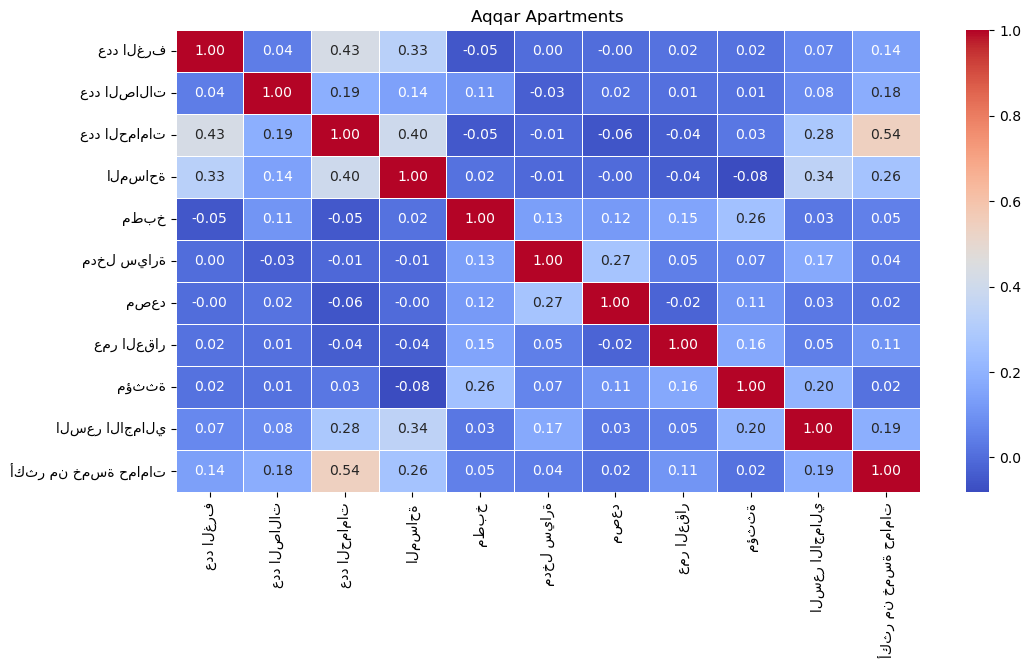

In [237]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_Aqqar_Apartments.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Aqqar Apartments")
plt.show()

#### Aqqar Land Heatmap

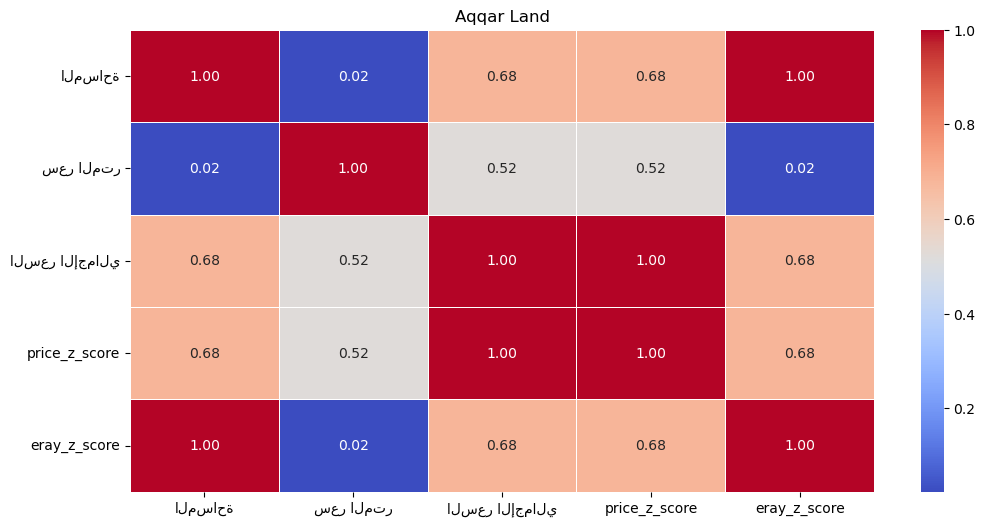

In [238]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_Aqqar_Land.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Aqqar Land")
plt.show()

# Q1 What are the most and least expensive neighborhoods for houses in Riyadh?

### Riyadh villa

In [239]:
df_RiyadhVillas.head()

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,pool,basement,neighbourhood,location,price,square price,أكثر من سبعة صالات,أكثر من خمسة حمامات,price_z_score,streetWidth_z_score
0,شرقية,5,4,5,20.0,1,0,1,1,1,...,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000,0,1,-0.466436,0.459753
1,غربية,4,3,5,20.0,1,0,1,1,1,...,0,0,المهدية,غرب الرياض,3000000.0,5555.555556,0,1,0.234493,0.459753
2,جنوبية شرقية,7,2,5,15.0,1,31,1,0,1,...,0,0,الشفا,جنوب الرياض,2000000.0,2285.714286,0,1,-0.124958,-0.764551
3,غربية,7,3,5,15.0,1,3,0,1,1,...,0,0,ظهرة لبن,غرب الرياض,894000.0,4470.000000,0,1,-0.522511,-0.764551
4,شمالية,4,2,4,25.0,1,0,1,1,1,...,0,0,قرطبة,شرق الرياض,3500000.0,8750.000000,0,0,0.414218,1.684057


In [240]:
df_RiyadhVillas["neighbourhood"]=df_RiyadhVillas["neighbourhood"].map(lambda x: x.strip())

In [241]:
mean_square_price_by_location = df_RiyadhVillas.groupby('location', as_index=False)['square price'].mean()

mean_square_price_by_location.sort_values('square price', ascending=False)

,location,square price
2,شمال الرياض,9636.506152
1,شرق الرياض,5682.234932
3,غرب الرياض,4650.763931
4,وسط الرياض,3668.251596
0,جنوب الرياض,3456.615376


In [242]:
# Compute mean price by location
mean_square_price_by_location = df_RiyadhVillas.groupby('location', as_index=False)['price'].mean()

# Convert price column back to float for calculation
mean_square_price_by_location['price'] = mean_square_price_by_location['price'].replace(',', '', regex=True).astype(float)

# Sort by price in descending order
mean_square_price_by_location = mean_square_price_by_location.sort_values('price', ascending=False)

# Format price column to show as normal numbers with commas
mean_square_price_by_location["average price"] = mean_square_price_by_location["price"].apply(lambda x: f"{x:,.0f}")

mean_square_price_by_location[['location', 'average price']] 

,location,average price
2,شمال الرياض,"3,843,915"
1,شرق الرياض,"2,127,009"
4,وسط الرياض,"1,722,903"
3,غرب الرياض,"1,426,703"
0,جنوب الرياض,"1,070,074"


In [243]:
# Count occurrences of each neighbourhood
neighbourhood_counts = df_RiyadhVillas['neighbourhood'].value_counts()

# Filter neighbourhoods that appear more than 3 times
frequent_neighbourhoods = neighbourhood_counts[neighbourhood_counts > 3].index.tolist()

# Calculate mean price for each neighbourhood
mean_villas_df = df_RiyadhVillas.groupby('neighbourhood', as_index=False)["price"].mean()


# Filter the mean dataframe to only include these neighbourhoods
filtered_mean_villas_df = mean_villas_df[mean_villas_df['neighbourhood'].isin(frequent_neighbourhoods)]

top_5_mean_df = filtered_mean_villas_df.sort_values(by="price", ascending=False).head(5)

top_5_mean_df["average price"] = top_5_mean_df["price"].apply(lambda x: f"{x:,.0f}")

top_5_mean_df["price"]= top_5_mean_df["price"].astype(int)

top_5_mean_df[["neighbourhood","average price"]]



,neighbourhood,average price
36,الرائد,"8,542,857"
146,حطين,"6,424,789"
155,رة,"6,233,333"
112,النخيل,"6,178,424"
31,الخزامى,"6,000,000"


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/1187113984.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_mean_df["price"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis")


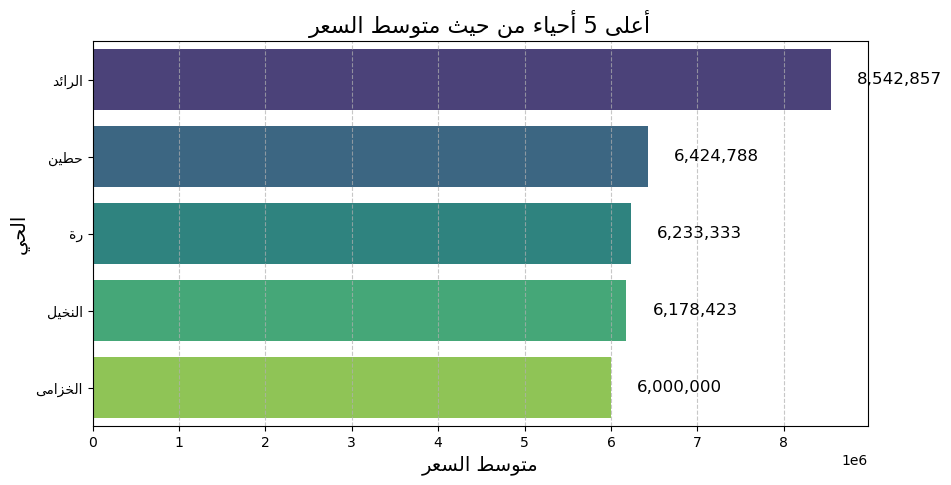

In [244]:
# Reshape Arabic labels correctly
top_5_mean_df["reshaped_neighbourhood"] = top_5_mean_df["neighbourhood"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Create a visually appealing bar chart with correctly displayed Arabic text
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_mean_df["price"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis")

# Add annotations to show exact values on the bars
for index, value in enumerate(top_5_mean_df["price"]):
    plt.text(value + 300000, index, f"{value:,}", va='center', fontsize=12)

# Set labels and title with properly formatted Arabic text
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط السعر")), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape("أعلى 5 أحياء من حيث متوسط السعر")), fontsize=16)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

In [245]:
# Count occurrences of each neighbourhood
neighbourhood_counts = df_RiyadhVillas['neighbourhood'].value_counts()

# Filter neighbourhoods that appear more than 3 times
frequent_neighbourhoods = neighbourhood_counts[neighbourhood_counts > 3].index.tolist()

# Calculate mean price for each neighbourhood
mean_villas_df = df_RiyadhVillas.groupby('neighbourhood', as_index=False)["price"].mean()


# Filter the mean dataframe to only include these neighbourhoods
filtered_mean_villas_df = mean_villas_df[mean_villas_df['neighbourhood'].isin(frequent_neighbourhoods)]

top_5_mean_df = filtered_mean_villas_df.sort_values(by="price", ascending=True).head(5)

top_5_mean_df["average price"] = top_5_mean_df["price"].apply(lambda x: f"{x:,.0f}")

top_5_mean_df["price"]= top_5_mean_df["price"].astype(int)

top_5_mean_df[["neighbourhood","average price"]]



,neighbourhood,average price
129,اليمامة,"482,143"
172,عتيقة,"536,667"
126,الوشام,"550,000"
203,منفوحة الجديدة,"660,000"
75,الغنامية,"725,455"


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/615599424.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_mean_df["price"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis_r")


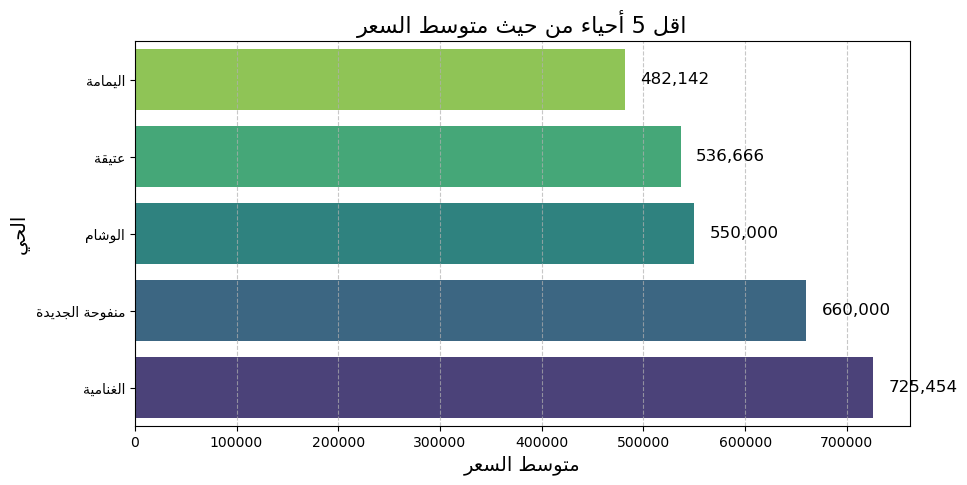

In [246]:
# Reshape Arabic labels correctly
top_5_mean_df["reshaped_neighbourhood"] = top_5_mean_df["neighbourhood"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Create a visually appealing bar chart with correctly displayed Arabic text
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_mean_df["price"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis_r")

# Add annotations to show exact values on the bars
for index, value in enumerate(top_5_mean_df["price"]):
    plt.text(value + 15000, index, f"{value:,}", va='center', fontsize=12)

# Set labels and title with properly formatted Arabic text
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط السعر")), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape("اقل 5 أحياء من حيث متوسط السعر")), fontsize=16)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

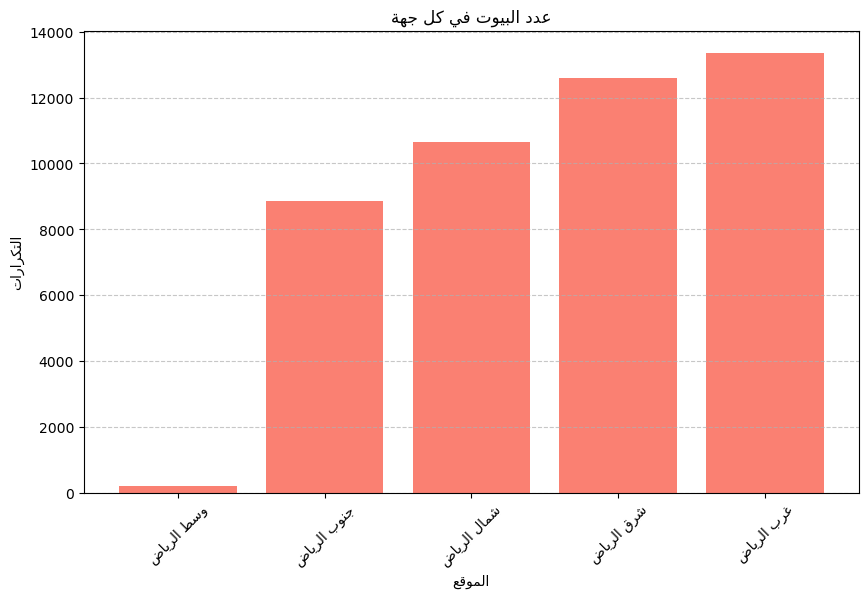

In [247]:
# Count the frequency of each location
location_counts = df_RiyadhVillas['location'].value_counts().reset_index()
location_counts.columns = ['location', 'count']

# Sort locations by frequency for better visualization
location_counts = location_counts.sort_values(by='count', ascending=True)

# Reshape Arabic labels correctly
reshaped_labels = [get_display(arabic_reshaper.reshape(text)) for text in location_counts['location']]

# Plot with properly reshaped Arabic text
plt.figure(figsize=(10, 6))
plt.bar(reshaped_labels, location_counts['count'], color='salmon')
plt.xlabel(get_display(arabic_reshaper.reshape("الموقع")))
plt.ylabel(get_display(arabic_reshaper.reshape("التكرارات")))
plt.title(get_display(arabic_reshaper.reshape("عدد البيوت في كل جهة")))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Q2 What is the price per square meter for land, top prices?


In [248]:
mean_square_price_by_location = df_Aqqar_Land.groupby('الحي', as_index=False)['سعر المتر'].mean()

mean_square_price_by_location.sort_values('سعر المتر', ascending=False)

,الحي,سعر المتر
107,حي ثليم,12090.000000
101,حي الياسمين,11685.400000
89,حي النخيل,10444.333333
64,حي المحمدية,8350.000000
31,حي الزهراء,7500.000000
...,...,...
3,القرينة,920.000000
30,حي الزاهر,910.666667
60,حي الفيحاء,888.500000
39,حي الشعلة,803.400000


# Q3 Where are most of the apartments? What is the range of their prices

### real estate

#### Riyadh Apartments

In [249]:
# Count occurrences of each neighbourhood
neighbourhood_counts = df_Aqqar_Apartments['الحي'].value_counts()

# Filter neighbourhoods that appear more than 3 times
frequent_neighbourhoods = neighbourhood_counts[neighbourhood_counts > 3].index.tolist()

# Calculate mean price for each neighbourhood
mean_Apartments_df = df_Aqqar_Apartments.groupby('الحي', as_index=False)['السعر الاجمالي'].mean()


# Filter the mean dataframe to only include these neighbourhoods
filtered_mean_Apartments_df = mean_Apartments_df[mean_Apartments_df['الحي'].isin(frequent_neighbourhoods)]

top_5_mean_df = filtered_mean_Apartments_df.sort_values(by='السعر الاجمالي', ascending=False).head(5)

top_5_mean_df["متوسط السعر الاجمالي"] = top_5_mean_df['السعر الاجمالي'].apply(lambda x: f"{x:,.0f}")

top_5_mean_df['السعر الاجمالي']= top_5_mean_df['السعر الاجمالي'].astype(int)


top_5_mean_df[["الحي","متوسط السعر الاجمالي"]]



,الحي,متوسط السعر الاجمالي
4,حي الصحافة,"1,719,875"
16,حي النخيل,"1,660,000"
3,حي الربيع,"1,388,429"
19,حي النزهة,"1,357,500"
23,حي حطين,"1,270,389"


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/3414988897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_mean_df['السعر الاجمالي'], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis")


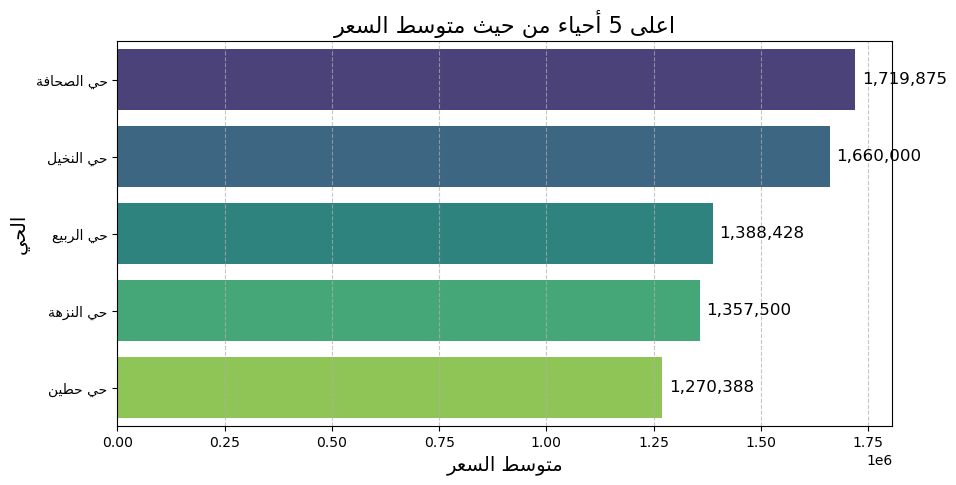

In [250]:
# Reshape Arabic labels correctly
top_5_mean_df["reshaped_neighbourhood"] = top_5_mean_df["الحي"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Create a visually appealing bar chart with correctly displayed Arabic text
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_mean_df['السعر الاجمالي'], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis")

# Add annotations to show exact values on the bars
for index, value in enumerate(top_5_mean_df['السعر الاجمالي']):
    plt.text(value + 15000, index, f"{value:,}", va='center', fontsize=12)

# Set labels and title with properly formatted Arabic text
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط السعر")), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape("اعلى 5 أحياء من حيث متوسط السعر")), fontsize=16)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

In [251]:
# Count occurrences of each neighbourhood
neighbourhood_counts = df_Aqqar_Apartments['الحي'].value_counts()

# Filter neighbourhoods that appear more than 3 times
frequent_neighbourhoods = neighbourhood_counts[neighbourhood_counts > 3].index.tolist()

# Calculate mean price for each neighbourhood
mean_Apartments_df = df_Aqqar_Apartments.groupby('الحي', as_index=False)['السعر الاجمالي'].mean()


# Filter the mean dataframe to only include these neighbourhoods
filtered_mean_Apartments_df = mean_Apartments_df[mean_Apartments_df['الحي'].isin(frequent_neighbourhoods)]

top_5_mean_df = filtered_mean_Apartments_df.sort_values(by='السعر الاجمالي', ascending=True).head(5)

top_5_mean_df["متوسط السعر الاجمالي"] = top_5_mean_df['السعر الاجمالي'].apply(lambda x: f"{x:,.0f}")

top_5_mean_df['السعر الاجمالي']= top_5_mean_df['السعر الاجمالي'].astype(int)

top_5_mean_df[["الحي","متوسط السعر الاجمالي"]]



,الحي,متوسط السعر الاجمالي
6,حي العقيق,"820,000"
12,حي المصيف,"957,833"
21,حي الوادي,"965,286"
5,حي العارض,"1,003,528"
18,حي النرجس,"1,018,184"


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/141322853.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_mean_df['السعر الاجمالي'], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis_r")


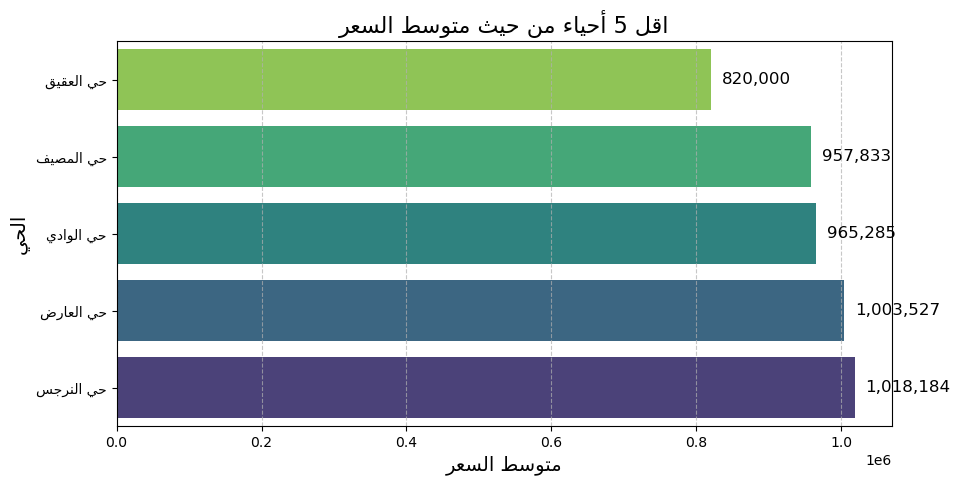

In [252]:
# Reshape Arabic labels correctly
top_5_mean_df["reshaped_neighbourhood"] = top_5_mean_df["الحي"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Create a visually appealing bar chart with correctly displayed Arabic text
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_mean_df['السعر الاجمالي'], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis_r")

# Add annotations to show exact values on the bars
for index, value in enumerate(top_5_mean_df['السعر الاجمالي']):
    plt.text(value + 15000, index, f"{value:,}", va='center', fontsize=12)

# Set labels and title with properly formatted Arabic text
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط السعر")), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape("اقل 5 أحياء من حيث متوسط السعر")), fontsize=16)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

In [253]:
# Count occurrences of each neighbourhood
neighbourhood_counts = df_real['district'].value_counts()

# Filter neighbourhoods that appear more than 3 times
frequent_neighbourhoods = neighbourhood_counts[neighbourhood_counts > 3].index.tolist()

# Calculate mean price for each neighbourhood
mean_real_df = df_real.groupby('district', as_index=False)["price"].mean()


# Filter the mean dataframe to only include these neighbourhoods
filtered_mean_villas_df = mean_real_df[mean_real_df['district'].isin(frequent_neighbourhoods)]

top_5_mean_df = filtered_mean_villas_df.sort_values(by="price", ascending=False).head(5)

top_5_mean_df["average price"] = top_5_mean_df["price"].apply(lambda x: f"{x:,.0f}")

top_5_mean_df["price"]= top_5_mean_df["price"].astype(int)


top_5_mean_df[["district","average price"]]



,district,average price
62,حي المحمدية,"98,000"
22,حي الرحمانية,"90,750"
49,حي العليا,"89,212"
70,حي المغرزات,"86,750"
52,حي الغدير,"81,548"


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/1283591508.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_mean_df["price"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis")


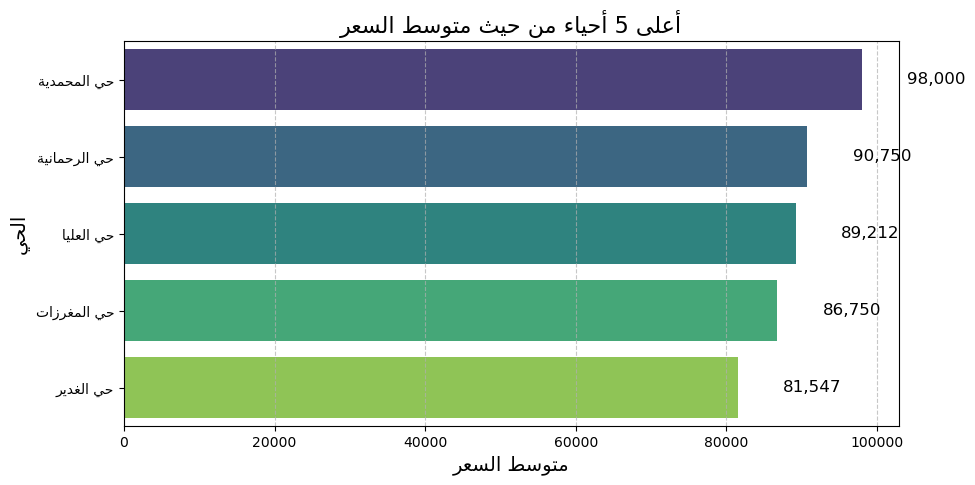

In [254]:
# Reshape Arabic labels correctly
top_5_mean_df["reshaped_neighbourhood"] = top_5_mean_df["district"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Create a visually appealing bar chart with correctly displayed Arabic text
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_mean_df["price"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis")

# Add annotations to show exact values on the bars
for index, value in enumerate(top_5_mean_df["price"]):
    plt.text(value + 6000, index, f"{value:,}", va='center', fontsize=12)

# Set labels and title with properly formatted Arabic text
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط السعر")), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape("أعلى 5 أحياء من حيث متوسط السعر")), fontsize=16)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

In [255]:
# Count occurrences of each neighbourhood
neighbourhood_counts = df_real['district'].value_counts()

# Filter neighbourhoods that appear more than 3 times
frequent_neighbourhoods = neighbourhood_counts[neighbourhood_counts > 3].index.tolist()

# Calculate mean price for each neighbourhood
mean_real_df = df_real.groupby('district', as_index=False)["price"].mean()


# Filter the mean dataframe to only include these neighbourhoods
filtered_mean_villas_df = mean_real_df[mean_real_df['district'].isin(frequent_neighbourhoods)]

top_5_mean_df = filtered_mean_villas_df.sort_values(by="price", ascending=True).head(5)

top_5_mean_df["average price"] = top_5_mean_df["price"].apply(lambda x: f"{x:,.0f}")

top_5_mean_df["price"]= top_5_mean_df["price"].astype(int)


top_5_mean_df[["district","average price"]]



,district,average price
101,حي ام سليم,"6,527"
129,حي منفوحة,"6,920"
98,حي اليمامة,"9,380"
112,حي سلطانة,"10,314"
120,حي عتيقة,"10,389"


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/2679789534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_mean_df["price"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis_r")


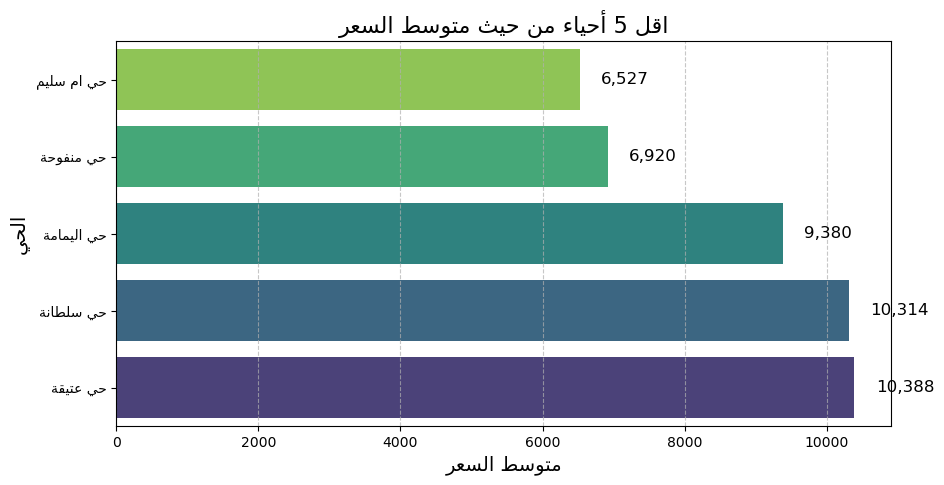

In [256]:
# Reshape Arabic labels correctly
top_5_mean_df["reshaped_neighbourhood"] = top_5_mean_df["district"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Create a visually appealing bar chart with correctly displayed Arabic text
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_mean_df["price"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis_r")

# Add annotations to show exact values on the bars
for index, value in enumerate(top_5_mean_df["price"]):
    plt.text(value + 300, index, f"{value:,}", va='center', fontsize=12)

# Set labels and title with properly formatted Arabic text
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط السعر")), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape("اقل 5 أحياء من حيث متوسط السعر")), fontsize=16)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

# Q4 Do additional features beyond the standard specifications impact property prices? If so, how significant is the effect?

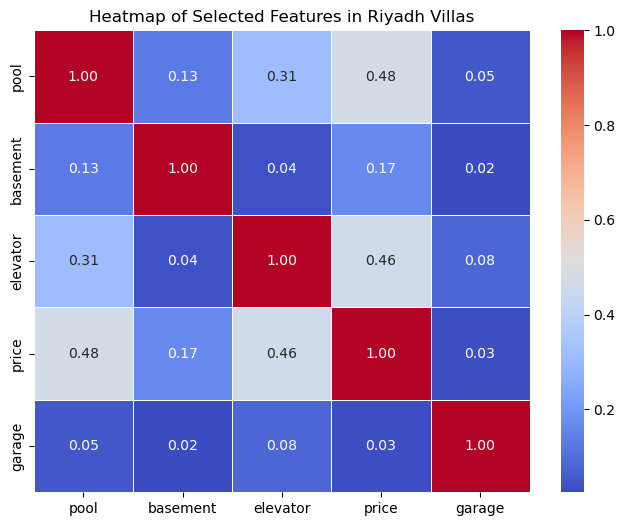

In [257]:
# Selecting relevant columns
columns_of_interest = ["pool", "basement", "elevator", "price", "garage"]
df_selected = df_RiyadhVillas[columns_of_interest]

# Convert categorical values to numeric if necessary
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
corr_matrix = df_selected.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Selected Features in Riyadh Villas")
plt.show()

# Q5 How long does it typically take for an apartment to be rented out?

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

### real estate

In [258]:
df_real.head(2)

,title,price,beds,livings,wc,area,street_width,age,ketchen,ac,furnished,district,advertiser_type,review,onMarket,IsRent,street_width_z_score
0,شقة للإيجار في شارع التغلبي ، حي النظيم ، الري...,20000,3,0,2,225.0,15,9,1,0,0,حي النظيم,owner,5.00,17,False,-0.59292
1,شقة للإيجار في شارع الاقتصاد ، حي الفيحاء ، ال...,25000,3,1,2,130.0,30,12,1,0,0,حي الفيحاء,exclusive_marketer,4.33,5,True,0.51326


In [259]:
# Count occurrences of each neighbourhood
neighbourhood_counts = df_real['district'].value_counts()

# Filter neighbourhoods that appear more than 3 times
frequent_neighbourhoods = neighbourhood_counts[neighbourhood_counts > 3].index.tolist()

# Calculate mean price for each neighbourhood
mean_real_df = df_real.groupby('district', as_index=False)["price"].mean()


# Filter the mean dataframe to only include these neighbourhoods
filtered_mean_villas_df = mean_real_df[mean_real_df['district'].isin(frequent_neighbourhoods)]

top_5_mean_df = filtered_mean_villas_df.sort_values(by="price", ascending=False).head(5)

top_5_mean_df["average price"] = top_5_mean_df["price"].apply(lambda x: f"{x:,.0f}")

top_5_mean_df["price"]= top_5_mean_df["price"].astype(int)


top_5_mean_df[["district","average price"]]



,district,average price
62,حي المحمدية,"98,000"
22,حي الرحمانية,"90,750"
49,حي العليا,"89,212"
70,حي المغرزات,"86,750"
52,حي الغدير,"81,548"


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/1283591508.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_mean_df["price"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis")


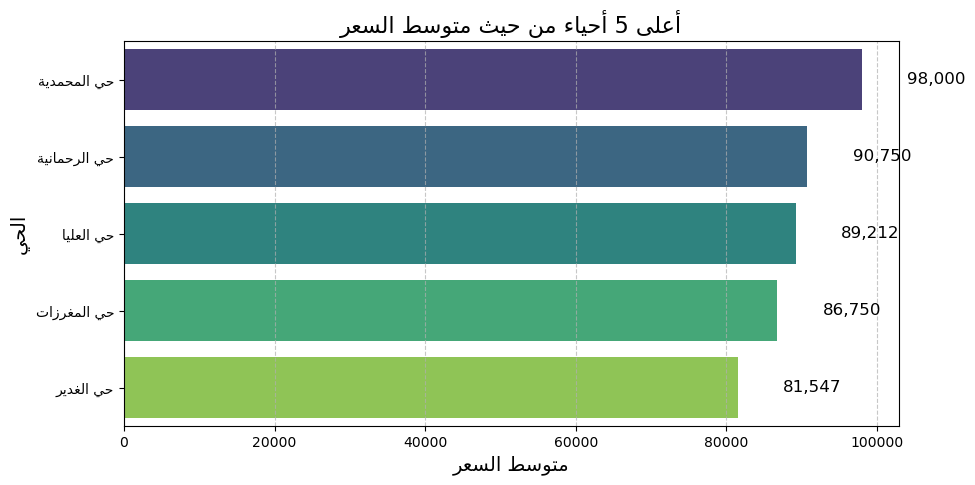

In [260]:
# Reshape Arabic labels correctly
top_5_mean_df["reshaped_neighbourhood"] = top_5_mean_df["district"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Create a visually appealing bar chart with correctly displayed Arabic text
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_mean_df["price"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis")

# Add annotations to show exact values on the bars
for index, value in enumerate(top_5_mean_df["price"]):
    plt.text(value + 6000, index, f"{value:,}", va='center', fontsize=12)

# Set labels and title with properly formatted Arabic text
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط السعر")), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape("أعلى 5 أحياء من حيث متوسط السعر")), fontsize=16)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

In [261]:
# Count occurrences of each neighbourhood
neighbourhood_counts = df_real['district'].value_counts()

# Filter neighbourhoods that appear more than 3 times
frequent_neighbourhoods = neighbourhood_counts[neighbourhood_counts > 3].index.tolist()

# Calculate mean price for each neighbourhood
mean_real_df = df_real.groupby('district', as_index=False)["price"].mean()


# Filter the mean dataframe to only include these neighbourhoods
filtered_mean_villas_df = mean_real_df[mean_real_df['district'].isin(frequent_neighbourhoods)]

top_5_mean_df = filtered_mean_villas_df.sort_values(by="price", ascending=True).head(5)

top_5_mean_df["average price"] = top_5_mean_df["price"].apply(lambda x: f"{x:,.0f}")

top_5_mean_df["price"]= top_5_mean_df["price"].astype(int)


top_5_mean_df[["district","average price"]]



,district,average price
101,حي ام سليم,"6,527"
129,حي منفوحة,"6,920"
98,حي اليمامة,"9,380"
112,حي سلطانة,"10,314"
120,حي عتيقة,"10,389"


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/2679789534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_mean_df["price"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis_r")


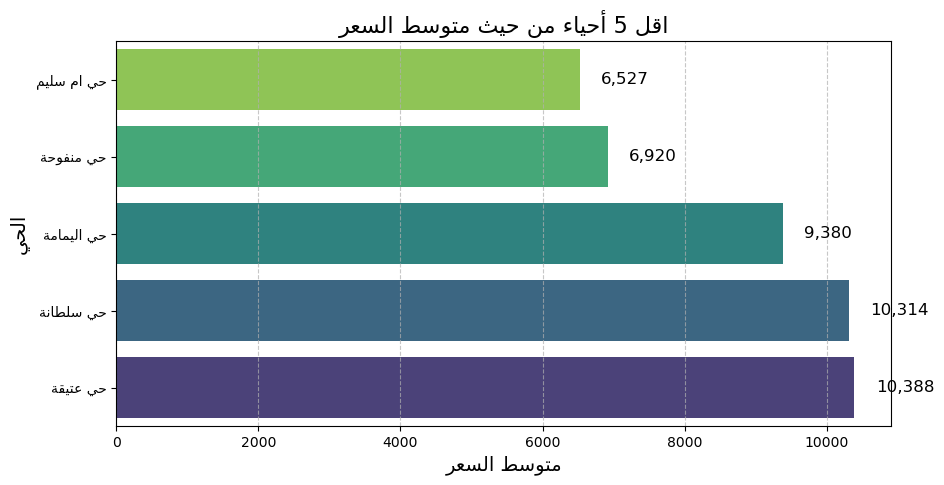

In [262]:
# Reshape Arabic labels correctly
top_5_mean_df["reshaped_neighbourhood"] = top_5_mean_df["district"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Create a visually appealing bar chart with correctly displayed Arabic text
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_mean_df["price"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis_r")

# Add annotations to show exact values on the bars
for index, value in enumerate(top_5_mean_df["price"]):
    plt.text(value + 300, index, f"{value:,}", va='center', fontsize=12)

# Set labels and title with properly formatted Arabic text
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط السعر")), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape("اقل 5 أحياء من حيث متوسط السعر")), fontsize=16)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

### Riyadh villa

In [263]:
df_RiyadhVillas.head()

,front,rooms,lounges,bathrooms,streetWidth,stairs,propertyAge,driverRoom,tent,patio,...,pool,basement,neighbourhood,location,price,square price,أكثر من سبعة صالات,أكثر من خمسة حمامات,price_z_score,streetWidth_z_score
0,شرقية,5,4,5,20.0,1,0,1,1,1,...,0,0,عكاظ,جنوب الرياض,1050000.0,3500.000000,0,1,-0.466436,0.459753
1,غربية,4,3,5,20.0,1,0,1,1,1,...,0,0,المهدية,غرب الرياض,3000000.0,5555.555556,0,1,0.234493,0.459753
2,جنوبية شرقية,7,2,5,15.0,1,31,1,0,1,...,0,0,الشفا,جنوب الرياض,2000000.0,2285.714286,0,1,-0.124958,-0.764551
3,غربية,7,3,5,15.0,1,3,0,1,1,...,0,0,ظهرة لبن,غرب الرياض,894000.0,4470.000000,0,1,-0.522511,-0.764551
4,شمالية,4,2,4,25.0,1,0,1,1,1,...,0,0,قرطبة,شرق الرياض,3500000.0,8750.000000,0,0,0.414218,1.684057


In [264]:
df_RiyadhVillas["neighbourhood"]=df_RiyadhVillas["neighbourhood"].map(lambda x: x.strip())

In [265]:
mean_square_price_by_location = df_RiyadhVillas.groupby('location', as_index=False)['square price'].mean()

mean_square_price_by_location.sort_values('square price', ascending=False)

,location,square price
2,شمال الرياض,9636.506152
1,شرق الرياض,5682.234932
3,غرب الرياض,4650.763931
4,وسط الرياض,3668.251596
0,جنوب الرياض,3456.615376


In [266]:
# Compute mean price by location
mean_square_price_by_location = df_RiyadhVillas.groupby('location', as_index=False)['price'].mean()

# Convert price column back to float for calculation
mean_square_price_by_location['price'] = mean_square_price_by_location['price'].replace(',', '', regex=True).astype(float)

# Sort by price in descending order
mean_square_price_by_location = mean_square_price_by_location.sort_values('price', ascending=False)

# Format price column to show as normal numbers with commas
mean_square_price_by_location["average price"] = mean_square_price_by_location["price"].apply(lambda x: f"{x:,.0f}")

mean_square_price_by_location[['location', 'average price']] 

,location,average price
2,شمال الرياض,"3,843,915"
1,شرق الرياض,"2,127,009"
4,وسط الرياض,"1,722,903"
3,غرب الرياض,"1,426,703"
0,جنوب الرياض,"1,070,074"


In [267]:
# Count occurrences of each neighbourhood
neighbourhood_counts = df_RiyadhVillas['neighbourhood'].value_counts()

# Filter neighbourhoods that appear more than 3 times
frequent_neighbourhoods = neighbourhood_counts[neighbourhood_counts > 3].index.tolist()

# Calculate mean price for each neighbourhood
mean_villas_df = df_RiyadhVillas.groupby('neighbourhood', as_index=False)["price"].mean()


# Filter the mean dataframe to only include these neighbourhoods
filtered_mean_villas_df = mean_villas_df[mean_villas_df['neighbourhood'].isin(frequent_neighbourhoods)]

top_5_mean_df = filtered_mean_villas_df.sort_values(by="price", ascending=False).head(5)

top_5_mean_df["average price"] = top_5_mean_df["price"].apply(lambda x: f"{x:,.0f}")

top_5_mean_df["price"]= top_5_mean_df["price"].astype(int)

top_5_mean_df[["neighbourhood","average price"]]



,neighbourhood,average price
36,الرائد,"8,542,857"
146,حطين,"6,424,789"
155,رة,"6,233,333"
112,النخيل,"6,178,424"
31,الخزامى,"6,000,000"


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/1187113984.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_mean_df["price"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis")


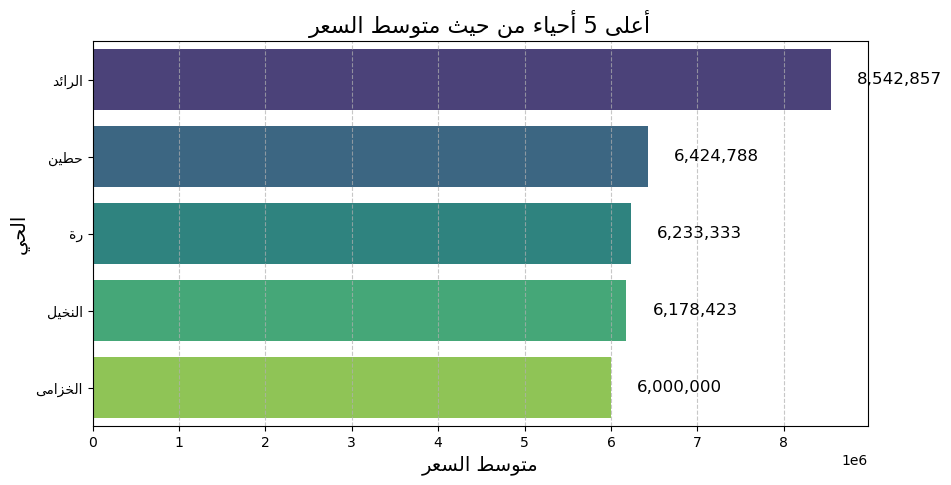

In [268]:
# Reshape Arabic labels correctly
top_5_mean_df["reshaped_neighbourhood"] = top_5_mean_df["neighbourhood"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Create a visually appealing bar chart with correctly displayed Arabic text
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_mean_df["price"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis")

# Add annotations to show exact values on the bars
for index, value in enumerate(top_5_mean_df["price"]):
    plt.text(value + 300000, index, f"{value:,}", va='center', fontsize=12)

# Set labels and title with properly formatted Arabic text
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط السعر")), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape("أعلى 5 أحياء من حيث متوسط السعر")), fontsize=16)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

In [269]:
# Count occurrences of each neighbourhood
neighbourhood_counts = df_RiyadhVillas['neighbourhood'].value_counts()

# Filter neighbourhoods that appear more than 3 times
frequent_neighbourhoods = neighbourhood_counts[neighbourhood_counts > 3].index.tolist()

# Calculate mean price for each neighbourhood
mean_villas_df = df_RiyadhVillas.groupby('neighbourhood', as_index=False)["price"].mean()


# Filter the mean dataframe to only include these neighbourhoods
filtered_mean_villas_df = mean_villas_df[mean_villas_df['neighbourhood'].isin(frequent_neighbourhoods)]

top_5_mean_df = filtered_mean_villas_df.sort_values(by="price", ascending=True).head(5)

top_5_mean_df["average price"] = top_5_mean_df["price"].apply(lambda x: f"{x:,.0f}")

top_5_mean_df["price"]= top_5_mean_df["price"].astype(int)

top_5_mean_df[["neighbourhood","average price"]]



,neighbourhood,average price
129,اليمامة,"482,143"
172,عتيقة,"536,667"
126,الوشام,"550,000"
203,منفوحة الجديدة,"660,000"
75,الغنامية,"725,455"


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/615599424.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_mean_df["price"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis_r")


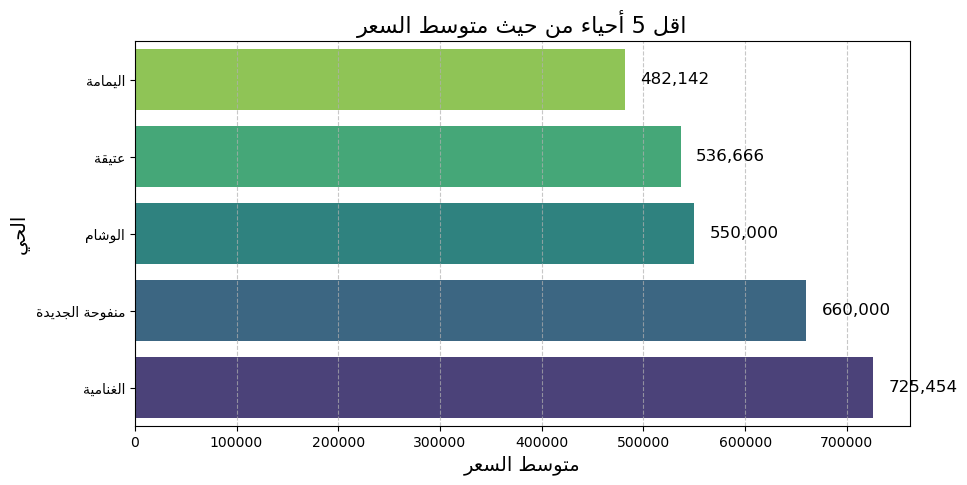

In [270]:
# Reshape Arabic labels correctly
top_5_mean_df["reshaped_neighbourhood"] = top_5_mean_df["neighbourhood"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Create a visually appealing bar chart with correctly displayed Arabic text
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_mean_df["price"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis_r")

# Add annotations to show exact values on the bars
for index, value in enumerate(top_5_mean_df["price"]):
    plt.text(value + 15000, index, f"{value:,}", va='center', fontsize=12)

# Set labels and title with properly formatted Arabic text
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط السعر")), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape("اقل 5 أحياء من حيث متوسط السعر")), fontsize=16)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

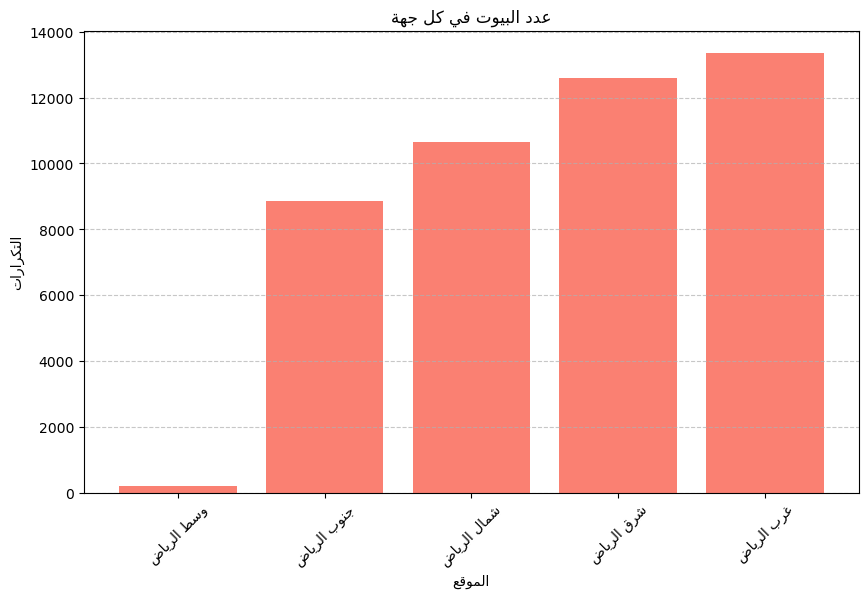

In [271]:
# Count the frequency of each location
location_counts = df_RiyadhVillas['location'].value_counts().reset_index()
location_counts.columns = ['location', 'count']

# Sort locations by frequency for better visualization
location_counts = location_counts.sort_values(by='count', ascending=True)

# Reshape Arabic labels correctly
reshaped_labels = [get_display(arabic_reshaper.reshape(text)) for text in location_counts['location']]

# Plot with properly reshaped Arabic text
plt.figure(figsize=(10, 6))
plt.bar(reshaped_labels, location_counts['count'], color='salmon')
plt.xlabel(get_display(arabic_reshaper.reshape("الموقع")))
plt.ylabel(get_display(arabic_reshaper.reshape("التكرارات")))
plt.title(get_display(arabic_reshaper.reshape("عدد البيوت في كل جهة")))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

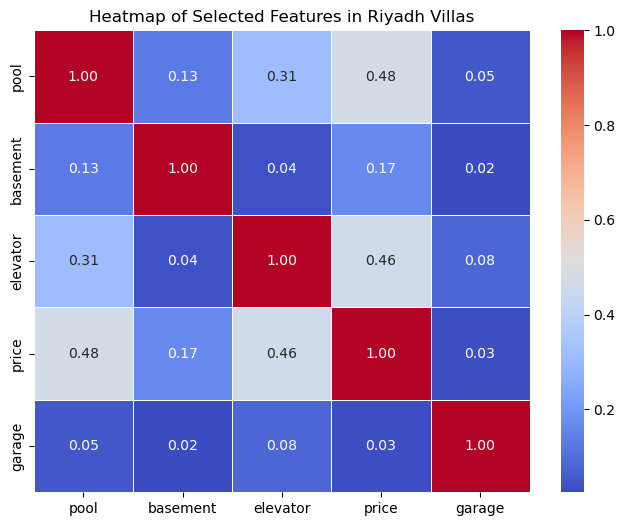

In [272]:
# Selecting relevant columns
columns_of_interest = ["pool", "basement", "elevator", "price", "garage"]
df_selected = df_RiyadhVillas[columns_of_interest]

# Convert categorical values to numeric if necessary
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
corr_matrix = df_selected.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Selected Features in Riyadh Villas")
plt.show()

### Riyadh aqqar

#### Riyadh Villa

In [273]:
# Count occurrences of each neighbourhood
neighbourhood_counts = df_Aqqar_villa['الحي'].value_counts()

# Filter neighbourhoods that appear more than 3 times
frequent_neighbourhoods = neighbourhood_counts[neighbourhood_counts > 3].index.tolist()

# Calculate mean price for each neighbourhood
mean_villas_df = df_Aqqar_villa.groupby('الحي', as_index=False)['السعر الاجمالي'].mean()


# Filter the mean dataframe to only include these neighbourhoods
filtered_mean_villas_df = mean_villas_df[mean_villas_df['الحي'].isin(frequent_neighbourhoods)]

top_5_mean_df = filtered_mean_villas_df.sort_values(by='السعر الاجمالي', ascending=False).head(5)

top_5_mean_df["متوسط السعر الاجمالي"] = top_5_mean_df['السعر الاجمالي'].apply(lambda x: f"{x:,.0f}")


top_5_mean_df['السعر الاجمالي']= top_5_mean_df['السعر الاجمالي'].astype(int)


top_5_mean_df[["الحي","متوسط السعر الاجمالي"]]



,الحي,متوسط السعر الاجمالي
67,حي النخيل,"10,133,333"
69,حي الندى,"7,375,000"
57,حي الملقا,"6,700,000"
71,حي النزهة,"6,158,333"
15,حي الحمراء,"5,620,287"


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/3414988897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_mean_df['السعر الاجمالي'], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis")


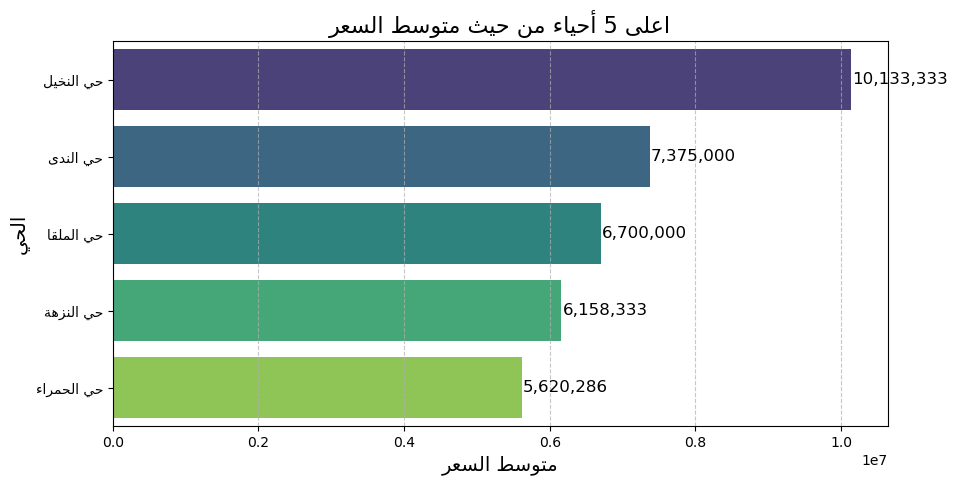

In [274]:
# Reshape Arabic labels correctly
top_5_mean_df["reshaped_neighbourhood"] = top_5_mean_df["الحي"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Create a visually appealing bar chart with correctly displayed Arabic text
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_mean_df['السعر الاجمالي'], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis")

# Add annotations to show exact values on the bars
for index, value in enumerate(top_5_mean_df['السعر الاجمالي']):
    plt.text(value + 15000, index, f"{value:,}", va='center', fontsize=12)

# Set labels and title with properly formatted Arabic text
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط السعر")), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape("اعلى 5 أحياء من حيث متوسط السعر")), fontsize=16)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

In [275]:
# Count occurrences of each neighbourhood
neighbourhood_counts = df_Aqqar_villa['الحي'].value_counts()

# Filter neighbourhoods that appear more than 3 times
frequent_neighbourhoods = neighbourhood_counts[neighbourhood_counts > 3].index.tolist()

# Calculate mean price for each neighbourhood
mean_villas_df = df_Aqqar_villa.groupby('الحي', as_index=False)['السعر الاجمالي'].mean()

# Filter the mean dataframe to only include these neighbourhoods
filtered_mean_villas_df = mean_villas_df[mean_villas_df['الحي'].isin(frequent_neighbourhoods)]

top_5_mean_df = filtered_mean_villas_df.sort_values(by='السعر الاجمالي', ascending=True).head(5)

top_5_mean_df["متوسط السعر الاجمالي"] = top_5_mean_df['السعر الاجمالي'].apply(lambda x: f"{x:,.0f}")

top_5_mean_df['السعر الاجمالي']= top_5_mean_df['السعر الاجمالي'].astype(int)


top_5_mean_df[["الحي","متوسط السعر الاجمالي"]]



,الحي,متوسط السعر الاجمالي
80,حي بدر,"947,000"
18,حي الدار البيضاء,"1,024,545"
38,حي العريجاء الغربي,"1,051,250"
33,حي الشفا,"1,080,000"
14,حي الحزم,"1,227,000"


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/141322853.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_mean_df['السعر الاجمالي'], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis_r")


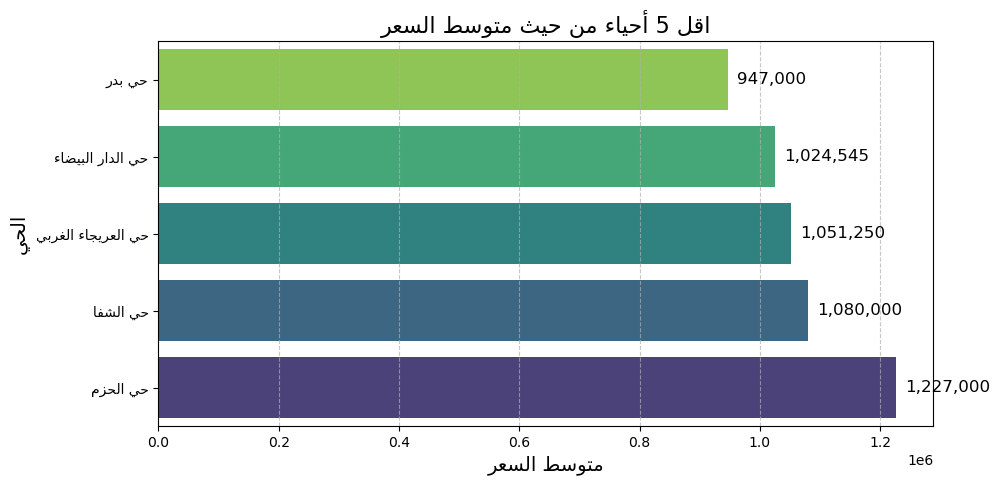

In [276]:
# Reshape Arabic labels correctly
top_5_mean_df["reshaped_neighbourhood"] = top_5_mean_df["الحي"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Create a visually appealing bar chart with correctly displayed Arabic text
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_mean_df['السعر الاجمالي'], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis_r")

# Add annotations to show exact values on the bars
for index, value in enumerate(top_5_mean_df['السعر الاجمالي']):
    plt.text(value + 15000, index, f"{value:,}", va='center', fontsize=12)

# Set labels and title with properly formatted Arabic text
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط السعر")), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape("اقل 5 أحياء من حيث متوسط السعر")), fontsize=16)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

#### Riyadh Apartments

In [286]:
# Count occurrences of each neighbourhood
neighbourhood_counts = df_Aqqar_Apartments['الحي'].value_counts()

# Filter neighbourhoods that appear more than 3 times
frequent_neighbourhoods = neighbourhood_counts[neighbourhood_counts > 3].index.tolist()

# Calculate mean price for each neighbourhood
mean_Apartments_df = df_Aqqar_Apartments.groupby('الحي', as_index=False)['السعر الاجمالي'].mean()


# Filter the mean dataframe to only include these neighbourhoods
filtered_mean_Apartments_df = mean_Apartments_df[mean_Apartments_df['الحي'].isin(frequent_neighbourhoods)]

top_5_mean_df = filtered_mean_Apartments_df.sort_values(by='السعر الاجمالي', ascending=False).head(5)

top_5_mean_df["متوسط السعر الاجمالي"] = top_5_mean_df['السعر الاجمالي'].apply(lambda x: f"{x:,.0f}")

top_5_mean_df['السعر الاجمالي']= top_5_mean_df['السعر الاجمالي'].astype(int)


top_5_mean_df[["الحي","متوسط السعر الاجمالي"]]



,الحي,متوسط السعر الاجمالي
4,حي الصحافة,"1,719,875"
16,حي النخيل,"1,660,000"
3,حي الربيع,"1,388,429"
19,حي النزهة,"1,357,500"
23,حي حطين,"1,270,389"


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/3414988897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_mean_df['السعر الاجمالي'], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis")


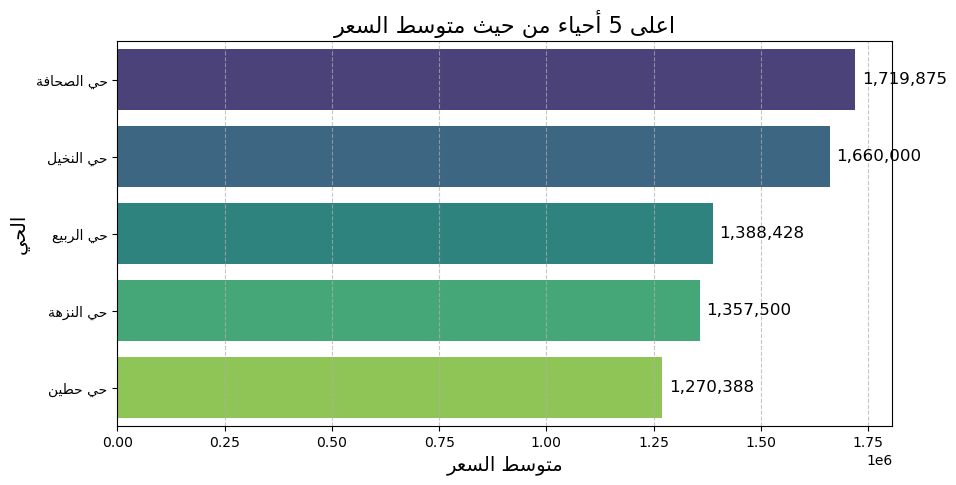

In [287]:
# Reshape Arabic labels correctly
top_5_mean_df["reshaped_neighbourhood"] = top_5_mean_df["الحي"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Create a visually appealing bar chart with correctly displayed Arabic text
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_mean_df['السعر الاجمالي'], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis")

# Add annotations to show exact values on the bars
for index, value in enumerate(top_5_mean_df['السعر الاجمالي']):
    plt.text(value + 15000, index, f"{value:,}", va='center', fontsize=12)

# Set labels and title with properly formatted Arabic text
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط السعر")), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape("اعلى 5 أحياء من حيث متوسط السعر")), fontsize=16)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

In [279]:
# Count occurrences of each neighbourhood
neighbourhood_counts = df_Aqqar_Apartments['الحي'].value_counts()

# Filter neighbourhoods that appear more than 3 times
frequent_neighbourhoods = neighbourhood_counts[neighbourhood_counts > 3].index.tolist()

# Calculate mean price for each neighbourhood
mean_Apartments_df = df_Aqqar_Apartments.groupby('الحي', as_index=False)['السعر الاجمالي'].mean()


# Filter the mean dataframe to only include these neighbourhoods
filtered_mean_Apartments_df = mean_Apartments_df[mean_Apartments_df['الحي'].isin(frequent_neighbourhoods)]

top_5_mean_df = filtered_mean_Apartments_df.sort_values(by='السعر الاجمالي', ascending=True).head(5)

top_5_mean_df["متوسط السعر الاجمالي"] = top_5_mean_df['السعر الاجمالي'].apply(lambda x: f"{x:,.0f}")

top_5_mean_df['السعر الاجمالي']= top_5_mean_df['السعر الاجمالي'].astype(int)

top_5_mean_df[["الحي","متوسط السعر الاجمالي"]]



,الحي,متوسط السعر الاجمالي
6,حي العقيق,"820,000"
12,حي المصيف,"957,833"
21,حي الوادي,"965,286"
5,حي العارض,"1,003,528"
18,حي النرجس,"1,018,184"


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/141322853.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_mean_df['السعر الاجمالي'], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis_r")


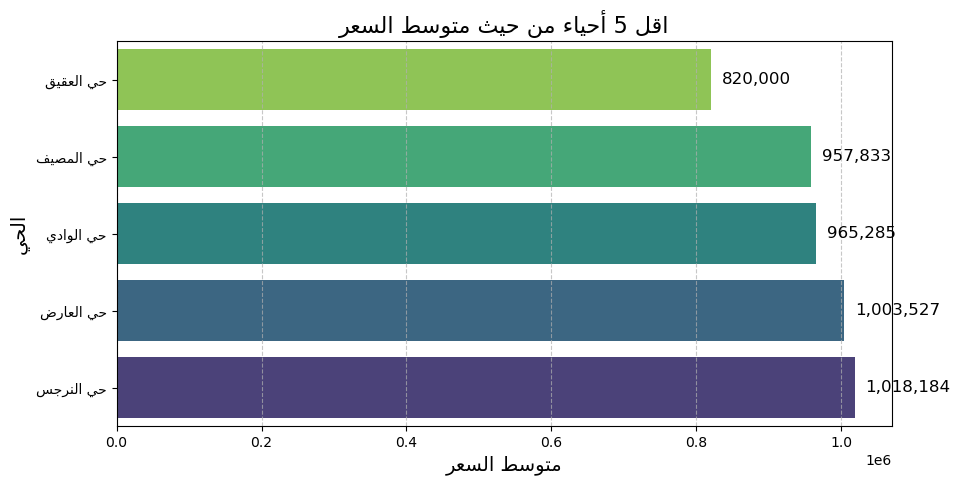

In [280]:
# Reshape Arabic labels correctly
top_5_mean_df["reshaped_neighbourhood"] = top_5_mean_df["الحي"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Create a visually appealing bar chart with correctly displayed Arabic text
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_mean_df['السعر الاجمالي'], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis_r")

# Add annotations to show exact values on the bars
for index, value in enumerate(top_5_mean_df['السعر الاجمالي']):
    plt.text(value + 15000, index, f"{value:,}", va='center', fontsize=12)

# Set labels and title with properly formatted Arabic text
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط السعر")), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape("اقل 5 أحياء من حيث متوسط السعر")), fontsize=16)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

#### Riyadh Land

In [281]:
# Count occurrences of each neighbourhood
neighbourhood_counts = df_Aqqar_Land['الحي'].value_counts()

# Filter neighbourhoods that appear more than 3 times
frequent_neighbourhoods = neighbourhood_counts[neighbourhood_counts > 3].index.tolist()

# Calculate mean price for each neighbourhood
mean_Land_df = df_Aqqar_Land.groupby('الحي', as_index=False)["السعر الإجمالي"].mean()


# Filter the mean dataframe to only include these neighbourhoods
filtered_mean_Land_df = mean_Land_df[mean_Land_df['الحي'].isin(frequent_neighbourhoods)]

top_5_mean_df = filtered_mean_Land_df.sort_values(by="السعر الإجمالي", ascending=False).head(5)

top_5_mean_df["متوسط السعر الاجمالي"] = top_5_mean_df["السعر الإجمالي"].apply(lambda x: f"{x:,.0f}")

top_5_mean_df["السعر الإجمالي"]= top_5_mean_df["السعر الإجمالي"].astype(int)


top_5_mean_df[["الحي","متوسط السعر الاجمالي"]]



,الحي,متوسط السعر الاجمالي
101,حي الياسمين,"16,748,092"
107,حي ثليم,"13,508,400"
98,حي الهدا,"12,196,240"
78,حي الملقا,"11,827,806"
45,حي الضباط,"10,747,250"


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/521701899.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_mean_df["السعر الإجمالي"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis")


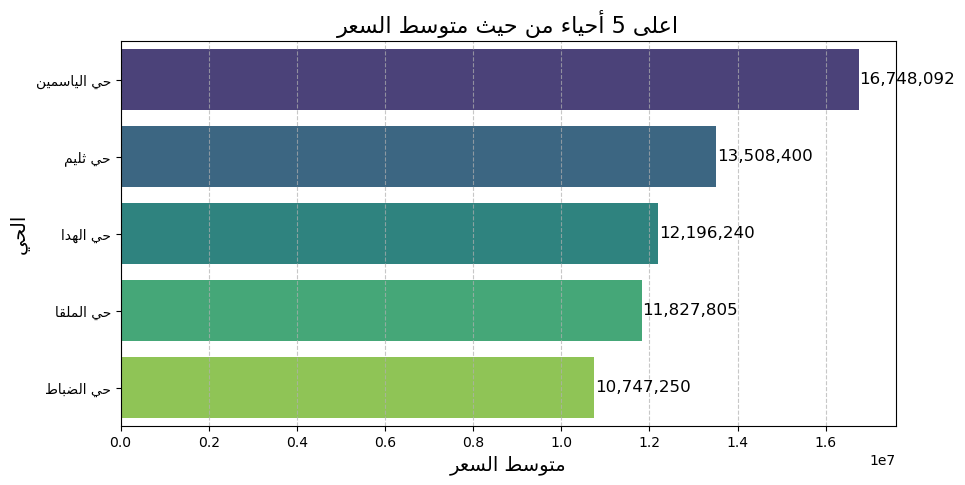

In [282]:
# Reshape Arabic labels correctly
top_5_mean_df["reshaped_neighbourhood"] = top_5_mean_df["الحي"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Create a visually appealing bar chart with correctly displayed Arabic text
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_mean_df["السعر الإجمالي"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis")

# Add annotations to show exact values on the bars
for index, value in enumerate(top_5_mean_df["السعر الإجمالي"]):
    plt.text(value + 15000, index, f"{value:,}", va='center', fontsize=12)

# Set labels and title with properly formatted Arabic text
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط السعر")), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape("اعلى 5 أحياء من حيث متوسط السعر")), fontsize=16)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

In [283]:
# Count occurrences of each neighbourhood
neighbourhood_counts = df_Aqqar_Land['الحي'].value_counts()

# Filter neighbourhoods that appear more than 3 times
frequent_neighbourhoods = neighbourhood_counts[neighbourhood_counts > 3].index.tolist()

# Calculate mean price for each neighbourhood
mean_Land_df = df_Aqqar_Land.groupby('الحي', as_index=False)["السعر الإجمالي"].mean()


# Filter the mean dataframe to only include these neighbourhoods
filtered_mean_Land_df = mean_Land_df[mean_Land_df['الحي'].isin(frequent_neighbourhoods)]

top_5_mean_df = filtered_mean_Land_df.sort_values(by="السعر الإجمالي", ascending=True).head(5)

top_5_mean_df["متوسط السعر الاجمالي"] = top_5_mean_df["السعر الإجمالي"].apply(lambda x: f"{x:,.0f}")

top_5_mean_df["السعر الإجمالي"]= top_5_mean_df["السعر الإجمالي"].astype(int)


top_5_mean_df[["الحي","متوسط السعر الاجمالي"]]



,الحي,متوسط السعر الاجمالي
39,حي الشعلة,"623,618"
60,حي الفيحاء,"719,685"
70,حي المشرق,"965,874"
30,حي الزاهر,"973,469"
72,حي المصفاة,"1,024,750"


/var/folders/8x/lx_l3ybs0yx0nx_wtwwkvy6c0000gn/T/ipykernel_61325/2033628456.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_mean_df["السعر الإجمالي"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis")


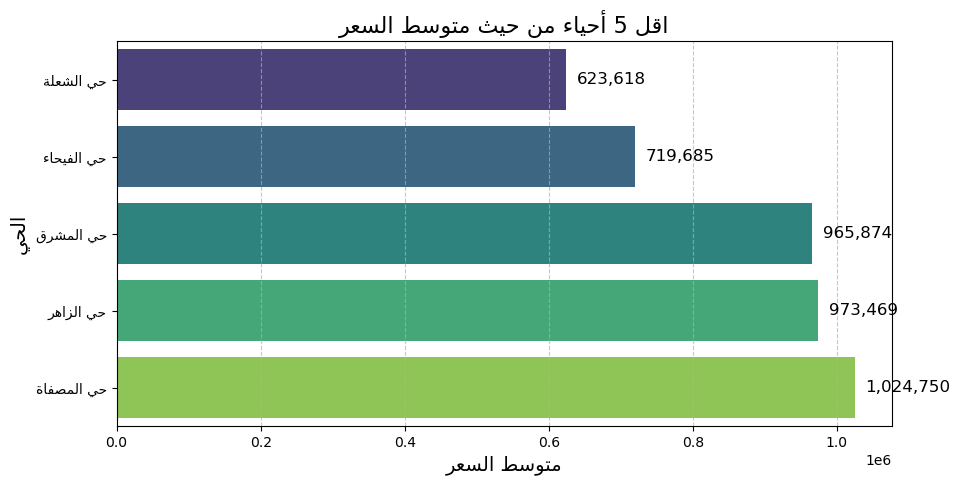

In [284]:
# Reshape Arabic labels correctly
top_5_mean_df["reshaped_neighbourhood"] = top_5_mean_df["الحي"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Create a visually appealing bar chart with correctly displayed Arabic text
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_mean_df["السعر الإجمالي"], y=top_5_mean_df["reshaped_neighbourhood"], palette="viridis")

# Add annotations to show exact values on the bars
for index, value in enumerate(top_5_mean_df["السعر الإجمالي"]):
    plt.text(value + 15000, index, f"{value:,}", va='center', fontsize=12)

# Set labels and title with properly formatted Arabic text
plt.xlabel(get_display(arabic_reshaper.reshape("متوسط السعر")), fontsize=14)
plt.ylabel(get_display(arabic_reshaper.reshape("الحي")), fontsize=14)
plt.title(get_display(arabic_reshaper.reshape("اقل 5 أحياء من حيث متوسط السعر")), fontsize=16)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

In [285]:
mean_square_price_by_location = df_Aqqar_Land.groupby('الحي', as_index=False)['سعر المتر'].mean()

mean_square_price_by_location.sort_values('سعر المتر', ascending=False)

,الحي,سعر المتر
107,حي ثليم,12090.000000
101,حي الياسمين,11685.400000
89,حي النخيل,10444.333333
64,حي المحمدية,8350.000000
31,حي الزهراء,7500.000000
...,...,...
3,القرينة,920.000000
30,حي الزاهر,910.666667
60,حي الفيحاء,888.500000
39,حي الشعلة,803.400000
